In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import re

## Analyze sales data to identify opportunities for growth and optimization. 

In [3]:
path='./data/coconut_restaurant.csv'

In [4]:
dtype_spec = {
    19: 'str',   
    20: 'str',   
    21: 'str',   
    22: 'str'
}

In [5]:
resta_df_original = pd.read_csv(path,on_bad_lines='skip', sep=',', dtype=dtype_spec, low_memory=False)

In [6]:
#Make a copy from the original dataset
resta_df = resta_df_original.copy()

## Exploratory Data Analysis

In [7]:
resta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505575 entries, 0 to 505574
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id_pedido             505575 non-null  int64  
 1   fecha_sistema         505575 non-null  object 
 2   hora                  505575 non-null  object 
 3   clasificador_grupo    505575 non-null  object 
 4   clasificacion         474780 non-null  object 
 5   producto              505575 non-null  object 
 6   state                 505575 non-null  object 
 7   precio                505575 non-null  float64
 8   cantidad              505575 non-null  int64  
 9   a_pagar_xprod         505575 non-null  float64
 10  pago_pedido_tot       505575 non-null  float64
 11  product_observations  103879 non-null  object 
 12  tipo_forma_pago       505575 non-null  object 
 13  monto                 505575 non-null  float64
 14  observaciones_pedido  0 non-null       float64
 15  

In [8]:
resta_df.shape

(505575, 27)

In [9]:
resta_df.size

13650525

In [13]:
resta_df.head()

,id_pedido,fecha_sistema,hora,clasificador_grupo,clasificacion,producto,state,precio,cantidad,a_pagar_xprod,...,ubicacion,numero_pedido,fecha_modificacion,motivo_modificacion,es_anulado,es_cortesia,estado,saldo_inicial,saldo_final,stateprod
0,3208,2016-07-05,21:46:33.0000000,MENU,Sandwiches,Niki's club,ACTIVO,18.0,1,18.0,...,0 - Para llevar,2,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
1,3209,2016-07-05,22:00:30.0000000,MENU,Sandwiches,Sand de Pollo BBQ,ACTIVO,20.0,1,20.0,...,1 - Mesa 1,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
2,3210,2016-07-05,23:04:04.0000000,MENU,Fingers,Fingers miel,ACTIVO,22.0,1,22.0,...,0 - Para llevar,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
3,3210,2016-07-05,23:04:04.0000000,BEBIDAS,jugos - aguas,Aquarius 500,ACTIVO,8.0,1,8.0,...,0 - Para llevar,3,NaN,NaN,NaN,NaN,CERRADO,500.0,620.0,ACTIVO
4,3211,2016-07-07,23:03:19.0000000,MENU,Alitas 8 UNIDADES,Alitas Barbacoa,ACTIVO,27.0,1,27.0,...,20 - Mesa 20,1,NaN,NaN,NaN,NaN,CERRADO,500.0,0.0,ACTIVO


In [14]:
resta_df.columns

Index(['id_pedido', 'fecha_sistema', 'hora', 'clasificador_grupo',
       'clasificacion', 'producto', 'state', 'precio', 'cantidad',
       'a_pagar_xprod', 'pago_pedido_tot', 'product_observations',
       'tipo_forma_pago', 'monto', 'observaciones_pedido', 'pagado_cliente',
       'cambio', 'ubicacion', 'numero_pedido', 'fecha_modificacion',
       'motivo_modificacion', 'es_anulado', 'es_cortesia', 'estado',
       'saldo_inicial', 'saldo_final', 'stateprod'],
      dtype='object')

In [10]:
#Change column names
resta_df.columns=['order_id', 'system_date', 'time', 'group_classifier',
        'classification', 'product', 'prod_state', 'price', 'quantity',
        'to_pay_xprod', 'tot_order_payment', 'product_observations',
        'type_payment_form', 'amount', 'order_observations', 'customer_pay',
        'change', 'location', 'order_number', 'modification_date',
        'modification_reason', 'is_cancelled', 'is_courtesy', 'status',
        'start_balance', 'end_balance', 'stateprod']

### Reviewing data types

In [16]:
resta_df.dtypes

order_id                  int64
system_date              object
time                     object
group_classifier         object
classification           object
product                  object
prod_state               object
price                   float64
quantity                  int64
to_pay_xprod            float64
tot_order_payment       float64
product_observations     object
type_payment_form        object
amount                  float64
order_observations      float64
customer_pay            float64
change                  float64
location                 object
order_number              int64
modification_date        object
modification_reason      object
is_cancelled             object
is_courtesy              object
status                   object
start_balance           float64
end_balance             float64
stateprod                object
dtype: object

In [11]:
# Convert data type to date time
resta_df['system_date'] = pd.to_datetime(resta_df['system_date'], format='%Y-%m-%d')

In [12]:
resta_df['time'] = pd.to_datetime(resta_df['time'], format='%H:%M:%S.%f')

#### Converto strings to lower case

In [13]:
# Place all string items in lower letters 

cols_to_lower=['classification', 'product', 'group_classifier','product_observations','location','prod_state','status','stateprod']

for col in cols_to_lower:
    if col in resta_df.columns:
        resta_df[col] = resta_df[col].str.lower()

In [14]:
#Delete any space before or after any value in the dataset
resta_df = resta_df.applymap(lambda x:x.strip() if isinstance(x,str) else x)

### Understanding columns type

In [15]:
# categorical columns 
categoric_col = [col for col in resta_df.columns if resta_df[col].dtype == 'object']
print(f'Categorical columns are: {categoric_col}')

Categorical columns are: ['group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod']


In [16]:
# numeric columns
numeric_col =[col for col in resta_df.columns if resta_df[col].dtype !='object']
print(f'Numeric columns are: {numeric_col}')

Numeric columns are: ['order_id', 'system_date', 'time', 'price', 'quantity', 'to_pay_xprod', 'tot_order_payment', 'amount', 'order_observations', 'customer_pay', 'change', 'order_number', 'start_balance', 'end_balance']


In [17]:
# numerical but categorical variables
num_but_categorical = [col for col in numeric_col if resta_df[col].nunique() <10]
print(f'Numeric but categorical columns are: {num_but_categorical}')

Numeric but categorical columns are: ['order_observations']


In [18]:
# Adding num_but_cat to cat_cols
categoric_col = num_but_categorical + categoric_col
print(f'Categorical columns are: {categoric_col}')

Categorical columns are: ['order_observations', 'group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod']


In [19]:
numeric_datetime = ['system_date', 'time', 'modification_date']

numeric_col = [col for col in numeric_col if col not in numeric_datetime and col not in num_but_categorical]

# id_cols removing from num_cols
id_cols = ['order_id', 'order_payment_id', 'order_number']
numeric_col = [col for col in numeric_col if col not in id_cols]

print(f"Numerical Cols: {numeric_col} \nCategorical Cols: {categoric_col} \nNumerical but Categorical: {num_but_categorical}")

Numerical Cols: ['price', 'quantity', 'to_pay_xprod', 'tot_order_payment', 'amount', 'customer_pay', 'change', 'start_balance', 'end_balance'] 
Categorical Cols: ['order_observations', 'group_classifier', 'classification', 'product', 'prod_state', 'product_observations', 'type_payment_form', 'location', 'modification_date', 'modification_reason', 'is_cancelled', 'is_courtesy', 'status', 'stateprod'] 
Numerical but Categorical: ['order_observations']


## EDA

### Missing values

In [20]:
#Determining how many values are null in percentage.
((resta_df.isna().sum()/resta_df.shape[0])*100).sort_values(ascending=False)

order_observations      100.000000
is_cancelled             99.990704
modification_reason      99.990704
modification_date        99.990704
product_observations     79.453296
classification            6.091084
is_courtesy               0.375019
end_balance               0.223903
order_id                  0.000000
customer_pay              0.000000
start_balance             0.000000
status                    0.000000
order_number              0.000000
location                  0.000000
change                    0.000000
amount                    0.000000
system_date               0.000000
type_payment_form         0.000000
tot_order_payment         0.000000
to_pay_xprod              0.000000
quantity                  0.000000
price                     0.000000
prod_state                0.000000
product                   0.000000
group_classifier          0.000000
time                      0.000000
stateprod                 0.000000
dtype: float64

Since 'order_observations' has 100% of NaN values, is better to erase the entire column.


In [21]:
resta_df.drop(columns='order_observations', axis=1, inplace=True)

In [22]:
categoric_col.remove('order_observations')
categoric_col

['group_classifier',
 'classification',
 'product',
 'prod_state',
 'product_observations',
 'type_payment_form',
 'location',
 'modification_date',
 'modification_reason',
 'is_cancelled',
 'is_courtesy',
 'status',
 'stateprod']

#### NULL VALUES IN 'is_canceled column' 
'is cancelled' is equivalent to say that an order has been annuled  

In [23]:
resta_df['is_cancelled'].value_counts()

is_cancelled
True    47
Name: count, dtype: int64

In [24]:
#Get how many values are NAN in is cancelled column
resta_df['is_cancelled'].isna().sum()

505528

In [25]:
#In which cases there was reported as 'cancelled'
resta_df.loc[resta_df['is_cancelled']=='True', ['product','classification']].sample(5)


,product,classification
212707,hamburguesa bbq,burguers
82779,alitas miel mostaza,alitas 8 unidades
94536,alitas miel mostaza,alitas 8 unidades
226719,alitas picantes,alitas 8 unidades
95067,fingers barbacoa,fingers


In [26]:
# If there was a customer who paid and there was a change given, so there has been a purchase completed. 
# Accordingly, couldn't be cancelled
resta_df.loc[(resta_df['is_cancelled']=='True'),['product','to_pay_xprod','tot_order_payment','customer_pay','change','is_cancelled']].sample(5)

,product,to_pay_xprod,tot_order_payment,customer_pay,change,is_cancelled
87919,alitas barbacoa,54.0,54.0,54.0,0.0,True
95067,fingers barbacoa,22.0,55.0,55.0,0.0,True
1210,alitas barbacoa,54.0,54.0,54.0,0.0,True
226719,alitas picantes,56.0,196.0,196.0,0.0,True
88875,alitas barbacoa,27.0,29.5,29.5,0.0,True


##### Eventhough products which have status in 'is_cancelled' in True, were charged anyway. Which seems as an interesting input to analyze the owner. 
Paid customer, change and is_cancelled are not columns which reflect any important insight, since those seem to be erroneus values placed.

##### Analyze missing assingments 
All products which haven't been cancelled should have 'is_cancelled' status to False, and just 4 of them have it. So next step is fixing this issue.  

In [27]:
#NaN values in is_cancelled should be placed in False, since those orders were not cancelled 
resta_df[['product','is_cancelled','tot_order_payment','customer_pay','change']][resta_df['is_cancelled'].isna()].sample(5)

,product,is_cancelled,tot_order_payment,customer_pay,change
11592,alitas miel - picante,NaN,60.0,60.0,0.0
92819,alitas miel - picante,NaN,29.5,29.5,0.0
434438,coca cola personal,NaN,26.5,26.5,0.0
500034,coca cola personal,NaN,40.0,40.0,0.0
268616,alitas miel 4 unid,NaN,44.0,44.0,0.0


In [28]:
#To all NaN values in 'is_cancelled' place False.
resta_df.fillna({'is_cancelled':'False'}, inplace=True)

In [29]:
resta_df['is_cancelled'].isna().sum()

0

#### NaN values in 'classification' column

In [30]:
resta_df['classification'].isna().sum()

30795

In [37]:
resta_df[['classification','product']][resta_df['classification'].isna()].sample(5)

,classification,product
36231,NaN,salsa barbacoa
483684,NaN,salsa picosa
428345,NaN,del valle 1 ltr
327049,NaN,salsa picante
229080,NaN,salsa teriyaki


According to the data source whenever there are null values in parent_product, means that parent product value is equal to product. 

In [31]:
#Fill null values with values which are in column product 
#resta_df['classification'].fillna(resta_df['product'], inplace=True)

resta_df.fillna({'classification': 'product'}, inplace=True)

In [32]:
resta_df['classification'].isna().sum()

0

#### NaN values in modification_reason column.
modification_reason, modification_dates, modification_time are related to is_cancelled column, meaning that whenever there is a cancellation there will be data in these columns, otherwise only False in is_cancelled column. NaN values qdont require to be erased yet, but NAN values in 'modification_reason'  could be replaced by 'Ninguna'.

In [33]:
resta_df['modification_reason'].isna().sum()

505528

In [34]:
resta_df[['modification_date','modification_reason','is_cancelled']][resta_df['modification_date'].isna()].sample(5)

,modification_date,modification_reason,is_cancelled
233262,NaN,NaN,False
260269,NaN,NaN,False
410623,NaN,NaN,False
453533,NaN,NaN,False
65770,NaN,NaN,False


In [35]:
resta_df[~resta_df['modification_reason'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
88875,161586,2018-03-09,1900-01-01 12:57:16,menu,alitas 8 unidades,alitas barbacoa,activo,27.0,1,27.0,...,2 - mesa 2,16,2018-03-09 13:57:14.343000000,sin entrega,True,False,cerrado,0.0,0.0,activo
205850,348514,2019-05-18,1900-01-01 15:45:39,bebidas,1 lt,coca cola 1lt,activo,12.0,1,12.0,...,1 - mesa 1,60,2019-05-18 15:48:24.257000000,NO HY,True,False,cerrado,0.0,0.0,activo
226720,375176,2019-07-27,1900-01-01 14:19:18,menu,alitas 8 unidades,alitas barbacoa,activo,28.0,1,28.0,...,0 - para llevar,26,2019-07-27 14:22:47.810000000,exceso de pedido,True,False,cerrado,0.0,0.0,activo
46384,84231,2017-07-19,1900-01-01 20:50:19,otros,product,salsa picante,activo,3.0,1,3.0,...,. - sin mesa,69,2017-07-19 21:19:23.297000000,NO SALIO,True,False,cerrado,0.0,0.0,activo
212706,359968,2019-06-08,1900-01-01 13:33:36,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,17 - mesa 17,25,2019-06-08 13:57:29.483000000,PSO DE TIEMPO,True,False,cerrado,0.0,0.0,activo


In [36]:
resta_df.loc[resta_df['modification_reason'].isna(),'modification_reason']='Ninguna'

In [37]:
resta_df['modification_reason'].isna().sum()

0

#### NaN values in 'product_observation' column
Whenever there were sales done as completed that meant Lunch, so users have used this space to detail the kind of lunch for that sale. When there is NaN in this column is not objetable

In [45]:
resta_df['product_observations'].isna().sum()

401696

In [46]:
resta_df['product_observations'].unique()

array([nan, 'una sin tomate ni tocino', 'solo una salsa aparte', ...,
       'queso y ajo salsa parte', 'de  la sierra',
       '6 albaca el resto surtido'], dtype=object)

In [47]:
resta_df[~resta_df['product_observations'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
172664,304129,2019-01-23,1900-01-01 20:06:14,menu,alitas 16 unidades,alitas buff 16 unid,activo,50.0,1,50.0,...,0 - para llevar,35,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
442235,552678,2022-03-15,1900-01-01 17:30:44,bebidas,frutal valle,1 llitro frutal,activo,15.0,1,15.0,...,. - sin mesa,2,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
391687,522236,2021-08-21,1900-01-01 21:22:58,menu,alitas 8 unidades,alitas picantes,activo,32.0,1,32.0,...,0 - para llevar,136,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
342174,493194,2021-01-21,1900-01-01 19:58:40,menu,alitas 16 unidades,alitas bbq 16 unid,activo,55.0,1,55.0,...,0 - para llevar,92,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
475496,569941,2022-07-29,1900-01-01 13:24:38,menu,fingers 6 unid,fingers 6 u barbocoa,activo,33.0,1,33.0,...,0 - para llevar,30,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


In [38]:
#Fullfill 'product_observations' with 'Ninguna' whenever there are NaN values
resta_df.loc[resta_df['product_observations'].isna(), 'product_observations']='Ninguna'

In [49]:
resta_df['product_observations'].isna().sum()

0

### NaN values in is_courtesy column
Orders which have been labeled NaN in is_courtesy should be changed to False, since those havent been a courtesy.

In [50]:
resta_df['is_courtesy'].isna().sum()

1896

In [51]:
resta_df['is_courtesy'].unique()

array([nan, 'False', 'True'], dtype=object)

In [52]:
resta_df[resta_df['is_courtesy'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
105,5427,2016-07-15,1900-01-01 19:29:42,bebidas,popular,coca cola popular,activo,6.0,1,6.0,...,2 - mesa 2,23,NaN,Ninguna,False,NaN,cerrado,5000.0,0.0,activo
506,5504,2016-07-28,1900-01-01 13:20:38,bebidas,1 lt,coca cola 1lt,activo,12.0,1,12.0,...,16 - mesa 16,11,NaN,Ninguna,False,NaN,cerrado,500.0,985.0,activo
1576,6956,2016-08-08,1900-01-01 20:35:54,menu,fingers,fingers barbacoa,activo,22.0,1,22.0,...,8 - mesa 8,20,NaN,Ninguna,False,NaN,cerrado,0.0,0.0,activo
1427,6885,2016-08-05,1900-01-01 19:16:13,menu,fingers,fingers miel,activo,22.0,1,22.0,...,. - sin mesa,33,NaN,Ninguna,False,NaN,cerrado,0.0,0.0,activo
537,5513,2016-07-28,1900-01-01 18:34:37,menu,fingers,fingers miel,activo,22.0,1,22.0,...,9 - mesa 9,5,NaN,Ninguna,False,NaN,cerrado,0.0,0.0,activo


In [39]:
#Whenever 'is_courtesy' equals to NaN the corret value should be False
resta_df.loc[resta_df['is_courtesy'].isna(),'is_courtesy'] = False

In [54]:
resta_df['is_courtesy'].isna().sum()

0

#### NaN values in end_balance column

In [55]:
resta_df['end_balance'].isna().sum()

1132

In [56]:
resta_df[resta_df['end_balance'].isna()].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
55010,94033,2017-09-04,1900-01-01 19:28:30,bebidas,popular,fanta popular,activo,6.0,1,6.0,...,. - sin mesa,17,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
505363,585777,2022-12-15,1900-01-01 19:01:05,menu,alitas 8 unidades,alitas miel mostaza,activo,34.0,1,34.0,...,. - sin mesa,17,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
362793,505146,2021-04-22,1900-01-01 19:20:00,menu,alitas 6 unidades 26 bs,alitas barbacoa 6 unid,activo,24.0,1,24.0,...,7 - mesa 7,43,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
401391,529885,2021-09-28,1900-01-01 18:51:46,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,57.0,1,57.0,...,11 - mesa 11,24,NaN,Ninguna,False,False,abierto,0.0,NaN,activo
292625,461923,2020-03-21,1900-01-01 12:45:37,menu,platos,chili mexic,activo,22.0,1,22.0,...,3 - mesa 3,12,NaN,Ninguna,False,False,abierto,0.0,NaN,activo


In [40]:
#'end_balance' shpuld not be null,NaN values shopuld be replaced by 0
resta_df.loc[resta_df['end_balance'].isna(),'end_balance'] = 0

In [58]:
resta_df['end_balance'].isna().sum()

0

## Analyze Outliers

### Numerical variables

#### Analysis of 'price' column

In [59]:
resta_df['price'].describe()

count    505575.000000
mean         20.317964
std          13.313448
min           1.000000
25%          12.000000
50%          22.000000
75%          27.000000
max         130.000000
Name: price, dtype: float64

In [41]:
# Calculate 25th percentile of annual strikes
percentile25 = resta_df['price'].quantile(0.25)
# Calculate 75th percentile of annual strikes
percentile75 = resta_df['price'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower thresholds for outliers
upper_limit = round(percentile75 + 1.5 * iqr,0)
lower_limit = round(percentile25 - 1.5 * iqr,0)
print('Lower limit is: ', lower_limit)
print('Upper limit',upper_limit)

Lower limit is:  -10.0
Upper limit 50.0


In [42]:
#show all values greater than the max limit
resta_df['price'][resta_df['price'] > upper_limit].value_counts().sort_values(ascending=False)

price
55.0     5664
57.0     3645
88.0      820
65.0      689
110.0     550
75.0      254
78.0      155
96.0      138
85.0      112
80.0       97
122.0      77
70.0       45
86.0       35
99.0       18
63.0       17
123.0      10
69.0        7
59.0        5
130.0       3
120.0       2
72.0        1
87.0        1
Name: count, dtype: int64

In [62]:
#which products have 55 or more as a price
resta_df[resta_df['price'] > upper_limit].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
349809,497807,2021-02-25,1900-01-01 20:15:57,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,55.0,1,55.0,...,0 - para llevar,97,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
295112,463160,2020-05-30,1900-01-01 11:11:12,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,55.0,1,55.0,...,0 - para llevar,2,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
352224,498973,2021-03-06,1900-01-01 19:25:11,menu,alitas 16 unidades,alitas albahaca 16 unid,activo,57.0,1,57.0,...,0 - para llevar,123,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
325021,482014,2020-11-14,1900-01-01 17:37:37,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,55.0,1,55.0,...,0 - para llevar,75,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
333165,485960,2020-12-17,1900-01-01 13:21:16,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,55.0,2,110.0,...,0 - para llevar,28,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
455465,559159,2022-05-07,1900-01-01 19:42:33,menu,alitas 16 unidades,alitas jack 16 unid,activo,57.0,1,57.0,...,0 - para llevar,92,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
496395,580426,2022-11-02,1900-01-01 14:02:50,menu,fingers 12 unid,fingers 12 u teriyaki,activo,57.0,1,57.0,...,0 - para llevar,16,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
319832,479480,2020-10-23,1900-01-01 19:57:24,menu,alitas 16 unidades,alitas buff 16 unid,activo,55.0,1,55.0,...,0 - para llevar,107,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
291192,461245,2020-03-13,1900-01-01 21:55:04,menu,alitas 16 unidades,alitas buff 16 unid,activo,55.0,1,55.0,...,11 - mesa 11,120,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
341998,493115,2021-01-21,1900-01-01 12:56:59,menu,alitas 16 unidades,alitas miel mostaza 16 unid,activo,55.0,1,55.0,...,. - sin mesa,13,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


In [63]:
resta_df[['classification','price']][resta_df['price'] > 88].value_counts()

classification      price
alitas 32 unidades  110.0    513
alitas 24 unidades  96.0     138
alitas 32 unidades  122.0     77
product             110.0     37
combos              99.0      18
sin uso             123.0     10
promocion           130.0      3
combos              120.0      2
Name: count, dtype: int64

In [64]:
resta_df[['classification','price']][resta_df['price'] ==resta_df['price'].min()].value_counts()

classification  price
delivery        1.0      16547
sin uso         1.0       2975
product         1.0        431
Name: count, dtype: int64

In [65]:
resta_df[['classification','price']][resta_df['price']==resta_df['price'].max()].value_counts()

classification  price
promocion       130.0    3
Name: count, dtype: int64

#### Analysis of 'quantity' column

In [43]:
# Calculate 25th percentile of annual strikes
percentile25 = resta_df['quantity'].quantile(0.25)
# Calculate 75th percentile of annual strikes
percentile75 = resta_df['quantity'].quantile(0.75)
# Calculate interquartile range
iqr = percentile75 - percentile25
# Calculate upper and lower thresholds for outliers
upper_limit = round(percentile75 + 1.5 * iqr,0)
lower_limit = round(percentile25 - 1.5 * iqr,0)
print('Lower limit is: ', lower_limit)
print('Upper limit',upper_limit)

Lower limit is:  1.0
Upper limit 1.0


In [67]:
resta_df['quantity'].value_counts().sort_values(ascending=False)

quantity
1      412687
2       59788
3        9685
4        4319
5        3063
        ...  
54          1
59          1
62          1
135         1
96          1
Name: count, Length: 79, dtype: int64

In [68]:
resta_df[resta_df['quantity'] > upper_limit].sort_values(by='quantity').sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
347453,496708,2021-02-13,1900-01-01 19:23:19,menu,alitas 8 unidades,alitas miel mostaza,activo,30.0,3,90.0,...,0 - para llevar,96,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
383354,518267,2021-07-19,1900-01-01 14:05:06,menu,delivery,pedidos ya,activo,1.0,9,9.0,...,0 - para llevar,21,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
318397,478811,2020-10-17,1900-01-01 12:19:14,otros,product,salsa picante,activo,3.0,2,6.0,...,0 - para llevar,9,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
499505,581933,2022-11-16,1900-01-01 14:11:25,menu,product,pollo a la canasta,activo,23.0,2,46.0,...,. - sin mesa,19,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
325421,482208,2020-11-16,1900-01-01 12:42:19,menu,salchis,salchibeef,activo,22.0,3,66.0,...,0 - para llevar,14,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


In [69]:
resta_df[resta_df['quantity'] > 60].sort_values(by='quantity').sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
445106,554138,2022-03-28,1900-01-01 14:39:49,otros,product,aceite,activo,1.0,84,84.0,...,0 - para llevar,33,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
493595,578997,2022-10-20,1900-01-01 11:55:51,otros,product,aceite,activo,1.0,100,100.0,...,. - sin mesa,1,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
489153,576695,2022-09-29,1900-01-01 12:35:19,otros,product,aceite,activo,1.0,100,100.0,...,0 - para llevar,12,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
292058,461647,2020-03-17,1900-01-01 12:04:27,menu,alitas 4 unidades 19 bs,alitas miel 4 unid,activo,16.0,66,1056.0,...,0 - para llevar,2,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo
480071,572197,2022-08-18,1900-01-01 11:57:42,otros,product,aceite,activo,1.0,65,65.0,...,0 - para llevar,1,NaN,Ninguna,False,False,cerrado,0.0,0.0,activo


### Categorical variables

#### Analysis of 'prod_state' column

In [70]:
resta_df[resta_df['price']==1].groupby(['classification','product','prod_state'])['to_pay_xprod'].count()

classification  product             prod_state
delivery        dinki               activo          435
                ego                 activo           53
                fast driver         activo           41
                link                activo          154
                mr. delivery        activo          784
                patio service       activo          253
                pedidos ya          activo        12819
                xpress              activo           78
                yaigo               activo         1930
product         aceite              activo           37
                envases             activo          375
                pollo a la canasta  activo           19
sin uso         finger              inactivo        164
                link                activo           50
                mr. delivery        activo          571
                patio service       activo          270
                pedidos ya          activo         1920
N

In [71]:
resta_df[resta_df['prod_state']=='inactivo'].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,status,start_balance,end_balance,stateprod
59712,100274,2017-09-26,1900-01-01 19:55:26,menu,alitas 8 unidades,sin salsa,inactivo,15.0,1,15.0,...,6 - mesa 6,66,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
114375,203648,2018-06-19,1900-01-01 21:29:09,menu,alitas 8 unidades,sin salsa,inactivo,15.0,1,15.0,...,. - sin mesa,53,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
309160,473009,2020-08-30,1900-01-01 18:52:26,menu,sin uso,pollo a la canasta,inactivo,22.0,1,22.0,...,0 - para llevar,63,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
142214,261171,2018-10-05,1900-01-01 20:48:51,menu,alitas 8 unidades,alita 16 unidades,inactivo,50.0,1,50.0,...,0 - para llevar,56,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo
62131,108235,2017-10-07,1900-01-01 20:06:33,menu,alitas 8 unidades,alitas porcion y 1/2,inactivo,40.0,1,40.0,...,4 - mesa 4,85,NaN,Ninguna,False,False,cerrado,0.0,0.0,inactivo


## Feature Engineering - Data preparation

### Checking for duplicates

In [72]:
resta_df.duplicated().sum()

0

### Structure modification

### Unnecessary columns.
--- drop type_payment_form since has a unique value 'EFE'.
--- determine whether to delete status 
--- determine whether to delete stateprod which seems to be equal to prod_state

--- determine whether to delete start_balance and end_balance 

In [73]:
#type_payment_form column analysis
resta_df['type_payment_form'].value_counts()

type_payment_form
EFE    505575
Name: count, dtype: int64

In [44]:
resta_df = resta_df.drop('type_payment_form', axis=1)

'status' column appears to not determine anything in specific, since cerrado has 503968 values and abierto 1132. These seems to be wrong load.

In [45]:
resta_df['status'].value_counts()

status
cerrado    504443
abierto      1132
Name: count, dtype: int64

In [46]:
resta_df = resta_df.drop('status', axis=1)

'prod_state','stateprod' have equal values so one of those will be deleted.

In [77]:
resta_df[['prod_state','stateprod']].sample(20)

,prod_state,stateprod
321411,activo,activo
296715,activo,activo
207074,activo,activo
472448,activo,activo
298618,activo,activo
62360,activo,activo
403095,activo,activo
183116,activo,activo
435219,activo,activo
111266,activo,activo


In [47]:
resta_df = resta_df.drop('stateprod', axis=1)

'start_balance','end_balance' there is no coherence on the first value refarding the other, when start balance has a value, in several cases end_balance has 0. These inconsistencies are not useful for the project.

In [79]:
resta_df[['start_balance','end_balance']].head(20)

,start_balance,end_balance
0,500.0,620.0
1,500.0,620.0
2,500.0,620.0
3,500.0,620.0
4,500.0,0.0
5,500.0,0.0
6,500.0,0.0
7,500.0,0.0
8,500.0,0.0
9,500.0,0.0


In [48]:
resta_df = resta_df.drop(columns=['start_balance','end_balance'], axis=1)

Correcting Categorical selected list, deleting dropped columns

In [49]:
dropped_cols = ['start_balance','end_balance','stateprod','status','type_payment_form']

In [50]:
categorical_selected = [col for col in categoric_col if col not in dropped_cols]
categorical_selected

['group_classifier',
 'classification',
 'product',
 'prod_state',
 'product_observations',
 'location',
 'modification_date',
 'modification_reason',
 'is_cancelled',
 'is_courtesy']

### Analysis and corrections in price column 
Orders with price equals to 1 seem to be related to deliveries, inventaryn products and others. These should be reviewed and cleaned to have consistency information regarding only sales.  

In [83]:
resta_df[resta_df['price']==1].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,product_observations,amount,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy
503090,584649,2022-12-04,1900-01-01 14:52:24,menu,delivery,pedidos ya,activo,1.0,12,12.0,...,Ninguna,57.0,57.0,0.0,0 - para llevar,24,NaN,Ninguna,False,False
296757,463966,2020-06-08,1900-01-01 13:57:40,menu,sin uso,pedidos ya,activo,1.0,22,22.0,...,Ninguna,108.0,108.0,0.0,0 - para llevar,33,NaN,Ninguna,False,False
431614,547513,2022-01-30,1900-01-01 12:05:13,menu,delivery,pedidos ya,activo,1.0,26,26.0,...,Ninguna,150.0,150.0,0.0,0 - para llevar,2,NaN,Ninguna,False,False
397416,524984,2021-09-13,1900-01-01 18:15:25,menu,delivery,yaigo,activo,1.0,7,7.0,...,Ninguna,63.0,63.0,0.0,0 - para llevar,58,NaN,Ninguna,False,False
492882,578620,2022-10-16,1900-01-01 15:26:44,menu,delivery,xpress,activo,1.0,4,4.0,...,Ninguna,28.0,28.0,0.0,0 - para llevar,47,NaN,Ninguna,False,False
427626,544535,2022-01-13,1900-01-01 20:50:43,menu,delivery,pedidos ya,activo,1.0,12,12.0,...,Ninguna,73.0,73.0,0.0,0 - para llevar,106,NaN,Ninguna,False,False
319256,479201,2020-10-21,1900-01-01 13:49:04,menu,delivery,yaigo,activo,1.0,16,16.0,...,Ninguna,126.0,126.0,0.0,0 - para llevar,31,NaN,Ninguna,False,False
456482,559657,2022-05-11,1900-01-01 18:45:57,menu,delivery,pedidos ya,activo,1.0,14,14.0,...,Ninguna,78.0,78.0,0.0,0 - para llevar,26,NaN,Ninguna,False,False
368666,509043,2021-05-16,1900-01-01 21:10:14,menu,delivery,yaigo,activo,1.0,11,11.0,...,Ninguna,99.0,99.0,0.0,0 - para llevar,107,NaN,Ninguna,False,False
459665,561177,2022-05-23,1900-01-01 20:26:52,menu,delivery,pedidos ya,activo,1.0,7,7.0,...,Ninguna,39.0,39.0,0.0,0 - para llevar,43,NaN,Ninguna,False,False


#### Transforming - DELIVERY column

column 'product', within product there have been identified these as deliveries: dinki,ego,fast driver,mr. delivery,patio service,pedidos ya,link.

In [51]:
#Creating a new column called 'delivery_name' to determine which delivery enterprise corresponds to.
resta_df['delivery_name'] = pd.Series()

In [52]:
deliveries = ['dinki','ego','fast driver','mr. delivery','patio service','pedidos ya','link', 'yaigo', 'xpress']

### Analysis of location column
location column was analyzed and filtered in order_type, to have these categories: para llevar, en sala-sin mesa, en sala-con mesa.

In [53]:
#To determine whether an order will be in situ or to take away, another column is created.
resta_df['order_type'] = pd.Series()

In [87]:
resta_df['location'].value_counts()

location
0 - para llevar    198901
. - sin mesa       143684
5 - mesa 5          26782
1 - mesa 1          16626
7 - mesa 7          16144
4 - mesa 4          13230
2 - mesa 2          12393
6 - mesa 6          10841
3 - mesa 3          10117
8 - mesa 8           9240
11 - mesa 11         8040
13 - mesa 13         6115
12 - mesa 12         6005
9 - mesa 9           5718
14 - mesa 14         4889
17 - mesa 17         4756
10 - mesa 10         3145
15 - mesa 15         2849
20 - mesa 20         2411
16 - mesa 16         2156
18 - mesa 18          916
19 - mesa 19          617
Name: count, dtype: int64

In [54]:
resta_df.loc[(resta_df['location'].str.contains('para llevar')) & (resta_df['classification']!='delivery'), 'order_type'].sample(5)

308373    NaN
28404     NaN
405405    NaN
440404    NaN
392433    NaN
Name: order_type, dtype: object

In [55]:
#to take away filters
resta_df.loc[(resta_df['location'].str.contains('para llevar')) & (resta_df['classification']!='delivery'), 'order_type'] = 'para llevar'

In [56]:
#'sin mesa' values 
resta_df.loc[(resta_df['location'].str.contains('sin mesa')) & (resta_df['classification']!='delivery'), 'order_type'] = 'en sala-sin mesa'

In [57]:
# location and those values which correspond to orders to eat at the restaurant
resta_df.loc[(resta_df['location'].str.contains('- mesa')) & (resta_df['classification']!='delivery'), 'order_type'] = 'en sala-con mesa'

In [92]:
resta_df['order_type'].unique()

array(['para llevar', 'en sala-con mesa', 'en sala-sin mesa', nan],
      dtype=object)

#### Analysis by 'classification'
Within classification column there is a 'delivery' option. Accordingly that order was a delivery.

In [93]:
resta_df['classification'].value_counts()

classification
alitas 8 unidades            102397
alitas 6 unidades  26 bs      59719
fingers                       44933
personal                      39167
product                       30795
alitas 4 unidades   19 bs     29276
burguers                      26579
salchis                       24636
popular                       23895
delivery                      16547
alitas 12 unidades            16310
sandwiches                    12925
1 lt                          12617
alitas 16 unidades            11683
jugos - aguas                 11645
platos                        10161
frutal valle                   8285
2 lt                           7934
sin uso                        3754
combos                         2484
jarras                         2230
almuerzos                      1814
fingers 6 unid                 1649
alitas 24 unidades              919
gusto                           780
fingers 12 unid                 649
alitas 32 unidades              590
fingers 8 uni

In [58]:
resta_df[['classification','product','location']][resta_df['classification'].str.contains('deliver')].head()

,classification,product,location
280762,delivery,mr. delivery,0 - para llevar
280780,delivery,mr. delivery,0 - para llevar
280793,delivery,mr. delivery,0 - para llevar
280866,delivery,mr. delivery,0 - para llevar
281579,delivery,mr. delivery,0 - para llevar


In [59]:
# identify deliveries by classification column
resta_df.loc[resta_df['classification']=='delivery', 'order_type'] = 'delivery'

In [96]:
#There are orders that were a delivery but werent classified as that. 
resta_df[resta_df['classification']=='delivery'].groupby(['order_type','product'])['product'].count()

order_type  product      
delivery    dinki              435
            ego                 53
            fast driver         41
            link               154
            mr. delivery       784
            patio service      253
            pedidos ya       12819
            xpress              78
            yaigo             1930
Name: product, dtype: int64

Text(0, 0.5, '# orders')

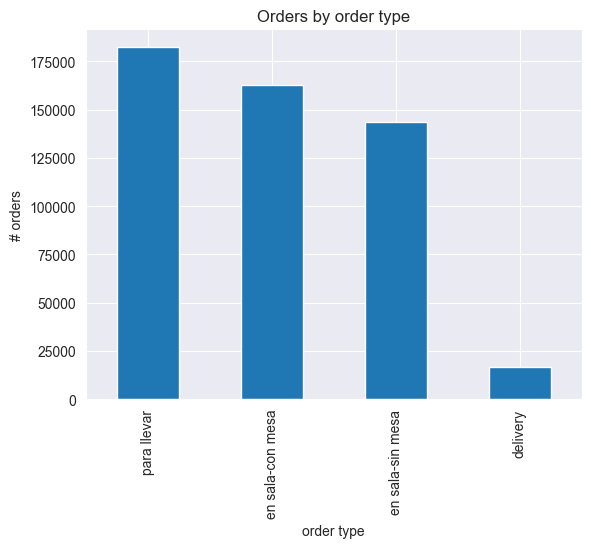

In [97]:
resta_df['order_type'].value_counts().plot(kind='bar')
plt.title('Orders by order type')
plt.xlabel('order type')
plt.ylabel('# orders')

#### Fill delivery_name column 

In [98]:
resta_df[['classification','product','location']][resta_df['order_type']=='delivery'].sample(10)

,classification,product,location
386920,delivery,pedidos ya,0 - para llevar
369342,delivery,pedidos ya,0 - para llevar
490452,delivery,pedidos ya,0 - para llevar
501596,delivery,pedidos ya,0 - para llevar
323251,delivery,yaigo,0 - para llevar
355951,delivery,pedidos ya,0 - para llevar
352221,delivery,pedidos ya,0 - para llevar
333378,delivery,yaigo,0 - para llevar
367116,delivery,pedidos ya,0 - para llevar
445049,delivery,pedidos ya,0 - para llevar


In [60]:
#Mask
mask = resta_df.loc[resta_df['order_type']=='delivery', 'product']

In [61]:
#Appling a filter 
filtered_products = [prod for prod in mask if prod in deliveries]

In [62]:
#**********
resta_df['delivery_name'] = resta_df['product'].apply(lambda x:x if x in filtered_products else None)

In [63]:
resta_df['delivery_name'].unique()

array([None, 'mr. delivery', 'pedidos ya', 'patio service', 'link',
       'fast driver', 'yaigo', 'dinki', 'ego', 'xpress'], dtype=object)

In [103]:
resta_df.groupby('delivery_name')['tot_order_payment'].sum().sort_values(ascending=False)

delivery_name
pedidos ya       945181.0
yaigo            133747.0
mr. delivery     121533.0
patio service     35653.0
dinki             29233.0
link              13154.0
xpress             3704.0
fast driver        3556.0
ego                2828.0
Name: tot_order_payment, dtype: float64

Text(0, 0.5, '$ Order payment')

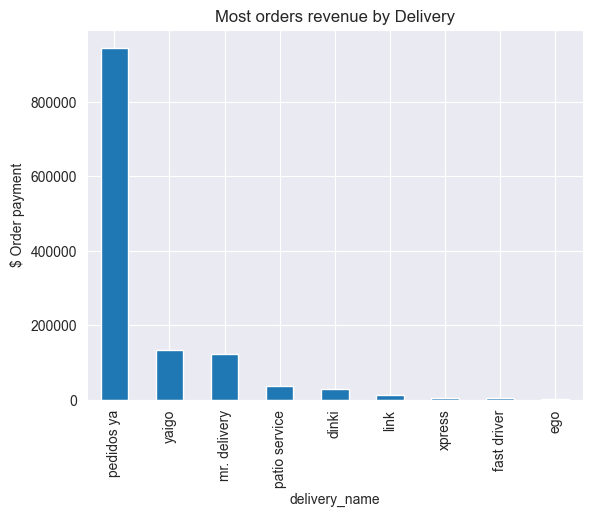

In [104]:
resta_df.groupby('delivery_name')['tot_order_payment'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Most orders revenue by Delivery')
plt.ylabel('$ Order payment')

#### Analyzing SIN USO value in classification column

'SIN USO' has orders that were delivered and in some cases it refers to a delivery, in others to products which are not longer in use. However for the purpose of this job it is important to account those values.
1. Understand which rows have SIN USO 
2. check the context 
3. sin uso has products: deliveries, others.
3.1. treat deliveries x
3.2. treat other products  PENDING

says SIN USO but in product state is ACTIVE so there seems to be mistaken fullfilment. 


##### Deliveries

In [105]:
resta_df[resta_df['classification'].str.contains('sin')].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
301071,466031,2020-07-04,1900-01-01 18:16:11,menu,sin uso,mr. delivery,activo,1.0,8,8.0,...,56.0,0.0,0 - para llevar,48,NaN,Ninguna,False,False,mr. delivery,para llevar
294082,462632,2020-05-20,1900-01-01 17:26:33,menu,sin uso,mr. delivery,activo,1.0,18,18.0,...,128.0,0.0,0 - para llevar,38,NaN,Ninguna,False,False,mr. delivery,para llevar
292878,462028,2020-05-05,1900-01-01 12:36:56,menu,sin uso,mr. delivery,activo,1.0,8,8.0,...,63.0,0.0,0 - para llevar,14,NaN,Ninguna,False,False,mr. delivery,para llevar
282396,455192,2020-02-13,1900-01-01 20:23:48,menu,sin uso,mr. delivery,activo,1.0,10,10.0,...,68.0,0.0,. - sin mesa,61,NaN,Ninguna,False,False,mr. delivery,en sala-sin mesa
259597,423431,2019-11-23,1900-01-01 13:57:43,menu,sin uso,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,. - sin mesa,14,NaN,Ninguna,False,False,mr. delivery,en sala-sin mesa
296074,463646,2020-06-04,1900-01-01 19:46:41,menu,sin uso,pedidos ya,activo,1.0,18,18.0,...,70.0,0.0,0 - para llevar,83,NaN,Ninguna,False,False,pedidos ya,para llevar
310138,473535,2020-09-06,1900-01-01 12:51:40,menu,sin uso,pedidos ya,activo,1.0,24,24.0,...,164.0,0.0,0 - para llevar,17,NaN,Ninguna,False,False,pedidos ya,para llevar
297755,464455,2020-06-13,1900-01-01 14:20:08,menu,sin uso,pedidos ya,activo,1.0,15,15.0,...,40.0,0.0,0 - para llevar,41,NaN,Ninguna,False,False,pedidos ya,para llevar
302827,466914,2020-07-15,1900-01-01 18:31:36,menu,sin uso,pedidos ya,activo,1.0,11,11.0,...,66.0,0.0,0 - para llevar,67,NaN,Ninguna,False,False,pedidos ya,para llevar
305105,469061,2020-07-31,1900-01-01 20:01:53,menu,sin uso,pedidos ya,activo,1.0,24,24.0,...,135.0,0.0,0 - para llevar,93,NaN,Ninguna,False,False,pedidos ya,para llevar


In [106]:
resta_df['product'][resta_df['classification'].str.contains('sin')].unique()

array(['finger', 'h4mburgu cl4sic', 'reto wings', 'promo trio 21 sep',
       'mr. delivery', 'pedidos ya', 'patio service', 'link',
       'combo paceñisimo', 'combo patriota', 'pollo a la canasta',
       'combo papa'], dtype=object)

In [107]:
#if some orders were delivery that has to be reflected in order_type section
resta_df[['product','price','quantity','location','delivery_name','order_type']][(resta_df['classification'].str.contains('sin')) & (resta_df['product'].isin(deliveries))].sample(20)

,product,price,quantity,location,delivery_name,order_type
311215,pedidos ya,1.0,8,0 - para llevar,pedidos ya,para llevar
259838,mr. delivery,24.0,1,7 - mesa 7,mr. delivery,en sala-con mesa
299464,pedidos ya,1.0,88,0 - para llevar,pedidos ya,para llevar
295574,mr. delivery,1.0,10,0 - para llevar,mr. delivery,para llevar
299375,mr. delivery,1.0,16,0 - para llevar,mr. delivery,para llevar
304274,pedidos ya,1.0,19,0 - para llevar,pedidos ya,para llevar
296498,pedidos ya,1.0,40,0 - para llevar,pedidos ya,para llevar
301270,mr. delivery,1.0,15,0 - para llevar,mr. delivery,para llevar
313224,patio service,1.0,2,0 - para llevar,patio service,para llevar
297601,pedidos ya,1.0,17,0 - para llevar,pedidos ya,para llevar


##### correct order_type to delivery

sin uso, has as products deliveries which are active, that could be seen in prod_state. So these should be changed to classification=delivery.

In [64]:
#correct order_type to delivery
resta_df.loc[(resta_df['classification'].str.contains('sin')) & (resta_df['product'].isin(deliveries)),'order_type'] = 'delivery'

In [65]:
resta_df.loc[(resta_df['classification'].str.contains('sin')) & (resta_df['order_type']=='delivery'), 'classification'] = 'delivery'

##### Deliveries vs para llevar, separation

In [66]:
resta_df[['order_id','location','product','order_type','delivery_name','price','quantity','to_pay_xprod','tot_order_payment','customer_pay']][resta_df['order_id']==529814]

,order_id,location,product,order_type,delivery_name,price,quantity,to_pay_xprod,tot_order_payment,customer_pay
401245,529814,0 - para llevar,chicken bites,para llevar,None,17.0,1,17.0,106.0,106.0
401246,529814,0 - para llevar,alitas albahaca 6unid,para llevar,None,24.0,1,24.0,106.0,106.0
401247,529814,0 - para llevar,alitas picante 6 unid,para llevar,None,24.0,1,24.0,106.0,106.0
401248,529814,0 - para llevar,alitas barbacoa 6 unid,para llevar,None,24.0,1,24.0,106.0,106.0
401249,529814,0 - para llevar,pedidos ya,delivery,pedidos ya,1.0,17,17.0,106.0,106.0


There are orders which dont have any other products associatied to it, and its elements are not coherent with a real sale. This should be deleted.

In [111]:
#only deliveries with price 1

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1),'to_pay_xprod'].describe()


count    19358.000000
mean        10.689482
std          6.810646
min          1.000000
25%          6.000000
50%          9.000000
75%         13.000000
max        106.000000
Name: to_pay_xprod, dtype: float64

In [112]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1)&(resta_df['to_pay_xprod']==1),:].head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
287435,458490,2020-03-02,1900-01-01 19:36:59,menu,delivery,mr. delivery,activo,1.0,1,1.0,...,38.0,0.0,. - sin mesa,40,NaN,Ninguna,False,False,mr. delivery,delivery
296622,463894,2020-06-07,1900-01-01 14:04:35,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,69.0,0.0,0 - para llevar,42,NaN,Ninguna,False,False,pedidos ya,delivery
297051,464129,2020-06-09,1900-01-01 19:42:22,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,1.0,0.0,0 - para llevar,107,NaN,Ninguna,False,False,pedidos ya,delivery
299754,465385,2020-06-25,1900-01-01 16:48:10,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,81.0,0.0,0 - para llevar,45,NaN,Ninguna,False,False,pedidos ya,delivery
323009,481033,2020-11-07,1900-01-01 13:17:11,menu,delivery,patio service,activo,1.0,1,1.0,...,17.0,0.0,0 - para llevar,26,NaN,Ninguna,False,False,patio service,delivery
350947,498345,2021-03-02,1900-01-01 12:32:25,menu,delivery,dinki,activo,1.0,1,1.0,...,18.0,0.0,0 - para llevar,11,NaN,Ninguna,False,False,dinki,delivery
350954,498349,2021-03-02,1900-01-01 12:40:37,menu,delivery,pedidos ya,activo,1.0,1,1.0,...,89.0,0.0,0 - para llevar,15,NaN,Ninguna,False,False,pedidos ya,delivery
364560,506003,2021-04-30,1900-01-01 13:40:44,menu,delivery,dinki,activo,1.0,1,1.0,...,70.0,0.0,0 - para llevar,25,NaN,Ninguna,False,False,dinki,delivery
367565,508511,2021-05-12,1900-01-01 18:45:34,menu,delivery,link,activo,1.0,1,1.0,...,18.0,0.0,0 - para llevar,78,NaN,Ninguna,False,False,link,delivery
375698,512544,2021-06-15,1900-01-01 12:52:14,menu,delivery,dinki,activo,1.0,1,1.0,...,18.0,0.0,0 - para llevar,13,NaN,Ninguna,False,False,dinki,delivery


In [67]:
mistakenonly_1s = resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==1)&(resta_df['to_pay_xprod']==1)&(resta_df['tot_order_payment']==1),:].index
mistakenonly_1s

Index([297051], dtype='int64')

In [68]:
#Deleting wrong value
resta_df=resta_df.drop(mistakenonly_1s, axis=0).reset_index(drop=True)

##### Identity False deliveries

When price is different than 1 and quantity too, then that cant be considered a delivery, probably thoe are products that were mistankenly loaded. There were 143 possible values registered as delivery which were products.

--- classification will be modified --- product will be changed
--- order type could be used location to determine this. --- delivery modified

In [115]:
resta_df[(resta_df['order_type']=='delivery') & (resta_df['price']!=1) &(resta_df['quantity']!=1)].head(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
259403,421562,2019-11-21,1900-01-01 15:00:23,menu,delivery,mr. delivery,activo,20.0,4,80.0,...,96.0,0.0,4 - mesa 4,38,NaN,Ninguna,False,False,mr. delivery,delivery
259405,421563,2019-11-21,1900-01-01 15:03:13,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,4 - mesa 4,39,NaN,Ninguna,False,False,mr. delivery,delivery
259406,421564,2019-11-21,1900-01-01 15:11:33,menu,delivery,mr. delivery,activo,20.0,3,60.0,...,76.0,0.0,2 - mesa 2,40,NaN,Ninguna,False,False,mr. delivery,delivery
259408,421565,2019-11-21,1900-01-01 15:36:39,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,0 - para llevar,41,NaN,Ninguna,False,False,mr. delivery,delivery
259410,421567,2019-11-21,1900-01-01 16:31:46,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,43.0,0.0,. - sin mesa,43,NaN,Ninguna,False,False,mr. delivery,delivery
259413,421569,2019-11-21,1900-01-01 16:41:25,menu,delivery,mr. delivery,activo,20.0,3,60.0,...,66.0,0.0,4 - mesa 4,45,NaN,Ninguna,False,False,mr. delivery,delivery
259415,421570,2019-11-21,1900-01-01 16:49:12,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,12 - mesa 12,46,NaN,Ninguna,False,False,mr. delivery,delivery
259425,421578,2019-11-21,1900-01-01 17:24:13,menu,delivery,mr. delivery,activo,20.0,3,60.0,...,60.0,0.0,2 - mesa 2,54,NaN,Ninguna,False,False,mr. delivery,delivery
259433,421584,2019-11-21,1900-01-01 18:01:06,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,40.0,0.0,11 - mesa 11,60,NaN,Ninguna,False,False,mr. delivery,delivery
259434,421585,2019-11-21,1900-01-01 18:03:02,menu,delivery,mr. delivery,activo,20.0,2,40.0,...,46.0,0.0,. - sin mesa,61,NaN,Ninguna,False,False,mr. delivery,delivery


Modification of 'classification' and 'product' column values.

There are products which seems to have been mistakenly classified as delivery placing a value in price and a value greater than one in quantity, these reflect a product sold and not a delivery but registered only as a delivery.

In [69]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1),'classification'] = 'desconocida'

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1),'product'] = 'desconocido'

In [70]:
#to take away filters
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('para llevar')), 'order_type'] = 'para llevar'
#'sin mesa' values 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('sin mesa')), 'order_type'] = 'en sala-sin mesa'
# location and those values which correspond to orders to eat at the restaurant
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']!=1)&(resta_df['quantity']!=1)&(resta_df['location'].str.contains('- mesa')), 'order_type'] = 'en sala-con mesa'

In [71]:
#Since this filter refers to products which are mistakenly written, there is no delivery name.

resta_df.loc[(resta_df['classification']=='desconocida')&(resta_df['price']!=1)&(resta_df['quantity']!=1), 'delivery_name'] = None

In [72]:
resta_df[(resta_df['classification']=='desconocida')&(resta_df['price']!=1)&(resta_df['quantity']!=1)].head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
259403,421562,2019-11-21,1900-01-01 15:00:23,menu,desconocida,desconocido,activo,20.0,4,80.0,...,96.0,0.0,4 - mesa 4,38,NaN,Ninguna,False,False,None,en sala-con mesa
259405,421563,2019-11-21,1900-01-01 15:03:13,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,4 - mesa 4,39,NaN,Ninguna,False,False,None,en sala-con mesa
259406,421564,2019-11-21,1900-01-01 15:11:33,menu,desconocida,desconocido,activo,20.0,3,60.0,...,76.0,0.0,2 - mesa 2,40,NaN,Ninguna,False,False,None,en sala-con mesa
259408,421565,2019-11-21,1900-01-01 15:36:39,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,0 - para llevar,41,NaN,Ninguna,False,False,None,para llevar
259410,421567,2019-11-21,1900-01-01 16:31:46,menu,desconocida,desconocido,activo,20.0,2,40.0,...,43.0,0.0,. - sin mesa,43,NaN,Ninguna,False,False,None,en sala-sin mesa
259413,421569,2019-11-21,1900-01-01 16:41:25,menu,desconocida,desconocido,activo,20.0,3,60.0,...,66.0,0.0,4 - mesa 4,45,NaN,Ninguna,False,False,None,en sala-con mesa
259415,421570,2019-11-21,1900-01-01 16:49:12,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,12 - mesa 12,46,NaN,Ninguna,False,False,None,en sala-con mesa
259425,421578,2019-11-21,1900-01-01 17:24:13,menu,desconocida,desconocido,activo,20.0,3,60.0,...,60.0,0.0,2 - mesa 2,54,NaN,Ninguna,False,False,None,en sala-con mesa
259433,421584,2019-11-21,1900-01-01 18:01:06,menu,desconocida,desconocido,activo,20.0,2,40.0,...,40.0,0.0,11 - mesa 11,60,NaN,Ninguna,False,False,None,en sala-con mesa
259434,421585,2019-11-21,1900-01-01 18:03:02,menu,desconocida,desconocido,activo,20.0,2,40.0,...,46.0,0.0,. - sin mesa,61,NaN,Ninguna,False,False,None,en sala-sin mesa


Analysis of category SIN USO of classification column

---place the same name of product in classifcation instead of SIN USO. later on it is neccessary to organize this.

In [120]:
resta_df['product'][(resta_df['classification'].str.contains('sin')) & (resta_df['order_type']!='delivery')].value_counts()

product
pollo a la canasta    249
finger                232
h4mburgu cl4sic        54
promo trio 21 sep      43
combo paceñisimo       18
combo papa             17
reto wings              3
combo patriota          1
Name: count, dtype: int64

In [73]:
# place the same name of product in classifcation instead of SIN USO. 
resta_df.loc[resta_df['classification'].str.contains('sin'),'classification'] = resta_df['product'][resta_df['classification'].str.contains('sin')]

Modifications in 'product' column 

In [122]:
resta_df[resta_df['order_type']=='delivery'].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
418443,540059,2021-12-04,1900-01-01 19:24:29,menu,delivery,pedidos ya,activo,1.0,24,24.0,...,139.0,0.0,0 - para llevar,81,NaN,Ninguna,False,False,pedidos ya,delivery
500027,582183,2022-11-18,1900-01-01 20:03:48,menu,delivery,pedidos ya,activo,1.0,7,7.0,...,37.0,0.0,0 - para llevar,52,NaN,Ninguna,False,False,pedidos ya,delivery
501223,582765,2022-11-25,1900-01-01 14:49:48,menu,delivery,xpress,activo,1.0,4,4.0,...,30.0,0.0,0 - para llevar,36,NaN,Ninguna,False,False,xpress,delivery
380680,516968,2021-07-08,1900-01-01 17:31:29,menu,delivery,pedidos ya,activo,1.0,7,7.0,...,39.0,0.0,0 - para llevar,54,NaN,Ninguna,False,False,pedidos ya,delivery
294484,462830,2020-05-24,1900-01-01 18:02:24,menu,delivery,mr. delivery,activo,1.0,18,18.0,...,128.0,0.0,0 - para llevar,51,NaN,Ninguna,False,False,mr. delivery,delivery
386285,519664,2021-07-30,1900-01-01 20:41:20,menu,delivery,pedidos ya,activo,1.0,9,9.0,...,58.0,0.0,0 - para llevar,128,NaN,Ninguna,False,False,pedidos ya,delivery
392011,522385,2021-08-23,1900-01-01 12:40:40,menu,delivery,dinki,activo,1.0,4,4.0,...,49.0,0.0,0 - para llevar,8,NaN,Ninguna,False,False,dinki,delivery
488539,576402,2022-09-26,1900-01-01 14:15:14,menu,delivery,pedidos ya,activo,1.0,7,7.0,...,43.0,0.0,0 - para llevar,33,NaN,Ninguna,False,False,pedidos ya,delivery
413345,536568,2021-11-14,1900-01-01 14:51:32,menu,delivery,pedidos ya,activo,1.0,5,5.0,...,29.0,0.0,0 - para llevar,40,NaN,Ninguna,False,False,pedidos ya,delivery
318555,478876,2020-10-17,1900-01-01 15:59:47,menu,delivery,pedidos ya,activo,1.0,10,10.0,...,60.0,0.0,0 - para llevar,74,NaN,Ninguna,False,False,pedidos ya,delivery


delivery name is not properly placed in product, this will be replaced by delivery.

In [74]:
#products which were deliveries have to be changed by 'delivery' since a delivery is not a product sold.

resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['product'].isin(deliveries)),'product'] = 'delivery'

#### anomalies in group classifier column (aceite-envases)

There was seen that there are values which dont correspond to products but to inventory. These have to be treated.

For the purpose of this project products corresponding to inventary wont we taken into consideration. So those will be deleted. It is important to highlight that there were 440 rows of 'envases', and 37 of 'aceite', with payment done of 2950 for aceite, 15283.5 for envases.

In [124]:
resta_df[resta_df['price']==1].groupby(['classification','order_type','product'])['to_pay_xprod'].sum()

classification  order_type        product           
delivery        delivery          delivery              206926.0
finger          en sala-con mesa  finger                    85.0
                en sala-sin mesa  finger                   202.0
                para llevar       finger                   233.0
product         en sala-con mesa  envases                   64.0
                                  pollo a la canasta         1.0
                en sala-sin mesa  aceite                   666.0
                                  envases                  247.0
                                  pollo a la canasta        83.0
                para llevar       aceite                  2252.0
                                  envases                 2101.0
                                  pollo a la canasta        33.0
Name: to_pay_xprod, dtype: float64

In [125]:
resta_df[resta_df['group_classifier']=='otros'].groupby(['product','price'])['to_pay_xprod'].sum()

product             price
aceite              1.0       2918.0
coffe bbq           4.0        128.0
envases             1.0       2412.0
                    2.0        310.0
papas adicionales   8.0      11368.0
                    10.0     23410.0
                    12.0      3888.0
salsa albahaca      3.0       4299.0
                    4.0       7112.0
salsa barbacoa      3.0       6735.0
                    4.0       4908.0
salsa jack          3.0        984.0
                    4.0       1368.0
salsa miel mostaza  3.0       7239.0
                    4.0       5120.0
salsa picante       3.0      19218.0
                    4.0      10560.0
salsa picosa        4.0       2676.0
salsa queso         3.0       1767.0
                    4.0       3172.0
salsa teriyaki      3.0        714.0
                    4.0       1276.0
salsa toxica        4.0       2180.0
Name: to_pay_xprod, dtype: float64

In [126]:
resta_df['classification'][(resta_df['group_classifier']=='otros') & (resta_df['product'].isin(['aceite','envases']))].value_counts()

classification
product    477
Name: count, dtype: int64

In [127]:
resta_df[(resta_df['group_classifier']=='otros') & (resta_df['product'].isin(['aceite','envases']))].groupby('classification')['tot_order_payment'].sum()

classification
product    18233.5
Name: tot_order_payment, dtype: float64

In [128]:
resta_df.loc[resta_df['product'].isin(['aceite','envases']),:].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
350598,498167,2021-02-28,1900-01-01 17:39:05,otros,product,envases,activo,1.0,1,1.0,...,1.0,0.0,0 - para llevar,63,NaN,Ninguna,False,False,None,para llevar
306562,470737,2020-08-11,1900-01-01 12:45:43,otros,product,envases,activo,1.0,6,6.0,...,54.0,0.0,0 - para llevar,9,NaN,Ninguna,False,False,None,para llevar
306659,470778,2020-08-12,1900-01-01 11:53:34,otros,product,envases,activo,1.0,9,9.0,...,93.0,0.0,0 - para llevar,1,NaN,Ninguna,False,False,None,para llevar
306583,470746,2020-08-11,1900-01-01 14:35:49,otros,product,envases,activo,1.0,3,3.0,...,25.0,0.0,0 - para llevar,18,NaN,Ninguna,False,False,None,para llevar
470514,567458,2022-07-08,1900-01-01 13:25:22,otros,product,envases,activo,1.0,2,2.0,...,214.0,0.0,0 - para llevar,29,NaN,Ninguna,False,False,None,para llevar


In [75]:
mask_index = resta_df[resta_df['product'].isin(['aceite','envases'])].index

In [76]:
#Drop determined rows and reset index 
resta_df = resta_df.drop(mask_index).reset_index(drop=True)

In [131]:
resta_df.shape

(505097, 23)

#### reviewing price

analysis by product: --- analysis of deliveries --- analysis of finger --- analysis of pollo a la canasta

In [132]:
resta_df[resta_df['price']==1].groupby('product')['to_pay_xprod'].sum()

product
delivery              206926.0
finger                   520.0
pollo a la canasta       117.0
Name: to_pay_xprod, dtype: float64

In [133]:
resta_df[resta_df['price']==1].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,customer_pay,change,location,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type
430572,546161,2022-01-27,1900-01-01 13:18:27,menu,delivery,delivery,activo,1.0,17,17.0,...,97.0,0.0,0 - para llevar,14,NaN,Ninguna,False,False,mr. delivery,delivery
434994,549293,2022-02-13,1900-01-01 20:04:27,menu,delivery,delivery,activo,1.0,3,3.0,...,48.0,0.0,0 - para llevar,117,NaN,Ninguna,False,False,ego,delivery
445330,554395,2022-03-30,1900-01-01 17:41:39,menu,delivery,delivery,activo,1.0,9,9.0,...,50.0,0.0,0 - para llevar,8,NaN,Ninguna,False,False,pedidos ya,delivery
395838,524357,2021-09-08,1900-01-01 19:14:17,menu,delivery,delivery,activo,1.0,18,18.0,...,106.0,0.0,0 - para llevar,90,NaN,Ninguna,False,False,pedidos ya,delivery
343257,493804,2021-01-27,1900-01-01 16:19:41,menu,delivery,delivery,activo,1.0,8,8.0,...,62.0,0.0,0 - para llevar,44,NaN,Ninguna,False,False,pedidos ya,delivery
373973,511835,2021-06-09,1900-01-01 11:47:17,menu,delivery,delivery,activo,1.0,4,4.0,...,21.0,0.0,0 - para llevar,1,NaN,Ninguna,False,False,pedidos ya,delivery
468874,566840,2022-07-03,1900-01-01 12:44:44,menu,delivery,delivery,activo,1.0,4,4.0,...,56.0,0.0,0 - para llevar,8,NaN,Ninguna,False,False,dinki,delivery
308319,471666,2020-08-23,1900-01-01 13:45:41,menu,delivery,delivery,activo,1.0,16,16.0,...,102.0,0.0,0 - para llevar,35,NaN,Ninguna,False,False,pedidos ya,delivery
395462,524163,2021-09-07,1900-01-01 12:46:26,menu,delivery,delivery,activo,1.0,10,10.0,...,56.0,0.0,0 - para llevar,7,NaN,Ninguna,False,False,pedidos ya,delivery
398703,527735,2021-09-19,1900-01-01 20:17:37,menu,delivery,delivery,activo,1.0,12,12.0,...,69.0,0.0,0 - para llevar,98,NaN,Ninguna,False,False,pedidos ya,delivery


##### Deliveries dont contabilize as a product
Each delivery has been registered with a determined order, so users have placed delivery as part of the order, placing price as 1, and quantity is the real price of that delivry. This will be placed in other column.

When a delivery has price 1 and there is a quantity greater than 1, then quantity holds the real price. This should be fixed. 

In [77]:
#Create a copy of price
resta_df['price_alt'] = resta_df['price']
#Create a copy of quantity
resta_df['quantity_alt'] = resta_df['quantity']
#Create a copy of to_pay_xprod_alt
resta_df['to_pay_xprod_alt'] = resta_df['to_pay_xprod']

In [135]:
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']!=1)&(resta_df['quantity_alt']==1), :].head(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt
259397,421557,2019-11-21,1900-01-01 14:19:57,menu,delivery,delivery,activo,20.0,1,20.0,...,33,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259399,421558,2019-11-21,1900-01-01 14:23:18,menu,delivery,delivery,activo,20.0,1,20.0,...,34,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259400,421559,2019-11-21,1900-01-01 14:37:26,menu,delivery,delivery,activo,20.0,1,20.0,...,35,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259401,421560,2019-11-21,1900-01-01 14:45:52,menu,delivery,delivery,activo,20.0,1,20.0,...,36,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259402,421561,2019-11-21,1900-01-01 14:48:22,menu,delivery,delivery,activo,20.0,1,20.0,...,37,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259418,421572,2019-11-21,1900-01-01 16:59:24,menu,delivery,delivery,activo,20.0,1,20.0,...,48,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259419,421573,2019-11-21,1900-01-01 17:01:04,menu,delivery,delivery,activo,20.0,1,20.0,...,49,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259422,421576,2019-11-21,1900-01-01 17:10:24,menu,delivery,delivery,activo,20.0,1,20.0,...,52,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259430,421581,2019-11-21,1900-01-01 17:48:16,menu,delivery,delivery,activo,20.0,1,20.0,...,57,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0
259431,421582,2019-11-21,1900-01-01 17:50:23,menu,delivery,delivery,activo,20.0,1,20.0,...,58,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0


a delivery is such, when: 
price is 1 and quantity is other value
or when
price is other value and quantity is 1

price =1, quantity ='n'


In [78]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'price'] = 0

In [79]:
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'quantity'] = 0

In [80]:
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price_alt']==1)&(resta_df['quantity_alt']!=1), 'to_pay_xprod'] = 0

price = 'n', quantity = 1

In [81]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'price'] = 0
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'quantity'] = 0
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] != 1) & (resta_df['quantity_alt'] == 1), 'to_pay_xprod'] = 0

price = 1, quantity = 1

In [82]:
#will be placed with 0 because it is not a product price but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'price'] = 0
#will be placed with 0 because it is not a product quantity but delivery 
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'quantity'] = 0
#will be placed with 0 because it is not a product but delivery
resta_df.loc[(resta_df['order_type'] == 'delivery') & (resta_df['price_alt'] == 1) & (resta_df['quantity_alt'] == 1), 'to_pay_xprod'] = 0

In [141]:
resta_df[resta_df['order_type'] == 'delivery'].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,order_number,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt
412626,536375,2021-11-12,1900-01-01 21:08:40,menu,delivery,delivery,activo,0.0,0,0.0,...,118,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,11,11.0
430734,546244,2022-01-27,1900-01-01 21:14:56,menu,delivery,delivery,activo,0.0,0,0.0,...,97,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,5,5.0
323253,481231,2020-11-08,1900-01-01 15:14:25,menu,delivery,delivery,activo,0.0,0,0.0,...,71,NaN,Ninguna,False,False,patio service,delivery,1.0,2,2.0
309822,473459,2020-09-05,1900-01-01 13:20:22,menu,delivery,delivery,activo,0.0,0,0.0,...,21,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,9,9.0
432538,548107,2022-02-04,1900-01-01 14:34:12,menu,delivery,delivery,activo,0.0,0,0.0,...,36,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,5,5.0
392102,522552,2021-08-24,1900-01-01 19:37:17,menu,delivery,delivery,activo,0.0,0,0.0,...,80,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,7,7.0
479193,571970,2022-08-16,1900-01-01 12:47:19,menu,delivery,delivery,activo,0.0,0,0.0,...,11,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,7,7.0
356980,502416,2021-03-29,1900-01-01 12:05:02,menu,delivery,delivery,activo,0.0,0,0.0,...,2,NaN,Ninguna,False,False,yaigo,delivery,1.0,9,9.0
354453,500188,2021-03-18,1900-01-01 11:55:18,menu,delivery,delivery,activo,0.0,0,0.0,...,2,NaN,Ninguna,False,False,yaigo,delivery,1.0,8,8.0
302439,466722,2020-07-13,1900-01-01 14:33:30,menu,delivery,delivery,activo,0.0,0,0.0,...,29,NaN,Ninguna,False,False,pedidos ya,delivery,1.0,10,10.0


Delivery cost

In [83]:
#new column to contabilize delivery payment
resta_df['delivery_cost']=pd.Series()

In [84]:
#fullfill new colum with to_pay_xprod_alt
resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['price']==0), 'delivery_cost'] = resta_df['to_pay_xprod_alt']

In [85]:
#delivery cost when there is no delivery
resta_df.loc[(resta_df['order_type']!='delivery'), 'delivery_cost'] = 0 

In [145]:
resta_df.loc[(resta_df['order_type']!='delivery'), :].sample(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost
41350,76326,2017-06-23,1900-01-01 14:00:44,menu,alitas 8 unidades,alitas barbacoa,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,27.0,1,27.0,0
273701,450159,2020-01-15,1900-01-01 20:57:48,bebidas,personal,coca cola personal,activo,2.5,1,2.5,...,NaN,Ninguna,False,False,None,en sala-con mesa,2.5,1,2.5,0
462603,563770,2022-06-06,1900-01-01 14:18:56,otros,product,salsa toxica,activo,4.0,1,4.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,4.0,1,4.0,0
150150,271454,2018-11-04,1900-01-01 20:40:03,bebidas,jugos - aguas,cocacola 500cc,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,8.0,1,8.0,0
242200,391804,2019-09-14,1900-01-01 18:32:58,menu,alitas 6 unidades 26 bs,alitas barbacoa 6 unid,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,22.0,1,22.0,0
478206,571500,2022-08-12,1900-01-01 15:52:52,otros,product,salsa jack,activo,4.0,1,4.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,4.0,1,4.0,0
10157,20815,2016-10-27,1900-01-01 16:28:40,menu,alitas 8 unidades,alitas picantes,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,27.0,1,27.0,0
433723,548663,2022-02-08,1900-01-01 22:02:40,bebidas,personal,coca cola personal,activo,2.5,2,5.0,...,NaN,Ninguna,False,False,None,para llevar,2.5,2,5.0,0
364731,506213,2021-05-01,1900-01-01 19:43:49,menu,alitas 6 unidades 26 bs,alitas teriyaki 6 unid,activo,24.0,1,24.0,...,NaN,Ninguna,False,False,None,para llevar,24.0,1,24.0,0
448586,555983,2022-04-12,1900-01-01 12:59:57,menu,alitas 8 unidades,alitas miel mostaza,activo,32.0,1,32.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,32.0,1,32.0,0


### Organizing order_type - delivery

there are products which were a delivery but dont have a delivery category in order type.

Note. For each order there was only one delivery with one delivery cost, but that cost will be reflected in each product row.

- filter all products which were deliveries 
- assign an order_type as delivery
- assign a delivery_name as its corresponding delivery name

- assign delivery_cost the cost of the delivery by each row 

- delete delivery row by each order, since deliveries will be already placed within products.

In [146]:
resta_df.sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost
46514,84306,2017-07-20,1900-01-01 18:43:58,menu,alitas 8 unidades,alitas picantes,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,None,para llevar,27.0,1,27.0,0
423953,542895,2021-12-29,1900-01-01 18:42:40,menu,alitas 4 unidades 19 bs,alitas jack 4 unid,activo,17.0,1,17.0,...,NaN,Ninguna,False,False,None,en sala-sin mesa,17.0,1,17.0,0
491431,578089,2022-10-11,1900-01-01 21:22:57,menu,alitas 4 unidades 19 bs,alitas buff 4 unid,activo,19.0,1,19.0,...,NaN,Ninguna,False,False,None,para llevar,19.0,1,19.0,0
154303,280062,2018-11-19,1900-01-01 18:30:47,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,15.0,1,15.0,0
246250,397061,2019-09-27,1900-01-01 12:48:40,menu,salchis,salchibeef,activo,20.0,2,40.0,...,NaN,Ninguna,False,False,None,en sala-con mesa,20.0,2,40.0,0


In [86]:
#filter deliveries orders
mask_delivery = resta_df['order_type']=='delivery'

In [87]:
mask_delivery_index=resta_df[mask_delivery].index

In [88]:
#Get the order id of deliveries
deliveries_orderids = resta_df.loc[mask_delivery_index, 'order_id']

In [150]:
#Data of deliveries by order_id
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids)].sort_values(by='order_id').head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost
259397,421557,2019-11-21,1900-01-01 14:19:57,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259398,421558,2019-11-21,1900-01-01 14:23:18,menu,sandwiches,niki's club,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,None,para llevar,22.0,1,22.0,0
259399,421558,2019-11-21,1900-01-01 14:23:18,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259400,421559,2019-11-21,1900-01-01 14:37:26,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259401,421560,2019-11-21,1900-01-01 14:45:52,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259402,421561,2019-11-21,1900-01-01 14:48:22,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259417,421572,2019-11-21,1900-01-01 16:59:24,menu,fingers,fingers miel,activo,25.0,1,25.0,...,NaN,Ninguna,False,False,None,para llevar,25.0,1,25.0,0
259418,421572,2019-11-21,1900-01-01 16:59:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259419,421573,2019-11-21,1900-01-01 17:01:04,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0
259422,421576,2019-11-21,1900-01-01 17:10:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,mr. delivery,delivery,20.0,1,20.0,20.0


In [89]:
# Change order_type to delivery when it correspond 
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids),'order_type'] = 'delivery'

In [90]:
cols_delivery_list=['order_id','system_date','product','price','quantity','delivery_cost','tot_order_payment','delivery_name','price_alt']

In [153]:
resta_df.loc[resta_df['order_id'].isin(deliveries_orderids),cols_delivery_list].head(50)

,order_id,system_date,product,price,quantity,delivery_cost,tot_order_payment,delivery_name,price_alt
259397,421557,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259398,421558,2019-11-21,niki's club,22.0,1,0,42.0,None,22.0
259399,421558,2019-11-21,delivery,0.0,0,20.0,42.0,mr. delivery,20.0
259400,421559,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259401,421560,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259402,421561,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259417,421572,2019-11-21,fingers miel,25.0,1,0,45.0,None,25.0
259418,421572,2019-11-21,delivery,0.0,0,20.0,45.0,mr. delivery,20.0
259419,421573,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0
259422,421576,2019-11-21,delivery,0.0,0,20.0,20.0,mr. delivery,20.0


In [91]:
deliveries_delname = resta_df.loc[(resta_df['order_type']=='delivery')&(resta_df['product']=='delivery'),['order_id','delivery_name']]
deliveries_delname.head()

,order_id,delivery_name
259397,421557,mr. delivery
259399,421558,mr. delivery
259400,421559,mr. delivery
259401,421560,mr. delivery
259402,421561,mr. delivery


Creation of a new column which contains the correct delivery_names by product

In [292]:
#Merging the main dataframe with the delivery table to obtain delivery names on the rows that corresponds
resta_df_m = pd.merge(resta_df, deliveries_delname, on='order_id', how='left', suffixes=('','_new'))

In [293]:
resta_df_m.tail(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_reason,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost,delivery_name_new
505101,585868,2022-12-16,1900-01-01 18:07:15,otros,product,salsa picante,activo,4.0,1,4.0,...,Ninguna,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN
505102,585868,2022-12-16,1900-01-01 18:07:15,bebidas,popular,sprite popular,activo,8.0,1,8.0,...,Ninguna,False,False,None,en sala-con mesa,8.0,1,8.0,0,NaN
505103,585869,2022-12-16,1900-01-01 18:21:04,menu,alitas 4 unidades 19 bs,alitas bbq 4 unid,activo,19.0,1,19.0,...,Ninguna,False,False,None,para llevar,19.0,1,19.0,0,NaN
505104,585870,2022-12-16,1900-01-01 18:22:33,menu,alitas 12 unidades,alitas buff 12 unid,activo,50.0,1,50.0,...,Ninguna,False,False,None,en sala-con mesa,50.0,1,50.0,0,NaN
505105,585870,2022-12-16,1900-01-01 18:22:33,bebidas,personal,sinalco 330,activo,4.0,1,4.0,...,Ninguna,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN
505106,585871,2022-12-16,1900-01-01 18:32:47,menu,alitas 6 unidades 26 bs,alitas toxica 6 unid,activo,26.0,1,26.0,...,Ninguna,False,False,None,en sala-con mesa,26.0,1,26.0,0,NaN
505107,585871,2022-12-16,1900-01-01 18:32:47,bebidas,jugos - aguas,fanta 500cc,activo,9.0,1,9.0,...,Ninguna,False,False,None,en sala-con mesa,9.0,1,9.0,0,NaN
505108,585872,2022-12-16,1900-01-01 18:36:42,menu,fingers 6 unid,fingers 6 u picante,activo,33.0,1,33.0,...,Ninguna,False,False,None,en sala-con mesa,33.0,1,33.0,0,NaN
505109,585873,2022-12-16,1900-01-01 18:41:30,menu,alitas 4 unidades 19 bs,alitas albahaca 4 unid,activo,19.0,1,19.0,...,Ninguna,False,False,None,para llevar,19.0,1,19.0,0,NaN
505110,585874,2022-12-16,1900-01-01 18:42:54,menu,burguers,hamburguesa clasica,activo,18.0,1,18.0,...,Ninguna,False,False,None,delivery,18.0,1,18.0,0,pedidos ya


In [294]:
resta_df_m['delivery_name_new'].value_counts()

delivery_name_new
pedidos ya       37443
yaigo             5316
mr. delivery      4478
patio service     1479
dinki             1163
link               555
xpress             180
ego                143
fast driver        118
Name: count, dtype: int64

#### Fixing delivery_cost

In [295]:
deliveries_delcost_agg = resta_df_m[(resta_df_m['order_type']=='delivery')&(resta_df_m['product']=='delivery')].groupby('order_id')['delivery_cost'].max().reset_index()

In [296]:
deliveries_delcost_agg.sample(20)

,order_id,delivery_cost
7891,512301,13.0
5171,492950,7.0
17790,574408,12.0
7948,512606,4.0
2439,470634,25.0
9653,523219,5.0
13919,550330,11.0
18293,577193,6.0
11898,538613,8.0
18124,576333,8.0


In [297]:
resta_df_m = pd.merge(resta_df_m, deliveries_delcost_agg, on='order_id', how='left', suffixes=('','_new'))

In [298]:
resta_df_m.tail(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,is_cancelled,is_courtesy,delivery_name,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_cost,delivery_name_new,delivery_cost_new
505101,585868,2022-12-16,1900-01-01 18:07:15,otros,product,salsa picante,activo,4.0,1,4.0,...,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN,NaN
505102,585868,2022-12-16,1900-01-01 18:07:15,bebidas,popular,sprite popular,activo,8.0,1,8.0,...,False,False,None,en sala-con mesa,8.0,1,8.0,0,NaN,NaN
505103,585869,2022-12-16,1900-01-01 18:21:04,menu,alitas 4 unidades 19 bs,alitas bbq 4 unid,activo,19.0,1,19.0,...,False,False,None,para llevar,19.0,1,19.0,0,NaN,NaN
505104,585870,2022-12-16,1900-01-01 18:22:33,menu,alitas 12 unidades,alitas buff 12 unid,activo,50.0,1,50.0,...,False,False,None,en sala-con mesa,50.0,1,50.0,0,NaN,NaN
505105,585870,2022-12-16,1900-01-01 18:22:33,bebidas,personal,sinalco 330,activo,4.0,1,4.0,...,False,False,None,en sala-con mesa,4.0,1,4.0,0,NaN,NaN
505106,585871,2022-12-16,1900-01-01 18:32:47,menu,alitas 6 unidades 26 bs,alitas toxica 6 unid,activo,26.0,1,26.0,...,False,False,None,en sala-con mesa,26.0,1,26.0,0,NaN,NaN
505107,585871,2022-12-16,1900-01-01 18:32:47,bebidas,jugos - aguas,fanta 500cc,activo,9.0,1,9.0,...,False,False,None,en sala-con mesa,9.0,1,9.0,0,NaN,NaN
505108,585872,2022-12-16,1900-01-01 18:36:42,menu,fingers 6 unid,fingers 6 u picante,activo,33.0,1,33.0,...,False,False,None,en sala-con mesa,33.0,1,33.0,0,NaN,NaN
505109,585873,2022-12-16,1900-01-01 18:41:30,menu,alitas 4 unidades 19 bs,alitas albahaca 4 unid,activo,19.0,1,19.0,...,False,False,None,para llevar,19.0,1,19.0,0,NaN,NaN
505110,585874,2022-12-16,1900-01-01 18:42:54,menu,burguers,hamburguesa clasica,activo,18.0,1,18.0,...,False,False,None,delivery,18.0,1,18.0,0,pedidos ya,17.0


In [299]:
resta_df_m.shape

(505121, 29)

Dropping unnecessary columns

In [300]:
resta_df_m.drop(columns=['delivery_name', 'delivery_cost'], axis=1, inplace=True)

In [301]:
resta_df_m.head()

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
0,3208,2016-07-05,1900-01-01 21:46:33,menu,sandwiches,niki's club,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,para llevar,18.0,1,18.0,NaN,NaN
1,3209,2016-07-05,1900-01-01 22:00:30,menu,sandwiches,sand de pollo bbq,activo,20.0,1,20.0,...,NaN,Ninguna,False,False,en sala-con mesa,20.0,1,20.0,NaN,NaN
2,3210,2016-07-05,1900-01-01 23:04:04,menu,fingers,fingers miel,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,para llevar,22.0,1,22.0,NaN,NaN
3,3210,2016-07-05,1900-01-01 23:04:04,bebidas,jugos - aguas,aquarius 500,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,para llevar,8.0,1,8.0,NaN,NaN
4,3211,2016-07-07,1900-01-01 23:03:19,menu,alitas 8 unidades,alitas barbacoa,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,en sala-con mesa,27.0,1,27.0,NaN,NaN


Delete rows which had only delivery information since that data is already in each order.

In [302]:
resta_df_m.loc[resta_df_m['order_id'].isin(deliveries_orderids)].sort_values(by='order_id').head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
259397,421557,2019-11-21,1900-01-01 14:19:57,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259398,421558,2019-11-21,1900-01-01 14:23:18,menu,sandwiches,niki's club,activo,22.0,1,22.0,...,NaN,Ninguna,False,False,delivery,22.0,1,22.0,mr. delivery,20.0
259399,421558,2019-11-21,1900-01-01 14:23:18,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259400,421559,2019-11-21,1900-01-01 14:37:26,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259401,421560,2019-11-21,1900-01-01 14:45:52,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259402,421561,2019-11-21,1900-01-01 14:48:22,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259417,421572,2019-11-21,1900-01-01 16:59:24,menu,fingers,fingers miel,activo,25.0,1,25.0,...,NaN,Ninguna,False,False,delivery,25.0,1,25.0,mr. delivery,20.0
259418,421572,2019-11-21,1900-01-01 16:59:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259419,421573,2019-11-21,1900-01-01 17:01:04,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0
259422,421576,2019-11-21,1900-01-01 17:10:24,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,20.0,1,20.0,mr. delivery,20.0


In [303]:
#Determine which products are deliveries only
mask_only_del = (resta_df_m['classification']=='delivery') & (resta_df_m['product']=='delivery') 

In [304]:
mask_only_del_index = resta_df_m[mask_only_del].index

In [305]:
mask_only_del_index.shape

(19552,)

In [306]:
resta_df_m.loc[mask_only_del].tail(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
504515,585572,2022-12-13,1900-01-01 17:01:29,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,3,3.0,pedidos ya,3.0
504523,585577,2022-12-13,1900-01-01 18:07:37,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,16,16.0,pedidos ya,16.0
504549,585590,2022-12-13,1900-01-01 19:10:10,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,21,21.0,pedidos ya,21.0
504553,585593,2022-12-13,1900-01-01 19:27:25,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,3,3.0,yaigo,3.0
504563,585597,2022-12-13,1900-01-01 19:40:57,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,12,12.0,pedidos ya,12.0
504570,585600,2022-12-13,1900-01-01 19:46:52,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,12,12.0,pedidos ya,12.0
504582,585606,2022-12-13,1900-01-01 20:12:53,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,12,12.0,pedidos ya,12.0
504592,585612,2022-12-13,1900-01-01 20:40:15,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,9,9.0,pedidos ya,9.0
504598,585614,2022-12-13,1900-01-01 20:42:23,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,11,11.0,yaigo,11.0
504600,585615,2022-12-13,1900-01-01 20:43:09,menu,delivery,delivery,activo,0.0,0,0.0,...,NaN,Ninguna,False,False,delivery,1.0,8,8.0,xpress,8.0


In [307]:
resta_df_m.drop(index=mask_only_del_index, inplace=True)

In [308]:
resta_df_m.shape

(485569, 27)

In [309]:
resta_df_m.tail(50)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
505069,585852,2022-12-16,1900-01-01 15:33:49,menu,alitas 6 unidades 26 bs,alitas picante 6 unid,activo,26.0,1,26.0,...,NaN,Ninguna,False,False,en sala-sin mesa,26.0,1,26.0,NaN,NaN
505070,585852,2022-12-16,1900-01-01 15:33:49,bebidas,jugos - aguas,fanta 500cc,activo,9.0,1,9.0,...,NaN,Ninguna,False,False,en sala-sin mesa,9.0,1,9.0,NaN,NaN
505071,585853,2022-12-16,1900-01-01 15:35:58,menu,alitas 4 unidades 19 bs,alitas picosa 4 unid,activo,19.0,1,19.0,...,NaN,Ninguna,False,False,en sala-sin mesa,19.0,1,19.0,NaN,NaN
505072,585853,2022-12-16,1900-01-01 15:35:58,menu,alitas 4 unidades 19 bs,alitas toxica 4 unid,activo,19.0,1,19.0,...,NaN,Ninguna,False,False,en sala-sin mesa,19.0,1,19.0,NaN,NaN
505073,585853,2022-12-16,1900-01-01 15:35:58,bebidas,popular,coca cola popular,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,en sala-sin mesa,8.0,1,8.0,NaN,NaN
505074,585854,2022-12-16,1900-01-01 15:39:11,menu,alitas 8 unidades,alitas miel mostaza,activo,34.0,1,34.0,...,NaN,Ninguna,False,False,en sala-sin mesa,34.0,1,34.0,NaN,NaN
505075,585854,2022-12-16,1900-01-01 15:39:11,menu,platos,costillitas,activo,44.0,1,44.0,...,NaN,Ninguna,False,False,en sala-sin mesa,44.0,1,44.0,NaN,NaN
505076,585854,2022-12-16,1900-01-01 15:39:11,bebidas,popular,sprite popular,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,en sala-sin mesa,8.0,1,8.0,NaN,NaN
505077,585855,2022-12-16,1900-01-01 15:46:08,menu,alitas 6 unidades 26 bs,alitas picosa 6 unid,activo,26.0,1,26.0,...,NaN,Ninguna,False,False,en sala-sin mesa,26.0,1,26.0,NaN,NaN
505078,585855,2022-12-16,1900-01-01 15:46:08,bebidas,jugos - aguas,cocacola 500cc,activo,9.0,1,9.0,...,NaN,Ninguna,False,False,en sala-sin mesa,9.0,1,9.0,NaN,NaN


### Checking again for more cleaning
'fingers' classification was placed a price of 1, to indicate that those products were inactive.
Those fingers orders were part of other orders, but its price is 1 and could be possible that quantity is the real price. 

action:
- price of 1 , has to be replaced with the number placed in quantity column 

In [310]:
resta_df_m[resta_df_m['price']==1].groupby(['classification', 'product']).max()


,,order_id,system_date,time,group_classifier,prod_state,price,quantity,to_pay_xprod,tot_order_payment,product_observations,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
classification,product,,,,,,,,,,,,,,,,,,,,,
finger,finger,421461,2019-11-17,1900-01-01 23:03:38,menu,inactivo,1.0,48,48.0,239.0,vaso coca,...,NaN,Ninguna,False,False,para llevar,1.0,48,48.0,NaN,NaN
product,pollo a la canasta,301877,2019-01-16,1900-01-01 22:57:57,menu,activo,1.0,25,25.0,139.0,media de finger,...,NaN,Ninguna,False,False,para llevar,1.0,25,25.0,NaN,NaN


In [311]:
fingers_ones = (resta_df_m['classification']=='finger')&(resta_df_m['price']==1)

In [312]:
fingers_ones_index = resta_df_m[fingers_ones].index

In [313]:
fingers_ones_index.shape

(164,)

In [314]:
resta_df_m.loc[fingers_ones_index]

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
11716,23106,2016-11-10,1900-01-01 12:40:24,menu,finger,finger,inactivo,1.0,25,25.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,25,25.0,NaN,NaN
12429,23532,2016-11-15,1900-01-01 21:28:46,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
12443,23539,2016-11-16,1900-01-01 12:21:52,menu,finger,finger,inactivo,1.0,2,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN
12617,23646,2016-11-17,1900-01-01 13:45:45,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
12738,23705,2016-11-18,1900-01-01 12:24:08,menu,finger,finger,inactivo,1.0,2,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259186,421448,2019-11-17,1900-01-01 13:27:13,menu,finger,finger,inactivo,1.0,8,8.0,...,NaN,Ninguna,False,False,para llevar,1.0,8,8.0,NaN,NaN
259192,421449,2019-11-17,1900-01-01 13:38:30,menu,finger,finger,inactivo,1.0,24,24.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,24,24.0,NaN,NaN
259198,421452,2019-11-17,1900-01-01 14:01:25,menu,finger,finger,inactivo,1.0,8,8.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,8,8.0,NaN,NaN
259204,421453,2019-11-17,1900-01-01 14:05:55,menu,finger,finger,inactivo,1.0,16,16.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,16,16.0,NaN,NaN


In [315]:
#Changing price 
resta_df_m.loc[fingers_ones_index, 'price'] = resta_df_m['quantity_alt']

In [316]:
#changing the corresponding quantities
resta_df_m.loc[fingers_ones_index, 'quantity'] = resta_df_m['price_alt']

There are fingers with price of 1 and quantity of 1, in years: 2016, 2017, 2018.

In [317]:
fingers_only_ones = (resta_df_m['classification']=='finger')&(resta_df_m['price']==1&(resta_df_m['quantity']==1))

In [318]:
resta_df_m[fingers_only_ones]['system_date'].dt.year.unique()

array([2016, 2017, 2018])

Identify orders

product 'finger' with price equal to one is correct

In [319]:
fingers_only_ones_index = resta_df_m[fingers_only_ones].index

In [320]:
fingers_only_ones_orderids = resta_df_m.loc[fingers_only_ones_index, 'order_id'] 

In [321]:
resta_df_m[resta_df_m['order_id'].isin(fingers_only_ones_orderids)].head(20)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
12429,23532,2016-11-15,1900-01-01 21:28:46,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
12430,23532,2016-11-15,1900-01-01 21:28:46,menu,burguers,hamburguesa clasica,activo,15.0,2,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,2,30.0,NaN,NaN
12431,23532,2016-11-15,1900-01-01 21:28:46,bebidas,popular,coca cola popular,activo,6.0,1,6.0,...,NaN,Ninguna,False,False,en sala-con mesa,6.0,1,6.0,NaN,NaN
12617,23646,2016-11-17,1900-01-01 13:45:45,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
12974,25321,2016-11-21,1900-01-01 20:12:00,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
12975,25321,2016-11-21,1900-01-01 20:12:00,otros,product,papas adicionales,activo,8.0,2,16.0,...,NaN,Ninguna,False,False,en sala-con mesa,8.0,2,16.0,NaN,NaN
14728,26316,2016-12-03,1900-01-01 22:01:18,menu,finger,finger,inactivo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,1,1.0,NaN,NaN
14729,26316,2016-12-03,1900-01-01 22:01:18,menu,alitas 8 unidades,alitas barbacoa,activo,27.0,1,27.0,...,NaN,Ninguna,False,False,en sala-con mesa,27.0,1,27.0,NaN,NaN
14730,26316,2016-12-03,1900-01-01 22:01:18,menu,sandwiches,sand de pollo bbq,activo,20.0,1,20.0,...,NaN,Ninguna,False,False,en sala-con mesa,20.0,1,20.0,NaN,NaN
14731,26316,2016-12-03,1900-01-01 22:01:18,bebidas,1 lt,sprite 1lt,activo,12.0,1,12.0,...,NaN,Ninguna,False,False,en sala-con mesa,12.0,1,12.0,NaN,NaN


Reviewing classification as 'product' with 'pollo a la canasta'

when price equal to 1, quantity reflects the real price  

In [322]:
resta_df_m[resta_df_m['price']==1].groupby(['classification', 'product']).max()

,,order_id,system_date,time,group_classifier,prod_state,price,quantity,to_pay_xprod,tot_order_payment,product_observations,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
classification,product,,,,,,,,,,,,,,,,,,,,,
finger,finger,281313,2018-11-21,1900-01-01 22:01:18,menu,inactivo,1.0,1,1.0,100.0,Ninguna,...,NaN,Ninguna,False,False,para llevar,1.0,1,1.0,NaN,NaN
product,pollo a la canasta,301877,2019-01-16,1900-01-01 22:57:57,menu,activo,1.0,25,25.0,139.0,media de finger,...,NaN,Ninguna,False,False,para llevar,1.0,25,25.0,NaN,NaN


In [323]:
resta_df_m['product'].loc[resta_df_m['classification']=='product'].value_counts()

product
salsa picante             8460
papas adicionales         3536
salsa miel mostaza        3439
salsa barbacoa            3232
salsa albahaca            2905
pollo a la canasta        2759
salsa queso               1309
del valle 1 ltr           1271
chicken bites              740
salsa jack                 650
salsa picosa               638
salsa teriyaki             538
salsa toxica               526
promo octubre              165
alitas 24 unidades          39
alitas 32 unidades          37
coffe bbq                   31
coca 500cc                  19
promo 21 de septiembre      17
combo duo                    8
Name: count, dtype: int64

In [324]:
resta_df_m[(resta_df_m['product']=='pollo a la canasta')&(resta_df_m['classification']=='product')&(resta_df_m['price_alt']==1)] 

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
29384,56236,2017-03-29,1900-01-01 19:32:55,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29392,56238,2017-03-29,1900-01-01 19:37:01,menu,product,pollo a la canasta,activo,1.0,10,10.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,10,10.0,NaN,NaN
29414,56247,2017-03-29,1900-01-01 20:07:30,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29419,56249,2017-03-29,1900-01-01 20:13:23,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29424,56251,2017-03-29,1900-01-01 20:14:52,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,para llevar,1.0,5,5.0,NaN,NaN
29435,56256,2017-03-29,1900-01-01 20:51:11,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29438,56258,2017-03-29,1900-01-01 20:57:32,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
29440,56259,2017-03-29,1900-01-01 21:00:43,menu,product,pollo a la canasta,activo,1.0,5,5.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,5,5.0,NaN,NaN
34356,62525,2017-05-03,1900-01-01 20:38:39,menu,product,pollo a la canasta,activo,1.0,1,1.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,1,1.0,NaN,NaN
41690,77281,2017-06-25,1900-01-01 15:23:06,menu,product,pollo a la canasta,activo,1.0,2,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN


In [325]:
mask_pollo = (resta_df_m['product']=='pollo a la canasta')&(resta_df_m['classification']=='product')&(resta_df_m['price']==1)

In [326]:
#Modifying price with quantity 
resta_df_m.loc[mask_pollo, 'price'] = resta_df_m['quantity_alt']

In [327]:
mask_pollo_alt = (resta_df_m['product']=='pollo a la canasta')&(resta_df_m['classification']=='product')&(resta_df_m['price_alt']==1)

In [328]:
resta_df_m.loc[mask_pollo_alt, 'quantity'] = 1

## Analyzing categories and menus

In [329]:
resta_df_m.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount', 'customer_pay',
       'change', 'location', 'order_number', 'modification_date',
       'modification_reason', 'is_cancelled', 'is_courtesy', 'order_type',
       'price_alt', 'quantity_alt', 'to_pay_xprod_alt', 'delivery_name_new',
       'delivery_cost_new'],
      dtype='object')

In [330]:
resta_df_m['group_classifier'].unique()

array(['menu', 'bebidas', 'otros'], dtype=object)

In [331]:
resta_df_m.loc[resta_df_m['group_classifier']=='menu','classification'].value_counts()

classification
alitas 8 unidades            102398
alitas 6 unidades  26 bs      59722
fingers                       44933
alitas 4 unidades   19 bs     29276
burguers                      26579
salchis                       24637
alitas 12 unidades            16310
sandwiches                    12925
alitas 16 unidades            11683
platos                        10163
product                        3765
combos                         2484
almuerzos                      1814
fingers 6 unid                 1650
alitas 24 unidades              919
gusto                           780
fingers 12 unid                 649
alitas 32 unidades              590
fingers 8 unid                  513
promocion                       358
postres                         332
pollo a la canasta              249
finger                          232
desconocida                     143
h4mburgu cl4sic                  54
promo trio 21 sep                43
combo paceñisimo                 18
combo papa   

In [332]:
resta_df_m.loc[resta_df_m['group_classifier']=='bebidas','classification'].value_counts()

classification
personal         39167
popular          23895
1 lt             12617
jugos - aguas    11646
frutal valle      8285
2 lt              7935
jarras            2230
product           1290
Name: count, dtype: int64

In [333]:
resta_df_m.loc[resta_df_m['group_classifier']=='otros','classification'].value_counts()

classification
product    25264
Name: count, dtype: int64

## Cleaning values

### Analysis of 'classification'

- There are classification products that have 'XX Bs', this has to be deleted

In [334]:
resta_df_m.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount', 'customer_pay',
       'change', 'location', 'order_number', 'modification_date',
       'modification_reason', 'is_cancelled', 'is_courtesy', 'order_type',
       'price_alt', 'quantity_alt', 'to_pay_xprod_alt', 'delivery_name_new',
       'delivery_cost_new'],
      dtype='object')

In [335]:
resta_df_m['group_classifier'].value_counts()

group_classifier
menu       353240
bebidas    107065
otros       25264
Name: count, dtype: int64

In [336]:
resta_df_m['classification'][resta_df_m['group_classifier']=='menu'].unique()

array(['sandwiches', 'fingers', 'alitas 8 unidades', 'burguers',
       'salchis', 'platos', 'almuerzos', 'combos', 'finger',
       'h4mburgu cl4sic', 'postres', 'product', 'reto wings',
       'promo trio 21 sep', 'alitas 6 unidades  26 bs',
       'alitas 12 unidades', 'alitas 16 unidades',
       'alitas 4 unidades   19 bs', 'desconocida', 'combo paceñisimo',
       'combo patriota', 'pollo a la canasta', 'combo papa',
       'alitas 24 unidades', 'promocion', 'alitas 32 unidades', 'gusto',
       'fingers 6 unid', 'fingers 12 unid', 'fingers 8 unid'],
      dtype=object)

In [337]:
# Modification on values that contain 'bs'

mask_m_classif_bs = (resta_df_m['group_classifier']=='menu') & (resta_df_m['classification'].str.contains('bs'))


In [338]:
resta_df_m['classification'][mask_m_classif_bs].unique()

array(['alitas 6 unidades  26 bs', 'alitas 4 unidades   19 bs'],
      dtype=object)

In [339]:
resta_df_m.loc[resta_df_m['classification']=='alitas 6 unidades  26 bs', 'classification'] = 'alitas 6 unidades'

In [340]:
resta_df_m.loc[resta_df_m['classification']=='alitas 4 unidades   19 bs', 'classification'] = 'alitas 4 unidades'

In [341]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('alita'))].unique()

array(['alitas 8 unidades', 'alitas 6 unidades', 'alitas 12 unidades',
       'alitas 16 unidades', 'alitas 4 unidades', 'alitas 24 unidades',
       'alitas 32 unidades'], dtype=object)

In [342]:
resta_df_m[(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('alita'))].groupby(['classification','product'])['to_pay_xprod'].sum()

classification      product                  
alitas 12 unidades  alitas ajo 12 unid             9006.0
                    alitas albahaca 12 unid       74925.0
                    alitas bbq 12 unid           157459.0
                    alitas black sour 12 unid      1386.0
                    alitas buff 12 unid          186424.0
                                                   ...   
alitas 8 unidades   alitas queso 8 unid          285652.0
                    alitas tereyaki               24722.0
                    alitas toxica                 20148.0
                    black sour                    16053.0
                    sin salsa                     95704.0
Name: to_pay_xprod, Length: 86, dtype: float64

Analysis of alitas

In [343]:
resta_df_m['product'][resta_df_m['classification']=='alitas 4 unidades'].unique()

array(['alitas bbq 4 unid', 'alitas miel 4 unid', 'alitas buff 4 unid',
       'alitas albahaca 4 unid', 'alitas jack 4 unid',
       'alitas teriyaki 4 unid', 'alitas queso 4 unid',
       'alitas ajo 4 unid', 'alitas black sour 4 unid',
       'alitas toxica 4 unid', 'alitas picosa 4 unid',
       'alitas coffe bbq 4 unid'], dtype=object)

In [344]:
resta_df_m['product'][resta_df_m['classification']=='alitas 6 unidades'].unique()

array(['alitas barbacoa 6 unid', 'alitas queso 6 unid',
       'alitas picante 6 unid', 'alitas miel mostaza 6 unid',
       'alitas teriyaki 6 unid', 'alitas ajo parmesano    6 unid',
       'alitas albahaca 6unid', 'alitas jack daniel 6 unid',
       'alitas black sour 6 unid', 'alitas picosa 6 unid',
       'alitas toxica 6 unid', 'alitas coffe bbq 6 unid'], dtype=object)

In [345]:
resta_df_m['product'][resta_df_m['classification']=='alitas 8 unidades'].unique()

array(['alitas barbacoa', 'alitas picantes', 'alitas miel mostaza',
       'alitas barbacoa - miel', 'alitas miel - picante',
       'alitas picante - barbacoa', 'alitas   porcion y 1/2', 'sin salsa',
       'black sour', 'alitas queso 8 unid', 'alita 16 unidades',
       'alitas jack daniels', 'alitas albahaca y hierbas',
       'alitas ajo y parmesano', 'alitas tereyaki', 'alitas picosa',
       'alitas toxica', 'alitas coffe bbq'], dtype=object)

In [346]:
resta_df_m['product'][resta_df_m['classification']=='alitas 12 unidades'].unique()

array(['alitas miel mostaza 12 unid', 'alitas buff 12 unid',
       'alitas bbq 12 unid', 'alitas jack 12 unid',
       'alitas albahaca 12 unid', 'alitas queso 12 unid',
       'alitas ajo 12 unid', 'alitas teriyaki 12 unid',
       'alitas black sour 12 unid', 'alitas picosa 12 unid',
       'alitas toxica 12 unid', 'alitas coffe bbq 12 unid'], dtype=object)

In [347]:
resta_df_m['product'][resta_df_m['classification']=='alitas 16 unidades'].unique()

array(['alitas buff 16 unid', 'alitas bbq 16 unid',
       'alitas miel mostaza 16 unid', 'alitas ajo 16 unid',
       'alitas jack 16 unid', 'alitas teriyaki 16 unid',
       'alitas albahaca 16 unid', 'alitas queso 16 unid',
       'alitas black sour 16 unid', 'alitas toxica 16 unid',
       'alitas picosa 16 unid', 'alitas coffe bbq 16 unid'], dtype=object)

In [348]:
resta_df_m['product'][resta_df_m['classification']=='alitas 24 unidades'].unique()

array(['alias jack 24 unid', 'alitas buff 24 unid', 'alitas bbq 24 unid',
       'alitas miel 24 unid', 'alitas albahaca 24 unid',
       'alitas toxica 24 unid', 'alitas picosa 24 unid',
       'alitas queso 24 unid', 'alitas teriyaki 24 unid',
       'alitas coffe bbq 24 unid'], dtype=object)

In [349]:
resta_df_m['product'][resta_df_m['classification']=='alitas 32 unidades'].unique()

array(['alitas miel 32 unid', 'alitas buff 32 unid', 'alitas bbq 32 unid',
       'alitas queso 32 unid', 'alitas teriyaki 32 unid',
       'alitas coffe bbq 32 unid', 'alitas albahaca 32 unid',
       'alitas toxica 32 unid', 'alitas jack 32 unid',
       'alitas picosa 32 unid'], dtype=object)

In [350]:
#Function with a regular expression to delete strings that have a numeric quantity followed by " unid".
def remove_units(product):
    return re.sub(r'\d+ unid', '', product).strip()


In [351]:
resta_df_m['product']=resta_df_m['product'].apply(remove_units)

In [352]:
resta_df_m['product'][resta_df_m['classification'].str.contains('alitas')].sort_values().unique()

array(['alias jack', 'alita ades', 'alitas   porcion y 1/2', 'alitas ajo',
       'alitas ajo parmesano', 'alitas ajo y parmesano',
       'alitas albahaca', 'alitas albahaca 6unid',
       'alitas albahaca y hierbas', 'alitas barbacoa',
       'alitas barbacoa - miel', 'alitas bbq', 'alitas black sour',
       'alitas buff', 'alitas coffe bbq', 'alitas jack',
       'alitas jack daniel', 'alitas jack daniels', 'alitas miel',
       'alitas miel - picante', 'alitas miel mostaza', 'alitas picante',
       'alitas picante - barbacoa', 'alitas picantes', 'alitas picosa',
       'alitas queso', 'alitas tereyaki', 'alitas teriyaki',
       'alitas toxica', 'black sour', 'sin salsa'], dtype=object)

In [353]:
#There are some products with 'alias' instead of 'alitas'
resta_df_m['product'] = resta_df_m['product'].str.replace('alias', 'alitas')

In [354]:
# product that contains 6unid replace by ''
resta_df_m['product'] = resta_df_m['product'].str.replace('6unid', '').str.strip()

In [355]:
#There are spaces within a product like: 'alitas   porcion y 1/2

resta_df_m['product'] = resta_df_m['product'].str.replace(r'\s+', ' ', regex=True ).str.strip()

In [356]:
resta_df_m.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount', 'customer_pay',
       'change', 'location', 'order_number', 'modification_date',
       'modification_reason', 'is_cancelled', 'is_courtesy', 'order_type',
       'price_alt', 'quantity_alt', 'to_pay_xprod_alt', 'delivery_name_new',
       'delivery_cost_new'],
      dtype='object')

In [357]:
# Review 'alita ades' product, correspond to '8 unidades'. In 2018 products were not categorized by sauces.
resta_df_m[['product_observations']][resta_df_m['product']=='alita ades'].count()

product_observations    1874
dtype: int64

In [358]:
resta_df_m[['product','product_observations']][resta_df_m['product']=='alita ades'].sample(10)

,product,product_observations
96641,alita ades,bbbq y miel
163797,alita ades,miel y jack
113795,alita ades,picante y queso
157282,alita ades,miel y bbq
132825,alita ades,2 miel 1 queso
132395,alita ades,bbq y miel todo las salsas aparte
155583,alita ades,picante y tery
160430,alita ades,bbq y miel
146817,alita ades,ques
124275,alita ades,picantes


In [359]:
# There is no way no know which kind of product was sold, observations gives a hint but its hard to say which value was correct. So this values will remain as only 'alitas'
resta_df_m['product'] = resta_df_m['product'].replace('alita ades','').str.strip()

### Values alike with names written differently 

'alitas tereyaki',
'alitas teriyaki',

'alitas ajo parmesano',
'alitas ajo y parmesano',

'alitas bbq', 
'alitas barbacoa',

'alitas jack',
'alitas jack daniel', 
'alitas jack daniels', 

'alitas picante',
'alitas picantes'


In [360]:
alitas_dict={
'alitas tereyaki':'alitas teriyaki',
'alitas ajo parmesano': 'alitas ajo - parmesano',
'alitas ajo y parmesano':'alitas ajo - parmesano',
'alitas bbq':'alitas barbacoa',
'alitas jack':'alitas jack daniels',
'alitas jack daniel':'alitas jack daniels', 
'alitas picante':'alitas picantes'
}


In [361]:
resta_df_m['product'] = resta_df_m['product'].replace(alitas_dict)

#### Menu - analyzing other values

In [362]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))].unique()

array(['sandwiches', 'fingers', 'burguers', 'salchis', 'platos',
       'almuerzos', 'combos', 'finger', 'h4mburgu cl4sic', 'postres',
       'product', 'reto wings', 'promo trio 21 sep', 'desconocida',
       'combo paceñisimo', 'combo patriota', 'pollo a la canasta',
       'combo papa', 'promocion', 'gusto', 'fingers 6 unid',
       'fingers 12 unid', 'fingers 8 unid'], dtype=object)

Analysis of 'Fingers'

In [363]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('finger'))].unique()

array(['fingers', 'finger', 'fingers 6 unid', 'fingers 12 unid',
       'fingers 8 unid'], dtype=object)

In [364]:
resta_df_m['product'][resta_df_m['classification']=='finger'].unique()

array(['finger'], dtype=object)

In [365]:
resta_df_m['product'][resta_df_m['classification']=='fingers'].unique()

array(['fingers miel', 'fingers barbacoa', 'fingers buffalo',
       'extra fingers', 'fingers jack', 'finguers teriyaki',
       'fingers queso', 'finger albahaca', 'finger ades'], dtype=object)

In [366]:
resta_df_m['product'][resta_df_m['classification']=='fingers 6 unid'].unique()

array(['fingers 6 u picante', 'fingers 6 u barbocoa',
       'fingers 6 u miel de mostaza', 'fingers 6 u black sour',
       'fingers 6 u jack daniels', 'fingers 6 u albahaca',
       'fingers 6 u queso', 'fingers 6 u teriyaki', 'fingers 6 u picosa',
       'fingers 6 u toxica', 'fingers 6 u coffe bbq',
       'fingers 6 u ajo parmesano'], dtype=object)

In [367]:
resta_df_m['product'][resta_df_m['classification']=='fingers 12 unid'].unique()

array(['fingers 12 u barbacoa', 'fingers 12 u picante',
       'fingers 12 u ajo parmesano', 'fingers 12 u miel de mostaza',
       'fingers 12 u albahaca', 'fingers 12 u picosa',
       'fingers 12 u toxica', 'fingers 12 u jack daniels',
       'fingers 12 u queso', 'fingers 12 u teriyaki',
       'fingers 12 u coffe bbq'], dtype=object)

In [368]:
resta_df_m['product'][resta_df_m['classification']=='fingers 8 unid'].unique()

array(['fingers 8 u picante', 'fingers 8 u miel de mostaza',
       'fingers 8 u barbacoa', 'fingers 8 u ajo parmesano',
       'fingers 8 u albahaca', 'fingers 8 u teriyaki',
       'fingers 8 u queso', 'fingers 8 u jack daniel',
       'fingers 8 u coffe bbq', 'fingers 8 u picosa',
       'fingers 8 u toxica', 'fingers 8 u black sour'], dtype=object)

In [369]:
#Function with a regular expression to delete strings that have a numeric quantity followed by " u".
def remove_units_fingers(product):
    return re.sub(r'\d+ u ', '', product).strip()

In [370]:
resta_df_m['product'] = resta_df_m['product'].apply(remove_units_fingers)

In [371]:
resta_df_m['product'][resta_df_m['classification'].str.contains('finger')].unique()

array(['fingers miel', 'fingers barbacoa', 'fingers buffalo', 'finger',
       'extra fingers', 'fingers jack', 'finguers teriyaki',
       'fingers queso', 'finger albahaca', 'finger ades',
       'fingers picante', 'fingers barbocoa', 'fingers miel de mostaza',
       'fingers black sour', 'fingers jack daniels', 'fingers albahaca',
       'fingers teriyaki', 'fingers picosa', 'fingers ajo parmesano',
       'fingers toxica', 'fingers coffe bbq', 'fingers jack daniel'],
      dtype=object)

In [372]:
fingers_dict = {
    'fingers barbocoa': 'fingers barbacoa',
    'finger':'fingers',
    'finger ades':'fingers',
    'finger albahaca': 'fingers albahaca', 
    'fingers jack daniel': 'fingers jack daniels',
    'fingers jack': 'fingers jack daniels'
}


In [373]:
#Replace some mistaken values with the correct ones
resta_df_m['product'] = resta_df_m['product'].replace(fingers_dict)

In [374]:
#Replace finguers with fingers
resta_df_m['product'] = resta_df_m['product'].str.replace('finguers', 'fingers').str.strip() 

finger

classification finger and fingers are both in inactive state. There are 131 products classified as finger, which have prices less than 5.

finger and fingers wont be merged together because those seem to correspond to different products.

finger statistics:

count    232.000000
mean      10.155172
std       11.707550
min        1.000000
25%        1.000000
50%        2.000000
75%       27.000000
max       48.000000

In [375]:
resta_df_m[['classification','product']][resta_df_m['classification'].isin(['finger','fingers'])].groupby(['classification', 'product']).count()

Empty DataFrame
Columns: []
Index: [(finger, fingers), (fingers, extra fingers), (fingers, fingers), (fingers, fingers albahaca), (fingers, fingers barbacoa), (fingers, fingers buffalo), (fingers, fingers jack daniels), (fingers, fingers miel), (fingers, fingers queso), (fingers, fingers teriyaki)]

In [376]:
resta_df_m[(resta_df_m['classification'].isin(['finger'])) & (resta_df_m['product']=='fingers')].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
259704,423503,2019-11-24,1900-01-01 14:42:51,menu,finger,fingers,inactivo,27.0,1,27.0,...,NaN,Ninguna,False,False,en sala-sin mesa,27.0,1,27.0,NaN,NaN
259644,423464,2019-11-23,1900-01-01 18:26:58,menu,finger,fingers,inactivo,27.0,2,54.0,...,NaN,Ninguna,False,False,en sala-sin mesa,27.0,2,54.0,NaN,NaN
259565,422489,2019-11-22,1900-01-01 20:50:54,menu,finger,fingers,inactivo,27.0,5,135.0,...,NaN,Ninguna,False,False,para llevar,27.0,5,135.0,NaN,NaN
19153,32933,2017-01-10,1900-01-01 12:54:51,menu,finger,fingers,inactivo,2.0,1,2.0,...,NaN,Ninguna,False,False,en sala-sin mesa,1.0,2,2.0,NaN,NaN
28981,56018,2017-03-27,1900-01-01 12:41:53,menu,finger,fingers,inactivo,2.0,1,2.0,...,NaN,Ninguna,False,False,en sala-con mesa,1.0,2,2.0,NaN,NaN


In [377]:
resta_df_m['price'][(resta_df_m['classification'].isin(['finger'])) & (resta_df_m['product']=='fingers')].describe()

count    232.000000
mean      10.155172
std       11.707550
min        1.000000
25%        1.000000
50%        2.000000
75%       27.000000
max       48.000000
Name: price, dtype: float64

In [378]:
resta_df_m['system_date'][(resta_df_m['classification'].isin(['finger'])) & (resta_df_m['product']=='fingers')].dt.year.unique()

array([2016, 2017, 2018, 2019])

In [379]:
resta_df_m[(resta_df_m['classification'].isin(['fingers'])) & (resta_df_m['product']=='fingers')].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
371806,510739,2021-05-30,1900-01-01 21:01:56,menu,fingers,fingers,inactivo,32.0,1,32.0,...,NaN,Ninguna,False,False,para llevar,32.0,1,32.0,NaN,NaN
436469,550026,2022-02-19,1900-01-01 16:29:17,menu,fingers,fingers,inactivo,32.0,1,32.0,...,NaN,Ninguna,False,False,para llevar,32.0,1,32.0,NaN,NaN
386912,520081,2021-08-03,1900-01-01 19:19:49,menu,fingers,fingers,inactivo,32.0,1,32.0,...,NaN,Ninguna,False,False,para llevar,32.0,1,32.0,NaN,NaN
372817,511252,2021-06-04,1900-01-01 15:18:56,menu,fingers,fingers,inactivo,55.0,1,55.0,...,NaN,Ninguna,False,False,para llevar,55.0,1,55.0,NaN,NaN
361783,504760,2021-04-18,1900-01-01 21:23:19,menu,fingers,fingers,inactivo,32.0,1,32.0,...,NaN,Ninguna,False,False,para llevar,32.0,1,32.0,NaN,NaN


In [380]:
resta_df_m['price'][(resta_df_m['classification'].isin(['fingers'])) & (resta_df_m['product']=='fingers')].describe()

count    3767.000000
mean       38.591718
std         9.451979
min        32.000000
25%        32.000000
50%        32.000000
75%        45.000000
max        55.000000
Name: price, dtype: float64

In [381]:
resta_df_m['system_date'][(resta_df_m['classification'].isin(['fingers'])) & (resta_df_m['product']=='fingers')].dt.year.unique()

array([2021, 2022])

sandwiches

In [382]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('sandwich'))].unique()

array(['sandwiches'], dtype=object)

In [383]:
resta_df_m['product'][resta_df_m['classification']=='sandwiches'].unique()

array(["niki's club", 'sand de pollo bbq', 'sandwich de lomito',
       'strogonoff', 'steak sandwich', 'buff finger sandwich'],
      dtype=object)

In [384]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))&(~resta_df_m['classification'].str.contains('finger'))].unique()

array(['sandwiches', 'burguers', 'salchis', 'platos', 'almuerzos',
       'combos', 'h4mburgu cl4sic', 'postres', 'product', 'reto wings',
       'promo trio 21 sep', 'desconocida', 'combo paceñisimo',
       'combo patriota', 'pollo a la canasta', 'combo papa', 'promocion',
       'gusto'], dtype=object)

burguers

In [385]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('burguers'))].unique()

array(['burguers'], dtype=object)

In [386]:
resta_df_m['product'][resta_df_m['classification']=='burguers'].unique()

array(['hamburguesa clasica', 'hamburguesa bbq', 'mexicana',
       'hamburguesa jack', 'hamburgues crunchy', 'extra carne',
       'chesse egg', 'hamburguesa de pollo'], dtype=object)

In [387]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('h4mburgu cl4sic'))].unique()

array(['h4mburgu cl4sic'], dtype=object)

In [388]:
resta_df_m[(resta_df_m['classification']=='burguers') & (resta_df_m['product']=='hamburguesa clasica')].sample(10)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
191760,329081,2019-04-01,1900-01-01 19:51:15,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN
20284,34144,2017-01-18,1900-01-01 14:34:40,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN
199671,337783,2019-04-28,1900-01-01 15:09:25,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN
58055,98219,2017-09-18,1900-01-01 22:25:03,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,para llevar,15.0,1,15.0,NaN,NaN
269838,443749,2019-12-30,1900-01-01 19:29:50,menu,burguers,hamburguesa clasica,activo,16.0,1,16.0,...,NaN,Ninguna,False,False,en sala-con mesa,16.0,1,16.0,NaN,NaN
245302,396197,2019-09-23,1900-01-01 21:22:54,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,para llevar,15.0,1,15.0,NaN,NaN
309548,473297,2020-09-03,1900-01-01 12:26:08,menu,burguers,hamburguesa clasica,activo,16.0,3,48.0,...,NaN,Ninguna,False,False,para llevar,16.0,3,48.0,NaN,NaN
490410,577550,2022-10-07,1900-01-01 18:42:23,menu,burguers,hamburguesa clasica,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,para llevar,18.0,1,18.0,NaN,NaN
101503,185781,2018-04-30,1900-01-01 16:00:42,menu,burguers,hamburguesa clasica,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN
384241,518805,2021-07-23,1900-01-01 20:33:59,menu,burguers,hamburguesa clasica,activo,17.0,3,51.0,...,NaN,Ninguna,False,False,para llevar,17.0,3,51.0,NaN,NaN


In [389]:
resta_df_m['product'][resta_df_m['classification']=='h4mburgu cl4sic'].unique()

array(['h4mburgu cl4sic'], dtype=object)

In [390]:
resta_df_m[resta_df_m['classification']=='h4mburgu cl4sic'].sample(10)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
259969,423643,2019-11-26,1900-01-01 13:35:14,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,en sala-con mesa,18.0,2,36.0,NaN,NaN
260448,425465,2019-11-28,1900-01-01 18:47:53,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,en sala-con mesa,18.0,1,18.0,NaN,NaN
259935,423626,2019-11-26,1900-01-01 12:41:46,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,en sala-con mesa,18.0,1,18.0,NaN,NaN
260069,423694,2019-11-26,1900-01-01 19:24:50,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,delivery,18.0,2,36.0,mr. delivery,24.0
260007,423664,2019-11-26,1900-01-01 14:44:35,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,2,36.0,NaN,NaN
260566,425522,2019-11-28,1900-01-01 22:13:02,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,en sala-con mesa,18.0,1,18.0,NaN,NaN
260185,424427,2019-11-27,1900-01-01 13:16:39,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,2,36.0,NaN,NaN
259846,423581,2019-11-25,1900-01-01 19:12:59,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,2,36.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,2,36.0,NaN,NaN
20909,36123,2017-01-24,1900-01-01 13:01:55,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,25.0,3,75.0,...,NaN,Ninguna,False,False,en sala-sin mesa,25.0,3,75.0,NaN,NaN
259908,423614,2019-11-25,1900-01-01 20:59:22,menu,h4mburgu cl4sic,h4mburgu cl4sic,activo,18.0,1,18.0,...,NaN,Ninguna,False,False,en sala-sin mesa,18.0,1,18.0,NaN,NaN


classification 'h4mburgu cl4sic' must be part of 'burguers' classification.

And has to be renamed as 'hamburguesa clasica'

In [391]:
#changing product  name to 'hamburguesa clasica'
resta_df_m.loc[resta_df_m['classification']=='h4mburgu cl4sic', 'product'] = 'hamburguesa clasica'

In [392]:
#changing classification name to 'burguers'
resta_df_m.loc[resta_df_m['classification']=='h4mburgu cl4sic', 'classification'] = 'burguers'

salchis

In [393]:
resta_df_m['product'][resta_df_m['classification']=='salchis'].unique()

array(['salchibeef', 'salchipapa'], dtype=object)

### Analysis of 'reto wings'
This seems to be part of a promotion, and has been used only for 2017-2018, so this will be placed into promotion section.

In [394]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))&(~resta_df_m['classification'].str.contains('finger'))].unique()

array(['sandwiches', 'burguers', 'salchis', 'platos', 'almuerzos',
       'combos', 'postres', 'product', 'reto wings', 'promo trio 21 sep',
       'desconocida', 'combo paceñisimo', 'combo patriota',
       'pollo a la canasta', 'combo papa', 'promocion', 'gusto'],
      dtype=object)

In [395]:
resta_df_m['product'][resta_df_m['classification']=='reto wings'].unique()

array(['reto wings'], dtype=object)

In [396]:
resta_df_m[resta_df_m['classification']=='reto wings']

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
41677,77273,2017-06-25,1900-01-01 14:25:17,menu,reto wings,reto wings,activo,65.0,1,65.0,...,NaN,Ninguna,False,False,en sala-sin mesa,65.0,1,65.0,NaN,NaN
41774,77319,2017-06-25,1900-01-01 22:03:37,menu,reto wings,reto wings,activo,65.0,4,260.0,...,NaN,Ninguna,False,False,en sala-sin mesa,65.0,4,260.0,NaN,NaN
85781,149496,2018-02-18,1900-01-01 16:41:55,menu,reto wings,reto wings,activo,65.0,1,65.0,...,NaN,Ninguna,False,False,en sala-con mesa,65.0,1,65.0,NaN,NaN


In [397]:
#classification will be changed to 'promocion'
resta_df_m.loc[resta_df_m['classification']=='reto wings','classification']='promocion'

### Analyzing 'platos' and 'almuerzos'

In [398]:
resta_df_m['product'][resta_df_m['classification']=='platos'].value_counts()

product
costillitas         4786
chili mexic         3440
quesadillas          683
papas extremas       583
nachos con queso     523
ensalada nikis       148
Name: count, dtype: int64

In [399]:
resta_df_m['product'][resta_df_m['classification']=='almuerzos'].unique()

array(['segundo (+ensalada)', 'sopa', 'segundo solo', 'emsalada'],
      dtype=object)

In [400]:
#Replace emsalada by ensalada
resta_df_m.loc[(resta_df_m['classification']=='almuerzos')&(resta_df_m['product']=='emsalada'), 'product']='ensalada'

### Analyzing 'postres'
There are 3 items which belong to beverages instead of menu, in 'postres'

In [401]:
resta_df_m['product'][resta_df_m['classification']=='postres'].unique()

array(['pie frutilla', 'pie de limon', 'mouse de crema',
       'pico plata /ice', 'bot vino', 'corona', 'huari'], dtype=object)

In [402]:
#change group_classifier to 'bebidas'
selected_drink_prods=['pico plata /ice','bot vino','corona','huari']

In [403]:
resta_df_m.loc[(resta_df_m['classification']=='postres')&(resta_df_m['product'].isin(selected_drink_prods)), 'group_classifier']='bebidas'

In [404]:
#Placing a new classification for those beverages
resta_df_m.loc[(resta_df_m['classification']=='postres')&(resta_df_m['product'].isin(selected_drink_prods)),'classification'] ='con alcohol'

### Analyzing 'product' and 'desconocida'

product as a classification has many products to classify, 'desconocida' was placed like that because the product name was unknown, since those rows were labeled as delivery, without specifying any product.  

In [405]:
resta_df_m[resta_df_m['classification']=='desconocida'].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
259915,423617,2019-11-25,1900-01-01 21:07:38,menu,desconocida,desconocido,activo,24.0,2,48.0,...,NaN,Ninguna,False,False,en sala-sin mesa,24.0,2,48.0,NaN,NaN
259442,421590,2019-11-21,1900-01-01 18:22:21,menu,desconocida,desconocido,activo,20.0,3,60.0,...,NaN,Ninguna,False,False,para llevar,20.0,3,60.0,NaN,NaN
260519,425499,2019-11-28,1900-01-01 20:38:19,menu,desconocida,desconocido,activo,24.0,2,48.0,...,NaN,Ninguna,False,False,en sala-con mesa,24.0,2,48.0,NaN,NaN
259637,423458,2019-11-23,1900-01-01 17:16:50,menu,desconocida,desconocido,activo,20.0,2,40.0,...,NaN,Ninguna,False,False,para llevar,20.0,2,40.0,NaN,NaN
260745,426492,2019-11-29,1900-01-01 19:36:40,menu,desconocida,desconocido,activo,22.0,3,66.0,...,NaN,Ninguna,False,False,para llevar,22.0,3,66.0,NaN,NaN


In [406]:
resta_df_m['product'][resta_df_m['classification']=='product'].unique()

array(['papas adicionales', 'salsa picante', 'salsa barbacoa',
       'salsa miel mostaza', 'pollo a la canasta', 'salsa albahaca',
       'salsa teriyaki', 'salsa jack', 'salsa queso', 'coca 500cc',
       'del valle 1 ltr', 'salsa toxica', 'salsa picosa', 'alitas ades',
       'coffe bbq', 'chicken bites', 'combo duo',
       'promo 21 de septiembre', 'promo octubre'], dtype=object)

In [407]:
#Changing 'classification' that is 'product' to 'promocion'
resta_df_m['product'][(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('promo'))].unique()

array(['promo 21 de septiembre', 'promo octubre'], dtype=object)

In [408]:
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('promo')), 'classification'] = 'promocion'

In [409]:
#Changing 'classification' that is 'product' to 'combo'
resta_df_m['product'][(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('combo'))].unique()

array(['combo duo'], dtype=object)

In [410]:
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')&(resta_df_m['product'].str.contains('combo')), 'classification'] = 'combos'

### Other Analysis

In [411]:
resta_df_m['product'][(resta_df_m['classification']=='product')&(~resta_df_m['product'].str.contains('salsa'))].unique()

array(['papas adicionales', 'pollo a la canasta', 'coca 500cc',
       'del valle 1 ltr', 'alitas ades', 'coffe bbq', 'chicken bites'],
      dtype=object)

In [412]:
selected_prods_others = ['papas adicionales', 'pollo a la canasta', 'coca 500cc', 'del valle 1 ltr','alitas ades',
'coffe bbq', 'chicken bites' ]

In [413]:
resta_df_m[resta_df_m['product'].isin(selected_prods_others)].sample(10)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
221480,369415,2019-07-09,1900-01-01 20:02:41,otros,product,papas adicionales,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,para llevar,8.0,1,8.0,NaN,NaN
368434,509040,2021-05-16,1900-01-01 20:57:51,bebidas,product,del valle 1 ltr,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-sin mesa,15.0,1,15.0,NaN,NaN
488289,576475,2022-09-27,1900-01-01 12:32:14,bebidas,product,del valle 1 ltr,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,para llevar,15.0,1,15.0,NaN,NaN
347226,496695,2021-02-13,1900-01-01 18:01:49,bebidas,product,del valle 1 ltr,activo,12.0,1,12.0,...,NaN,Ninguna,False,False,en sala-sin mesa,12.0,1,12.0,NaN,NaN
190140,326943,2019-03-27,1900-01-01 17:07:25,otros,product,papas adicionales,activo,8.0,1,8.0,...,NaN,Ninguna,False,False,en sala-con mesa,8.0,1,8.0,NaN,NaN
371855,510765,2021-05-31,1900-01-01 14:57:01,menu,product,pollo a la canasta,activo,23.0,1,23.0,...,NaN,Ninguna,False,False,en sala-sin mesa,23.0,1,23.0,NaN,NaN
405085,532758,2021-10-13,1900-01-01 20:29:24,bebidas,product,coca 500cc,inactivo,4.0,1,4.0,...,NaN,Ninguna,False,False,en sala-sin mesa,4.0,1,4.0,NaN,NaN
459733,561371,2022-05-25,1900-01-01 18:42:50,menu,product,chicken bites,activo,17.0,1,17.0,...,NaN,Ninguna,False,False,delivery,17.0,1,17.0,pedidos ya,2.0
459212,561117,2022-05-23,1900-01-01 13:27:32,menu,product,pollo a la canasta,activo,23.0,1,23.0,...,NaN,Ninguna,False,False,en sala-sin mesa,23.0,1,23.0,NaN,NaN
464788,564799,2022-06-15,1900-01-01 14:02:01,bebidas,product,del valle 1 ltr,activo,15.0,1,15.0,...,NaN,Ninguna,False,False,en sala-con mesa,15.0,1,15.0,NaN,NaN


In [414]:
resta_df_m['product'][(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('pollo'))].value_counts()

product
pollo a la canasta    249
Name: count, dtype: int64

In [415]:
#Place 'pollo a la canasta' in 'platos'
resta_df_m.loc[(resta_df_m['group_classifier']=='menu')&(resta_df_m['classification'].str.contains('pollo')), 'classification']='platos'

In [416]:
resta_df_m['product'][(resta_df_m['classification']=='product')&(resta_df_m['group_classifier']=='menu')].unique()

array(['pollo a la canasta', 'alitas ades', 'chicken bites'], dtype=object)

In [417]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')&(~resta_df_m['classification'].str.contains('alita'))&(~resta_df_m['classification'].str.contains('finger'))].unique()

array(['sandwiches', 'burguers', 'salchis', 'platos', 'almuerzos',
       'combos', 'postres', 'product', 'promocion', 'promo trio 21 sep',
       'desconocida', 'combo paceñisimo', 'combo patriota', 'combo papa',
       'gusto'], dtype=object)

In [419]:
resta_df_m['classification'][(resta_df_m['group_classifier']=='menu')] 

0                 sandwiches
1                 sandwiches
2                    fingers
4          alitas 8 unidades
5                   burguers
                 ...        
505111              burguers
505112     alitas 6 unidades
505115    alitas 16 unidades
505117     alitas 6 unidades
505118     alitas 6 unidades
Name: classification, Length: 352934, dtype: object

#### Analyzing 'promocion' and 'combos'



Analyzing: 'promocion'

classification 'promo trio 21 sep'should be placed within 'promocion', since it belongs to it.  
          

In [420]:
resta_df_m['product'][resta_df_m['classification']=='promocion'].unique()

array(['reto wings', 'alitas', 'finger promo', 'hamb chesse',
       'chili promo', 'promo pedidos ya + coca', 'mam combo 1 uno',
       'ham bbq prom', 'nachos promo', 'promo octubre', 'combo cupido',
       'combo dia del padre', 'combo julio', 'promo full alas',
       'promo chau agosto', 'promo 21 de septiembre', 'fingers',
       'promo mundial'], dtype=object)

In [421]:
resta_df_m['product'][resta_df_m['classification']=='promo trio 21 sep'].unique()

array(['promo trio 21 sep'], dtype=object)

In [422]:
resta_df_m[resta_df_m['classification']=='promo trio 21 sep'].sample(5)

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,modification_date,modification_reason,is_cancelled,is_courtesy,order_type,price_alt,quantity_alt,to_pay_xprod_alt,delivery_name_new,delivery_cost_new
132222,242219,2018-08-30,1900-01-01 16:23:43,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,30.0,1,30.0,NaN,NaN
132251,242238,2018-08-30,1900-01-01 17:56:36,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,30.0,1,30.0,NaN,NaN
132267,242245,2018-08-30,1900-01-01 18:24:32,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-sin mesa,30.0,1,30.0,NaN,NaN
132352,242287,2018-08-30,1900-01-01 20:26:11,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,3,90.0,...,NaN,Ninguna,False,False,en sala-sin mesa,30.0,3,90.0,NaN,NaN
132249,242237,2018-08-30,1900-01-01 17:55:46,menu,promo trio 21 sep,promo trio 21 sep,inactivo,30.0,1,30.0,...,NaN,Ninguna,False,False,en sala-con mesa,30.0,1,30.0,NaN,NaN


In [423]:
#classification 'promo trio 21 sep'should be placed within 'promocion', since it belongs to it.  
resta_df_m.loc[resta_df_m['classification']=='promo trio 21 sep', 'classification'] = 'promocion'

'combos', 
'combo paceñisimo',
'combo patriota'
'combo papa'

In [424]:
resta_df_m['product'][resta_df_m['classification']=='combos'].unique()

array(['combo trio', '2 combo mex', '4 combo nikis', 'combo duo',
       '1 combo tex', 'combo cuarentena', 'combo familia', 'black friday',
       'combo papa', 'combo patria', 'promo primavera', 'promo yaigo'],
      dtype=object)

In [425]:
resta_df_m['product'][resta_df_m['classification']=='combo paceñisimo'].unique()

array(['combo paceñisimo'], dtype=object)

In [426]:
resta_df_m['product'][resta_df_m['classification']=='combo patriota'].unique()

array(['combo patriota'], dtype=object)

In [427]:
resta_df_m['product'][resta_df_m['classification']=='combo papa'].unique()

array(['combo papa'], dtype=object)

In [428]:
#Changing classification to 'combos'
resta_df_m.loc[resta_df_m['classification'].isin(['combo paceñisimo', 'combo patriota', 'combo papa']), 'classification'] ='combos' 

Filtering combos and promos

In [429]:
resta_df_m['product'][resta_df_m['classification']=='promocion'].unique()

array(['reto wings', 'promo trio 21 sep', 'alitas', 'finger promo',
       'hamb chesse', 'chili promo', 'promo pedidos ya + coca',
       'mam combo 1 uno', 'ham bbq prom', 'nachos promo', 'promo octubre',
       'combo cupido', 'combo dia del padre', 'combo julio',
       'promo full alas', 'promo chau agosto', 'promo 21 de septiembre',
       'fingers', 'promo mundial'], dtype=object)

In [430]:
#All elements in promocion have to have 'promo' at the beginning to be recognizable.
resta_df_m['product'][(resta_df_m['classification']=='promocion') & (~resta_df_m['product'].str.contains('prom')) & (~resta_df_m['product'].str.contains('combo'))].unique()

array(['reto wings', 'alitas', 'hamb chesse', 'fingers'], dtype=object)

promo

In [431]:
def add_promo(product):
    # Add 'promo' at the beginning of the product name if it meets a condition
    return f'promo {product}'


In [432]:
# Apply the function to the 'product' column in the DataFrame
resta_df_m['product'] =  resta_df_m.apply(lambda row: add_promo(row['product']) if ((row['classification'] == 'promocion') and ('prom' not in row['product']) and ('combo' not in row['product'])) 
else row['product'], axis=1 )


combo

In [433]:
#All elements in promocion have to have 'combo' at the beginning to be recognizable.
resta_df_m['product'][(resta_df_m['classification']=='combos') & (~resta_df_m['product'].str.contains('combo')) & (~resta_df_m['product'].str.contains('promo'))].unique()

array(['black friday'], dtype=object)

In [434]:
def add_combo(product):
    # Add 'promo' at the beginning of the product name if it meets a condition
    return f'combo {product}'

In [435]:
# Apply the function to the 'product' column in the DataFrame
resta_df_m['product'] =  resta_df_m.apply(lambda row: add_combo(row['product']) if ((row['classification'] == 'combos') and ('prom' not in row['product']) and ('combo' not in row['product'])) 
else row['product'], axis=1 )

review if there are combos in promos

In [436]:
#Change classification to 'combos'
resta_df_m.loc[(resta_df_m['classification']=='promocion') & (~resta_df_m['product'].str.contains('prom')) & (resta_df_m['product'].str.contains('combo')),'classification'] = 'combos'

In [437]:
#Change classification to 'promocion'
resta_df_m.loc[(resta_df_m['classification']=='combos') & (~resta_df_m['product'].str.contains('combo')) & (resta_df_m['product'].str.contains('prom')),'classification'] = 'promocion'

Analysis of classification: 'product', 'desconocida', 'gusto'
- 'product' mistake in : pollo a la canasta, which should be in platos.
- there are some beverages which have to be placed correctly

-see whether 'papas adicionales' and 'salsas' dont belong to somewhere else
array(['papas adicionales', 'salsa picante', 'salsa barbacoa',
       'salsa miel mostaza', 'salsa albahaca', 'salsa teriyaki',
       'salsa jack', 'salsa queso', 'salsa toxica', 'salsa picosa',
       'alitas', 'coffe bbq', 'chicken bites'], dtype=object)


In [438]:
resta_df_m['classification'][resta_df_m['group_classifier']=='menu'].unique()

array(['sandwiches', 'fingers', 'alitas 8 unidades', 'burguers',
       'salchis', 'platos', 'almuerzos', 'combos', 'finger', 'postres',
       'product', 'promocion', 'alitas 6 unidades', 'alitas 12 unidades',
       'alitas 16 unidades', 'alitas 4 unidades', 'desconocida',
       'alitas 24 unidades', 'alitas 32 unidades', 'gusto',
       'fingers 6 unid', 'fingers 12 unid', 'fingers 8 unid'],
      dtype=object)

In [439]:
# Changing classification of pollos to platos
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['product'].str.contains('pollo')), 'classification'] = 'platos'

In [440]:
resta_df_m['classification'][resta_df_m['group_classifier']=='menu'].unique()

array(['sandwiches', 'fingers', 'alitas 8 unidades', 'burguers',
       'salchis', 'platos', 'almuerzos', 'combos', 'finger', 'postres',
       'promocion', 'alitas 6 unidades', 'alitas 12 unidades',
       'alitas 16 unidades', 'alitas 4 unidades', 'desconocida',
       'product', 'alitas 24 unidades', 'alitas 32 unidades', 'gusto',
       'fingers 6 unid', 'fingers 12 unid', 'fingers 8 unid'],
      dtype=object)

In [441]:
resta_df_m['classification'][resta_df_m['group_classifier']=='bebidas'].unique()

array(['jugos - aguas', 'popular', 'personal', '1 lt', '2 lt',
       'frutal valle', 'jarras', 'con alcohol', 'product'], dtype=object)

In [442]:
resta_df_m['product'][(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='popular')].unique()

array(['fanta popular', 'coca cola popular', 'sprite popular',
       'simba popular'], dtype=object)

In [443]:
resta_df_m[resta_df_m['group_classifier']=='bebidas'].groupby(['classification', 'product'])['tot_order_payment'].sum()

classification  product              
1 lt            1 lt sinalco             146642.5
                coca cola 1lt            384119.0
                fanta 1lt                201288.0
                sprite 1lt               157165.5
2 lt            coca 2 1/2 lt             87451.5
                coca cola 2lt            435768.5
                fanta 2lt                195247.5
                guarana 2 lt               5339.0
                guarana 3 lt              11254.5
                sinalco 2 lt              98481.5
                sprite 2lt                21912.5
con alcohol     bot vino                  12330.0
                corona                     4539.0
                huari                      4995.5
                pico plata /ice            4629.5
frutal valle    1 llitro frutal          573847.0
                popular frutal            26896.0
jarras          1 jarra lima-limon        40403.0
                1/2 jarra especiales      20210.5
            

In [444]:
#'coca 500cc' is a beverage that belongs to the classification 'popular'

resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['product'] == 'coca 500cc' ), 'classification'] = 'popular'

#del valle 1 ltr, belongs to classification '1 lt'  
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['product'] == 'del valle 1 ltr' ), 'classification'] = '1 lt'

# whevever there is popular in product, that corresponds to 'popular' classification
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['product'].str.contains('popular')), 'classification'] = 'popular'


In [445]:
#Change in product all 'alitas ades' to 'alitas'
resta_df_m.loc[resta_df_m['product']=='alitas ades', 'product'] = 'alitas'

### salsas and papas

In [446]:
resta_df_m.loc[resta_df_m['group_classifier']=='otros', 'product'].unique()

array(['papas adicionales', 'salsa picante', 'salsa barbacoa',
       'salsa miel mostaza', 'salsa albahaca', 'salsa teriyaki',
       'salsa jack', 'salsa queso', 'salsa toxica', 'salsa picosa',
       'coffe bbq'], dtype=object)

In [447]:
#papas adicionales will be placed inside a 'classification'='papas' instead of 'product'
resta_df_m.loc[resta_df_m['product']=='papas adicionales','classification'] = 'papas'

In [448]:
#salsas will be placed inside a 'classification'='salsas' instead of 'product'
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['product'].str.contains('salsa')),'classification'] = 'salsa'

In [449]:
#coffe bbq is a 'salsa'
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['product'] == 'coffe bbq'),'classification'] = 'salsa'

'alitas', 'chicken bites'
* Will be placed in a category 'varios'

In [450]:
resta_df_m.loc[(resta_df_m['classification']=='product')&(resta_df_m['product'].isin(['chicken bites','alitas'])), 'classification'] = 'varios'

gusto

its important to get out the 'promo' rows.

In [451]:
resta_df_m.loc[resta_df_m['classification']=='gusto','product'].unique()

array(['promo medio lomo', 'brochetas de pollo', 'medio lomo',
       'milanesa de pollo', 'pique macho express',
       'gusto sand de pollo bbq', 'gusto hambur bbq', 'gusto ala de',
       'gusto finger de 4', 'promo milanesa de pollo',
       'promo brocheta de pollo'], dtype=object)

In [452]:
#Changing classification from gusto to promocion
resta_df_m.loc[(resta_df_m['classification']=='gusto')&(resta_df_m['product'].str.contains('promo')) ,'classification'] = 'promocion'

### group_classifier when its 'bebidas'

In [453]:
resta_df_m.loc[resta_df_m['group_classifier']=='menu', 'classification'].unique()

array(['sandwiches', 'fingers', 'alitas 8 unidades', 'burguers',
       'salchis', 'platos', 'almuerzos', 'combos', 'finger', 'postres',
       'promocion', 'alitas 6 unidades', 'alitas 12 unidades',
       'alitas 16 unidades', 'alitas 4 unidades', 'desconocida', 'varios',
       'alitas 24 unidades', 'alitas 32 unidades', 'gusto',
       'fingers 6 unid', 'fingers 12 unid', 'fingers 8 unid'],
      dtype=object)

In [454]:
resta_df_m.loc[resta_df_m['group_classifier']=='bebidas', 'classification'].unique()

array(['jugos - aguas', 'popular', 'personal', '1 lt', '2 lt',
       'frutal valle', 'jarras', 'con alcohol'], dtype=object)

In [455]:
resta_df_m[resta_df_m['group_classifier']=='bebidas'].groupby(['classification','product'])['tot_order_payment'].sum()

classification  product              
1 lt            1 lt sinalco             146642.5
                coca cola 1lt            384119.0
                del valle 1 ltr           90146.0
                fanta 1lt                201288.0
                sprite 1lt               157165.5
2 lt            coca 2 1/2 lt             87451.5
                coca cola 2lt            435768.5
                fanta 2lt                195247.5
                guarana 2 lt               5339.0
                guarana 3 lt              11254.5
                sinalco 2 lt              98481.5
                sprite 2lt                21912.5
con alcohol     bot vino                  12330.0
                corona                     4539.0
                huari                      4995.5
                pico plata /ice            4629.5
frutal valle    1 llitro frutal          573847.0
                popular frutal            26896.0
jarras          1 jarra lima-limon        40403.0
            

'frutal valle' is a classification which is not accordingly of the others, will be changed

There are 2 products, which have to be corrected in spelling.

Those values have to be placed within different classifications. 


In [456]:
resta_df_m['product'][(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='frutal valle')].unique()

array(['1 llitro frutal', 'popular frutal'], dtype=object)

In [457]:
#Replace 'llitro' by 'litro'
resta_df_m['product']=resta_df_m['product'].str.replace('llitro','litro')

In [458]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='frutal valle')&(resta_df_m['product'].str.contains('litro')), 'product']

211       1 litro frutal
220       1 litro frutal
251       1 litro frutal
263       1 litro frutal
266       1 litro frutal
               ...      
504682    1 litro frutal
504801    1 litro frutal
504940    1 litro frutal
504944    1 litro frutal
505024    1 litro frutal
Name: product, Length: 7844, dtype: object

'1 litro frutal' will be placed under 1 lt, and 'popular frutal' under 'popular'.

In [459]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='frutal valle')&(resta_df_m['product'].str.contains('1 litro')), 'classification'] = '1 lt'

In [460]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='frutal valle')&(resta_df_m['product'].str.contains('popular')), 'classification'] = 'popular'

Analyzing what is inside 'jugos - aguas'

Inside this classification there are products which dont belong to this like coke

All products correspond to classification = 'popular'

In [461]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='jugos - aguas'), 'product'].unique()

array(['aquarius 500', 'vaso jugo natural', 'coca zero 500 cc',
       'guarana 500cc', 'agua vital', 'cocacola 500cc',
       'jarra de jugo nuevo', 'frussion', 'fanta 500cc', 'sprite 500cc'],
      dtype=object)

In [462]:
sodas_list = ['coca', 'fanta', 'sprite']

In [463]:
pattern = '|'.join(sodas_list)
pattern

'coca|fanta|sprite'

In [464]:
#filter which are sodas
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='jugos - aguas')&(resta_df_m['product'].str.contains(pattern, case=False)), 'product'].unique()

array(['coca zero 500 cc', 'cocacola 500cc', 'fanta 500cc',
       'sprite 500cc'], dtype=object)

In [465]:
#changing classification from 'jugos - aguas' to 'popular'
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='jugos - aguas')&(resta_df_m['product'].str.contains(pattern, case=False)), 'classification'] = 'popular'

Analyzing 'popular' classification

coca cola, cocacola, and coca are the same product

fanta popular and fanta 500 cc are the same product

sprite popular and sprite 500 cc are the same product

In [476]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')& (resta_df_m['classification']=='popular'), 'product'].unique()

array(['fanta', 'coca cola', 'frutal', 'sprite', 'simba',
       'coca cola zero'], dtype=object)

In [467]:
#Replace 500cc or 500 cc by nothing.
resta_df_m['product'] = resta_df_m['product'].str.replace(r'500cc|500 cc','', regex=True).str.strip()

In [468]:
resta_df_m['product'] = resta_df_m['product'].str.replace('popular','').str.strip()

In [469]:
#Replace all cokes by 'coca cola'
cokes_list = 'coca cola|cocacola|coca'

resta_df_m.loc[resta_df_m['product'].str.contains(cokes_list, case=False), 'product'] = resta_df_m.loc[resta_df_m['product'].str.contains(cokes_list, case=False), 'product'].str.replace(cokes_list, 'coca cola', case=False, regex=True)


Analysis of 'personal' classification

In [478]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')& (resta_df_m['classification']=='personal'), 'product'].unique()

array(['fanta', 'coca cola', 'sprite', 'agua vital', 'sinalco'],
      dtype=object)

In [474]:
#Replacing sinalco 330 by sinalco 
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')& (resta_df_m['classification']=='personal') & (resta_df_m['product']=='sinalco 330'), 'product'] = 'sinalco'


In [477]:
#Replacing personal by ''
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas') & (resta_df_m['classification']=='personal'), 'product'] = resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')
               & (resta_df_m['classification']=='personal'), 'product'].str.replace('personal','').str.strip()


Analysis '1 lt'

In [479]:
resta_df_m.loc[resta_df_m['group_classifier']=='bebidas', 'classification'].unique()


array(['jugos - aguas', 'popular', 'personal', '1 lt', '2 lt', 'jarras',
       'con alcohol'], dtype=object)

In [486]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')& (resta_df_m['classification']=='1 lt'), 'product'].unique()

array(['coca cola', 'frutal', 'sprite', 'fanta', 'sinalco', 'del valle'],
      dtype=object)

In [485]:
#Changing classification to a standard name
one_lt_list='1lt|1 litro|1 ltr|1 lt'

resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='1 lt'), 'product'] = resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='1 lt'), 'product'].replace(one_lt_list,'', regex=True).str.strip()

Analysis of classification 2 lt

In [491]:
#2 lt
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')& (resta_df_m['classification']=='2 lt'), 'product'].unique()

array(['fanta', 'coca cola', 'sprite', 'coca cola 2 1/', 'guarana',
       'guarana 3 lt', 'sinalco'], dtype=object)

In [493]:
#Changing this value 'coca cola 2 1/'
resta_df_m.loc[resta_df_m['product'] == 'coca cola 2 1/', 'product'] = 'coca cola 2 1/2'

In [488]:
#Changing classification to a standard name
two_lt_list='2lt|2 litro|2 ltr|2 lt'

resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='2 lt'), 'product'] = resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')&(resta_df_m['classification']=='2 lt'), 'product'].replace(two_lt_list,'', regex=True).str.strip()

Analysis of 'jarras'

In [489]:
resta_df_m.loc[resta_df_m['group_classifier']=='bebidas', 'classification'].unique()

array(['jugos - aguas', 'popular', 'personal', '1 lt', '2 lt', 'jarras',
       'con alcohol'], dtype=object)

In [490]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')& (resta_df_m['classification']=='jarras'), 'product'].unique()

array(['1/2 jarra lima- limon', '1 jarra lima-limon', 'jarra especiales',
       '1/2 jarra especiales'], dtype=object)

In [495]:
#Correct spelling
resta_df_m.loc[(resta_df_m['product']=='jarra especiales'), 'product'] = 'jarra especial'

Analysis with 'con alcohol' classification

There doesnt seem anything to change. 

In [496]:
resta_df_m.loc[(resta_df_m['group_classifier']=='bebidas')& (resta_df_m['classification']=='con alcohol'), 'product'].unique()

array(['pico plata /ice', 'bot vino', 'corona', 'huari'], dtype=object)

Analysis of group_classifier = 'otros'

In [676]:
resta_df_m.loc[(resta_df_m['group_classifier']=='otros'), 'product'].unique()

KeyError: 'group_classifier'

In [662]:
resta_df_m.columns

Index(['month', 'order_id'], dtype='object')

## Transforming data

In [675]:
#Nan values in delivery_cost_new have to be 0
resta_df_m['delivery_cost_new'].fillna(0, inplace=True)

## Calculate the net payment (total order payment minus delivery cost) 
resta_df_m['net_payment'] = resta_df_m['tot_order_payment'] - resta_df_m['delivery_cost_new']

KeyError: 'delivery_cost_new'

In [917]:
#Choose columns to keep
resta_df_m.columns

Index(['month', 'order_id'], dtype='object')

Feature Selection process

In [797]:
#delete: 'price_alt', 'quantity_alt', 'to_pay_xprod_alt','location','order_number'
resta_df_fs = resta_df_m.drop(columns=['price_alt', 'quantity_alt', 'to_pay_xprod_alt','location','order_number', 'customer_pay',
       'change'], axis=1)

KeyError: "['price_alt', 'quantity_alt', 'to_pay_xprod_alt', 'location', 'order_number', 'customer_pay', 'change'] not found in axis"

In [798]:
#resta_df_fs['net_payment'] = resta_df_fs['tot_order_payment'] - resta_df_fs['delivery_cost_new']

resta_df_fs.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount',
       'modification_date', 'modification_reason', 'is_cancelled',
       'is_courtesy', 'order_type', 'delivery_name_new', 'delivery_cost_new',
       'year', 'month', 'day', 'hour', 'month_name', 'day_name',
       'time_category', 'month_year', 'week', 'net_payment'],
      dtype='object')

In [799]:
#Nan values in delivery_cost_new have to be 0 **************************
resta_df_fs['delivery_cost_new'].fillna(0, inplace=True)

In [800]:
## Calculate the net payment (total order payment minus delivery cost)  **************************
resta_df_fs['net_payment'] = resta_df_fs['tot_order_payment'] - resta_df_fs['delivery_cost_new']

In [801]:
resta_df_fs = resta_df_fs.assign(
        year=lambda x:x['system_date'].dt.year,
        month=lambda x:x['system_date'].dt.month,
        day=lambda x:x['system_date'].dt.day,
        hour=lambda x:x['time'].dt.hour,
        month_name=lambda x:x['system_date'].dt.month_name(),
        day_name=lambda x:x['system_date'].dt.day_name()
)

In [802]:
resta_df_fs.tail()

,order_id,system_date,time,group_classifier,classification,product,prod_state,price,quantity,to_pay_xprod,...,year,month,day,hour,month_name,day_name,time_category,month_year,week,net_payment
505116,585876,2022-12-16,1900-01-01 18:58:13,otros,salsa,salsa miel mostaza,activo,4.0,1,4.0,...,2022,12,16,18,December,Friday,evening,2022-12,50,4.0
505117,585877,2022-12-16,1900-01-01 19:02:45,menu,alitas 6 unidades,alitas jack daniels,activo,26.0,1,26.0,...,2022,12,16,19,December,Friday,evening,2022-12,50,64.0
505118,585877,2022-12-16,1900-01-01 19:02:45,menu,alitas 6 unidades,alitas miel mostaza,activo,26.0,1,26.0,...,2022,12,16,19,December,Friday,evening,2022-12,50,64.0
505119,585877,2022-12-16,1900-01-01 19:02:45,otros,salsa,salsa picante,activo,4.0,1,4.0,...,2022,12,16,19,December,Friday,evening,2022-12,50,64.0
505120,585877,2022-12-16,1900-01-01 19:02:45,bebidas,popular,sprite,activo,8.0,1,8.0,...,2022,12,16,19,December,Friday,evening,2022-12,50,64.0


<Axes: xlabel='hour'>

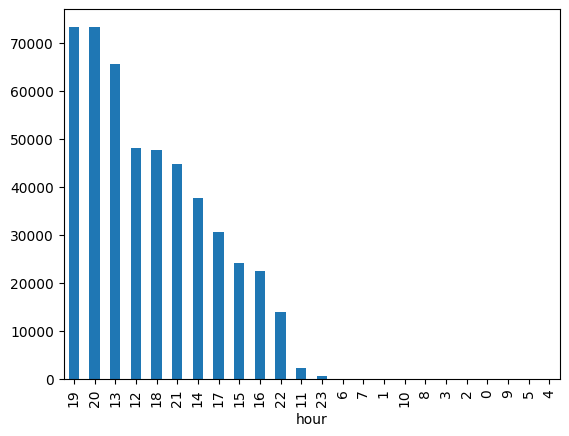

In [803]:
resta_df_fs['hour'].value_counts().plot(kind='bar')

In [804]:
#categorizing time of sale
def time_cat(hour):
    if 6 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 18:
        return 'afternoon'
    elif 18 <= hour < 24:
        return 'evening'
    else:
        return 'night'


In [805]:
resta_df_fs['time_category'] = resta_df_fs['hour'].apply(time_cat)

In [806]:
# Getting month year 
resta_df_fs['month_year'] = resta_df_fs['system_date'].apply(lambda x:x.strftime('%Y-%m'))

In [807]:
# Getting the week 
resta_df_fs['week'] = resta_df_fs['system_date'].dt.isocalendar().week

# Answering questions

## How many orders were made within a year, month, week, hour.

In [808]:
#Take out all cancelled orders
resta_df_fs['is_cancelled'].value_counts()

is_cancelled
False    485522
True         47
Name: count, dtype: int64

In [809]:
resta_df_fs['is_courtesy'] = resta_df_fs['is_courtesy'].str.strip()

In [810]:
resta_df_fs['is_courtesy'].value_counts()

is_courtesy
False    483360
True        313
Name: count, dtype: int64

In [811]:
#Select which orders havent been cancelled and which have been courtesy
resta_df_tot = resta_df_fs[resta_df_fs['is_cancelled']=='False']

In [812]:
resta_df_tot = resta_df_tot[resta_df_tot['is_courtesy']=='False']

In [813]:
#Obtain the unique orders : unique_orders_df
unique_orders_df = resta_df_tot.drop_duplicates(subset=['order_id'])

In [814]:
unique_orders_df.groupby('year')['order_id'].count()

year
2016     8162
2017    28591
2018    44993
2019    48184
2020    32091
2021    41824
2022    38843
Name: order_id, dtype: int64

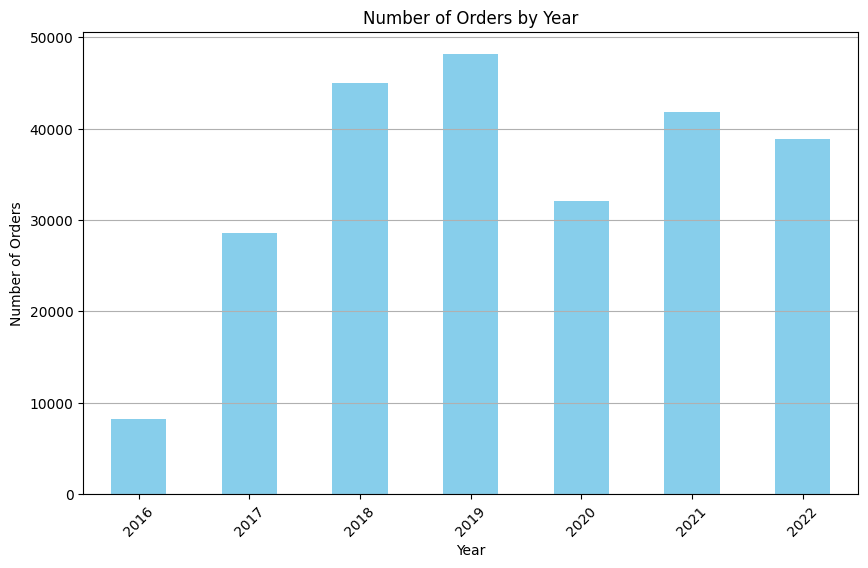

In [815]:
plt.figure(figsize=(10, 6))
unique_orders_df.groupby('year')['order_id'].size().plot(kind='bar', color='skyblue')
plt.title('Number of Orders by Year')
plt.xlabel('Year')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### Number of orders by month

Month

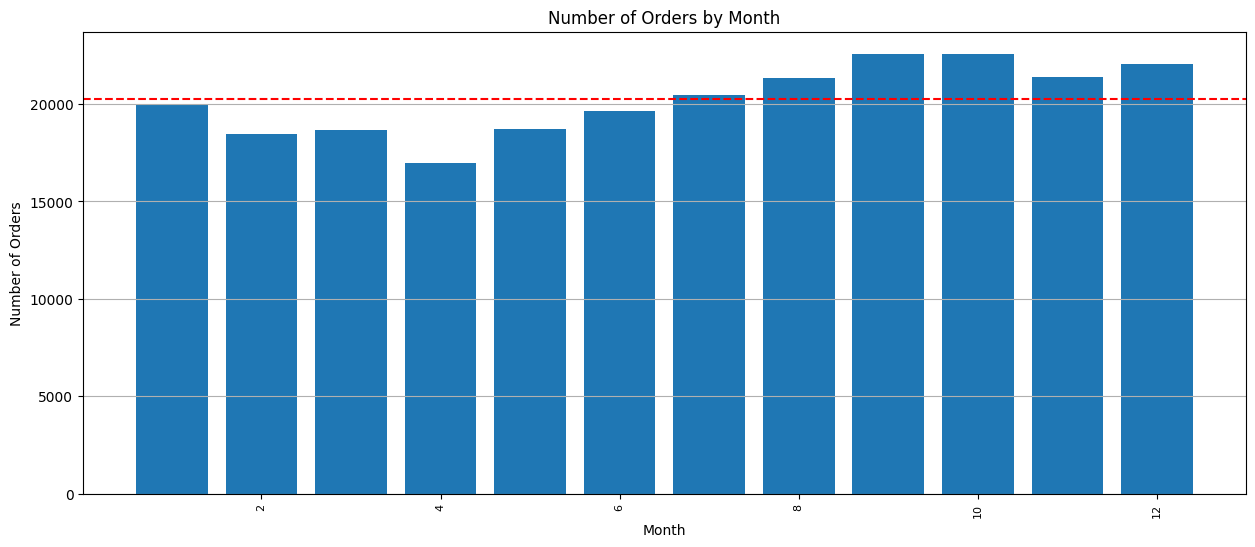

In [816]:
resta_df_m_ordmon = unique_orders_df.groupby('month')['order_id'].count().reset_index()

mean_m  = resta_df_m_ordmon['order_id'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values

plt.bar(resta_df_m_ordmon['month'], resta_df_m_ordmon['order_id'])
# Plot the mean line
plt.axhline(mean_m, color='red', linestyle='--', label='Mean')

plt.title('Number of Orders by Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

#### Month-Year

In [817]:
unique_orders_df.groupby('month_year')['order_id'].count().max()

4589

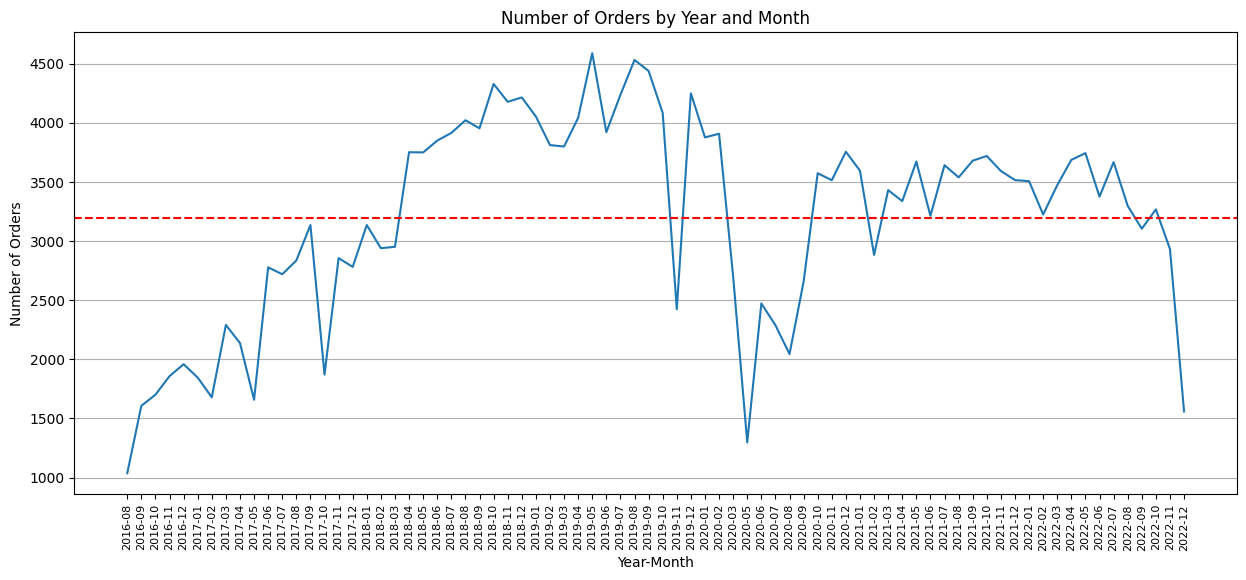

In [818]:
resta_df_m_y = unique_orders_df.groupby('month_year')['order_id'].count().reset_index()
mean_order_id = resta_df_m_y['order_id'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values

plt.plot(resta_df_m_y['month_year'], resta_df_m_y['order_id'])
# Plot the mean line
plt.axhline(mean_order_id, color='red', linestyle='--', label='Mean')

plt.title('Number of Orders by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

 #### Week

In [819]:
resta_df_tot.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount',
       'modification_date', 'modification_reason', 'is_cancelled',
       'is_courtesy', 'order_type', 'delivery_name_new', 'delivery_cost_new',
       'year', 'month', 'day', 'hour', 'month_name', 'day_name',
       'time_category', 'month_year', 'week', 'net_payment'],
      dtype='object')

In [820]:
unique_orders_df.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount',
       'modification_date', 'modification_reason', 'is_cancelled',
       'is_courtesy', 'order_type', 'delivery_name_new', 'delivery_cost_new',
       'year', 'month', 'day', 'hour', 'month_name', 'day_name',
       'time_category', 'month_year', 'week', 'net_payment'],
      dtype='object')

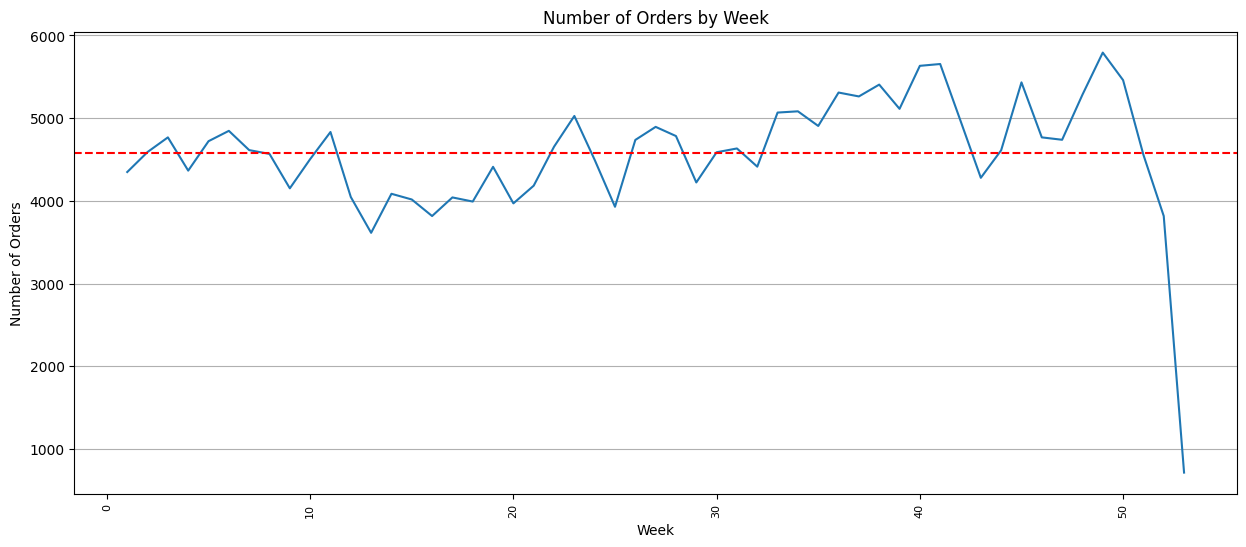

In [821]:

resta_df_w = unique_orders_df.groupby('week')['order_id'].count().reset_index()
mean_w = resta_df_w['order_id'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.plot(resta_df_w['week'], resta_df_w['order_id'])
# Plot the mean line
plt.axhline(mean_w, color='red', linestyle='--', label='Mean')

plt.title('Number of Orders by Week')
plt.xlabel('Week')
plt.ylabel('Number of Orders')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

#### Hour

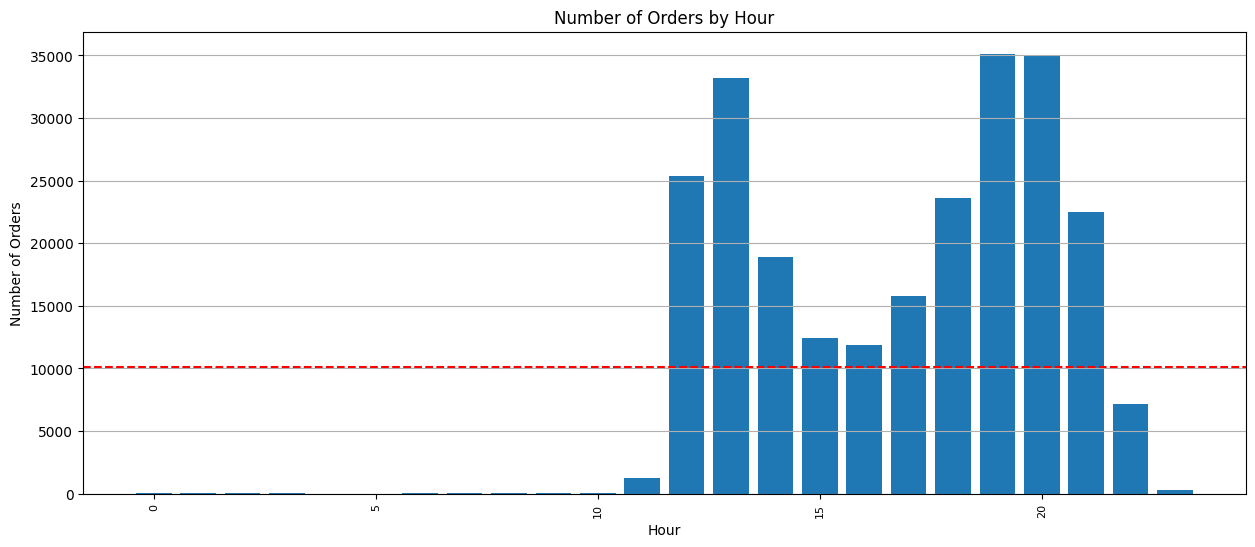

In [822]:
resta_df_time = unique_orders_df.groupby('hour')['order_id'].count().reset_index()
mean_time = resta_df_time['order_id'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.bar(resta_df_time['hour'], resta_df_time['order_id'])
# Plot the mean line
plt.axhline(mean_time, color='red', linestyle='--', label='Mean')

plt.title('Number of Orders by Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

## How much has been sold within a year, month, week, hour. 

In [823]:
unique_orders_df = resta_df_tot.drop_duplicates(subset=['order_id'])

In [824]:
unique_orders_df[['order_id', 'system_date', 'product', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment','net_payment', 'order_type', 'delivery_cost_new']].tail(5)

,order_id,system_date,product,price,quantity,to_pay_xprod,tot_order_payment,net_payment,order_type,delivery_cost_new
505109,585873,2022-12-16,alitas albahaca,19.0,1,19.0,19.0,19.0,para llevar,0.0
505110,585874,2022-12-16,hamburguesa clasica,18.0,1,18.0,106.0,89.0,delivery,17.0
505115,585875,2022-12-16,alitas barbacoa,65.0,1,65.0,65.0,65.0,para llevar,0.0
505116,585876,2022-12-16,salsa miel mostaza,4.0,1,4.0,4.0,4.0,en sala-con mesa,0.0
505117,585877,2022-12-16,alitas jack daniels,26.0,1,26.0,64.0,64.0,en sala-con mesa,0.0


#### By Year

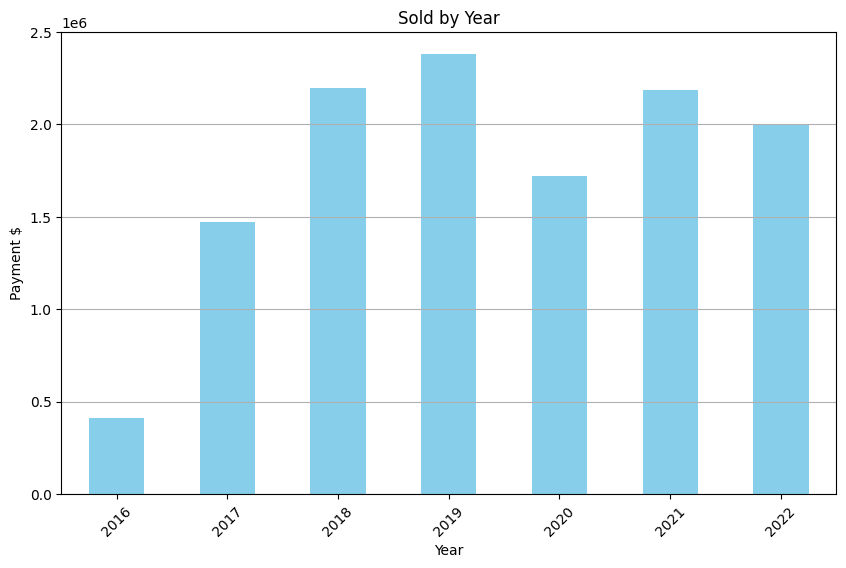

In [825]:
plt.figure(figsize=(10, 6))
unique_orders_df.groupby('year')['net_payment'].sum().plot(kind='bar', color='skyblue')
plt.title('Sold by Year')
plt.xlabel('Year')
plt.ylabel('Payment $')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### By Month

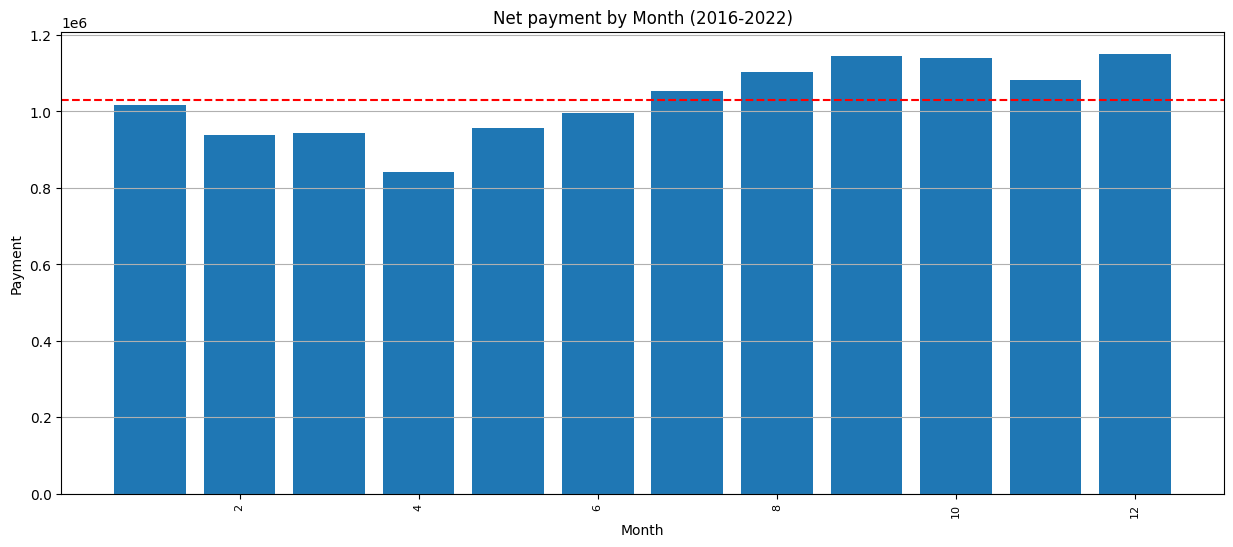

In [826]:
resta_df_m_netpay = unique_orders_df.groupby('month')['net_payment'].sum().reset_index()
mean_m_netpay  = resta_df_m_netpay['net_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values

plt.bar(resta_df_m_netpay['month'], resta_df_m_netpay['net_payment'])
# Plot the mean line
plt.axhline(mean_m_netpay, color='red', linestyle='--', label='Mean')

plt.title('Net payment by Month (2016-2022)')
plt.xlabel('Month')
plt.ylabel('Payment')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

#### By Year-Month

In [827]:
unique_orders_df.groupby('month_year')['net_payment'].sum()

month_year
2016-08     52549.0
2016-09     82636.0
2016-10     85918.0
2016-11     89828.0
2016-12     99205.0
             ...   
2022-08    175057.0
2022-09    161785.0
2022-10    175018.0
2022-11    159996.0
2022-12     84559.0
Name: net_payment, Length: 76, dtype: float64

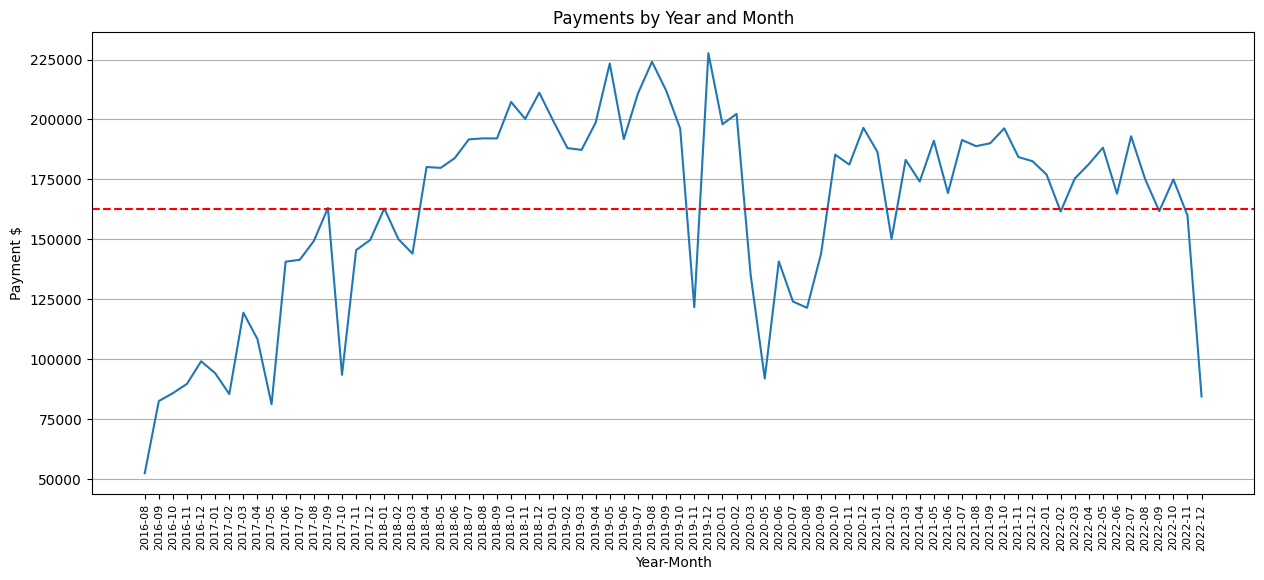

In [828]:
resta_df_m_y_netpay = unique_orders_df.groupby('month_year')['net_payment'].sum().reset_index()
mean_netpay = resta_df_m_y_netpay['net_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values

plt.plot(resta_df_m_y_netpay['month_year'], resta_df_m_y_netpay['net_payment'])
# Plot the mean line
plt.axhline(mean_netpay, color='red', linestyle='--', label='Mean')

plt.title('Payments by Year and Month')
plt.xlabel('Year-Month')
plt.ylabel('Payment $')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

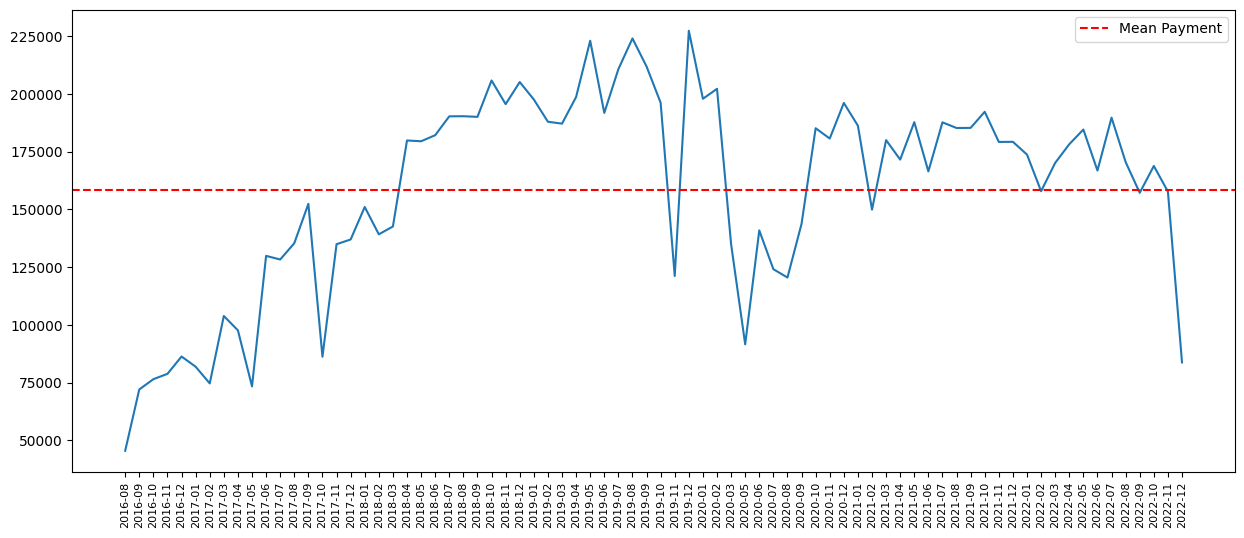

In [829]:
#Analyze this graph ******************** tot order payment has to be for each order
df_trend = resta_df_tot.groupby('month_year')['to_pay_xprod'].sum().reset_index()
mean_payment = df_trend['to_pay_xprod'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.plot(df_trend['month_year'],df_trend['to_pay_xprod'])
# Plot the mean line
plt.axhline(mean_payment, color='red', linestyle='--', label='Mean Payment')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis
plt.legend()  # Show legend with the mean line
plt.show()

#### By Week

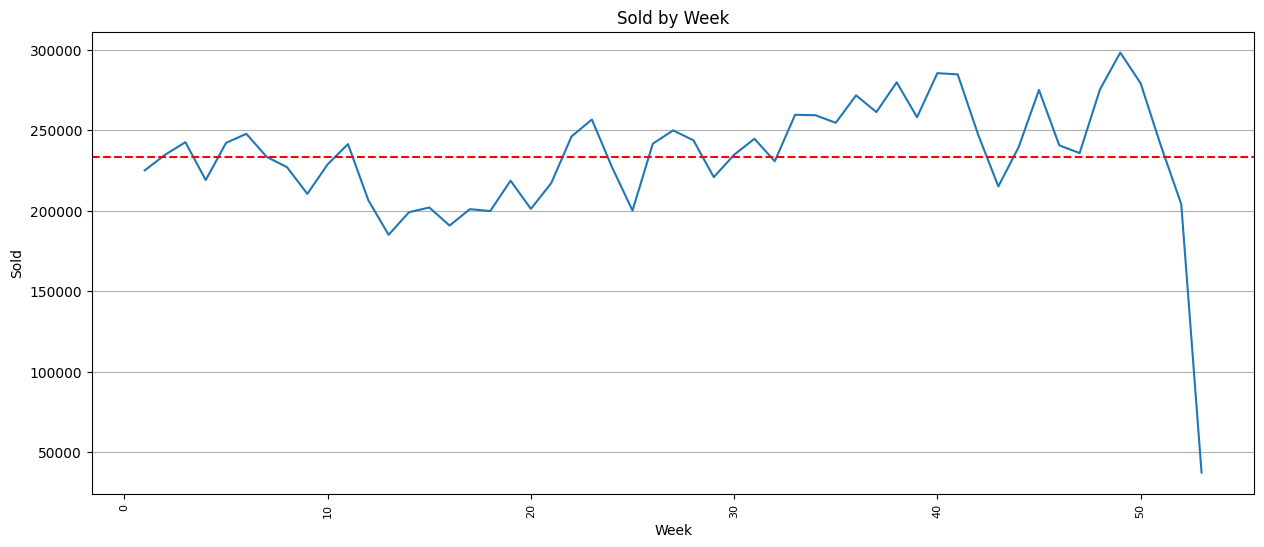

In [830]:
resta_df_w_netpay = unique_orders_df.groupby('week')['net_payment'].sum().reset_index()
mean_w_netpay = resta_df_w_netpay['net_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.plot(resta_df_w_netpay['week'], resta_df_w_netpay['net_payment'])
# Plot the mean line
plt.axhline(mean_w_netpay, color='red', linestyle='--', label='Mean')

plt.title('Sold by Week')
plt.xlabel('Week')
plt.ylabel('Sold')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

#### By Hour

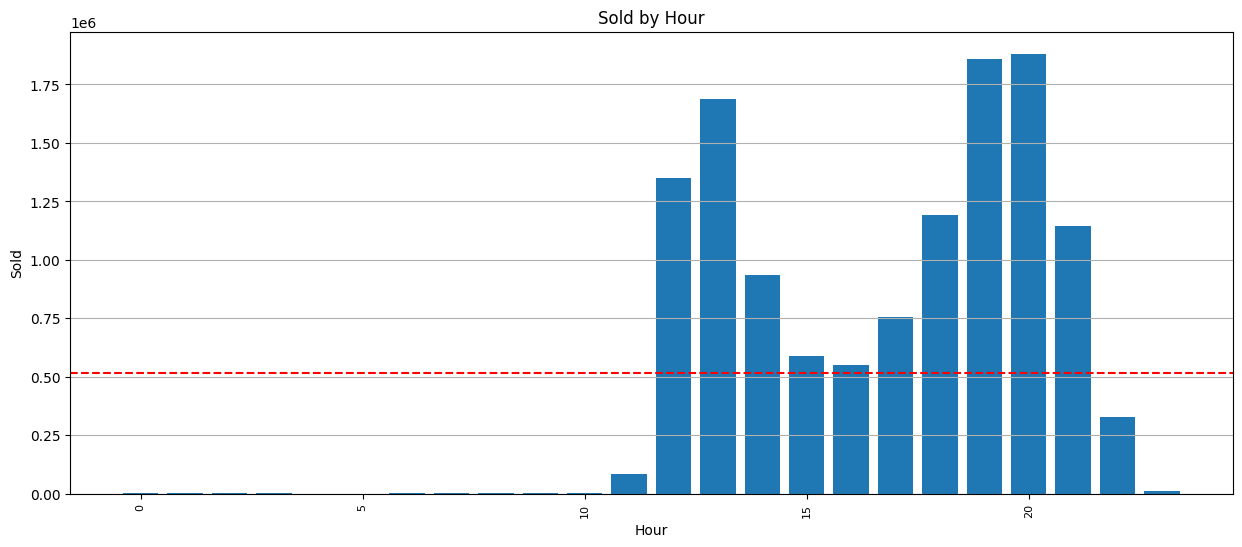

In [831]:
resta_df_h_netpay = unique_orders_df.groupby('hour')['net_payment'].sum().reset_index()
mean_h_paynet = resta_df_h_netpay['net_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.bar(resta_df_h_netpay['hour'], resta_df_h_netpay['net_payment'])
# Plot the mean line
plt.axhline(mean_h_paynet, color='red', linestyle='--', label='Mean')

plt.title('Sold by Hour')
plt.xlabel('Hour')
plt.ylabel('Sold')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

## Which product gave more profit

In [832]:
resta_df_tot.columns

Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount',
       'modification_date', 'modification_reason', 'is_cancelled',
       'is_courtesy', 'order_type', 'delivery_name_new', 'delivery_cost_new',
       'year', 'month', 'day', 'hour', 'month_name', 'day_name',
       'time_category', 'month_year', 'week', 'net_payment'],
      dtype='object')

In [833]:
print(resta_df_tot['classification'][resta_df_tot['group_classifier']=='menu'].unique())
print(resta_df_tot['classification'][resta_df_tot['group_classifier']=='bebidas'].unique())
print(resta_df_tot['classification'][resta_df_tot['group_classifier']=='otros'].unique())

['alitas 8 unidades' 'burguers' 'platos' 'fingers' 'salchis' 'sandwiches'
 'almuerzos' 'combos' 'finger' 'postres' 'promocion' 'alitas 6 unidades'
 'alitas 12 unidades' 'alitas 16 unidades' 'alitas 4 unidades'
 'desconocida' 'varios' 'alitas 24 unidades' 'alitas 32 unidades' 'gusto'
 'fingers 6 unid' 'fingers 12 unid' 'fingers 8 unid']
['1 lt' 'personal' 'popular' '2 lt' 'jugos - aguas' 'jarras' 'con alcohol']
['salsa' 'papas']


### Products from 'menu'

In [834]:
resta_df_tot[resta_df_tot['group_classifier']=='menu'].groupby('classification')['net_payment'].sum().sort_values(ascending=False)

classification
alitas 8 unidades     6591705.0
alitas 6 unidades     3704618.0
fingers               2900465.5
burguers              1679297.5
alitas 4 unidades     1489115.0
salchis               1403209.0
alitas 12 unidades    1079423.0
platos                 975198.0
alitas 16 unidades     953499.5
sandwiches             782087.5
combos                 201921.0
fingers 6 unid         121906.0
alitas 24 unidades      95353.0
alitas 32 unidades      82442.0
almuerzos               67679.0
fingers 12 unid         56750.0
fingers 8 unid          42637.0
promocion               41243.0
varios                  35769.0
gusto                   17010.0
finger                  10382.5
desconocida              9207.0
postres                   939.0
Name: net_payment, dtype: float64

In [835]:
resta_df_tot[resta_df_tot['group_classifier']=='menu'].groupby('classification')['net_payment'].sum().sort_values(ascending=False).head(10)

classification
alitas 8 unidades     6591705.0
alitas 6 unidades     3704618.0
fingers               2900465.5
burguers              1679297.5
alitas 4 unidades     1489115.0
salchis               1403209.0
alitas 12 unidades    1079423.0
platos                 975198.0
alitas 16 unidades     953499.5
sandwiches             782087.5
Name: net_payment, dtype: float64

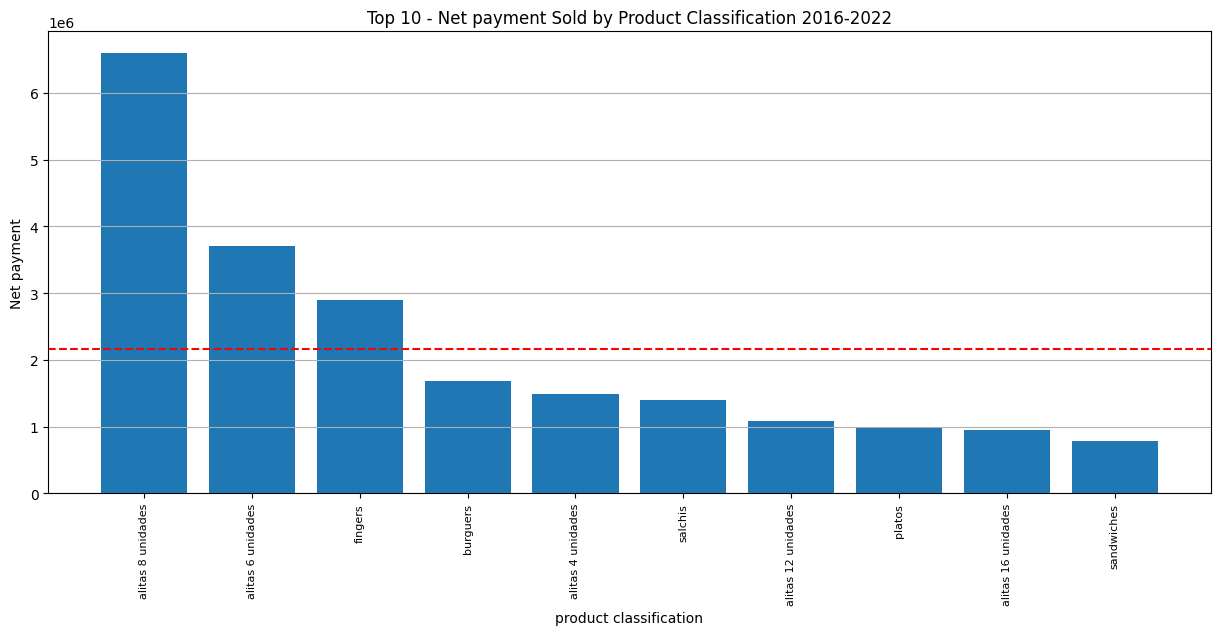

In [836]:
resta_df_m_prod_top10 = resta_df_tot[resta_df_tot['group_classifier']=='menu'].groupby('classification')['net_payment'].sum().sort_values(ascending=False).head(10).reset_index()
mean_m_prod_top10 = resta_df_m_prod_top10['net_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.bar(resta_df_m_prod_top10['classification'], resta_df_m_prod_top10['net_payment'])
# Plot the mean line
plt.axhline(mean_m_prod_top10, color='red', linestyle='--', label='Mean')

plt.title('Top 10 - Net payment Sold by Product Classification 2016-2022')
plt.xlabel('product classification')
plt.ylabel('Net payment')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

In [837]:
resta_df_tot[(resta_df_tot['group_classifier']=='menu')&(resta_df_tot['classification'].str.contains('alitas'))].groupby(['classification'])['net_payment'].sum().sort_values(ascending=False)

classification
alitas 8 unidades     6591705.0
alitas 6 unidades     3704618.0
alitas 4 unidades     1489115.0
alitas 12 unidades    1079423.0
alitas 16 unidades     953499.5
alitas 24 unidades      95353.0
alitas 32 unidades      82442.0
Name: net_payment, dtype: float64

In [838]:
resta_df_tot[(resta_df_tot['group_classifier']=='menu')&(resta_df_tot['classification'].str.contains('finger'))].groupby(['classification'])['net_payment'].sum().sort_values(ascending=False)

classification
fingers            2900465.5
fingers 6 unid      121906.0
fingers 12 unid      56750.0
fingers 8 unid       42637.0
finger               10382.5
Name: net_payment, dtype: float64

In [839]:
resta_df_tot[['order_id', 'system_date', 'product', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment','net_payment', 'order_type', 'delivery_cost_new']].tail(5)

,order_id,system_date,product,price,quantity,to_pay_xprod,tot_order_payment,net_payment,order_type,delivery_cost_new
505116,585876,2022-12-16,salsa miel mostaza,4.0,1,4.0,4.0,4.0,en sala-con mesa,0.0
505117,585877,2022-12-16,alitas jack daniels,26.0,1,26.0,64.0,64.0,en sala-con mesa,0.0
505118,585877,2022-12-16,alitas miel mostaza,26.0,1,26.0,64.0,64.0,en sala-con mesa,0.0
505119,585877,2022-12-16,salsa picante,4.0,1,4.0,64.0,64.0,en sala-con mesa,0.0
505120,585877,2022-12-16,sprite,8.0,1,8.0,64.0,64.0,en sala-con mesa,0.0


In [844]:
resta_df_tot[(resta_df_tot['group_classifier']=='menu')&(resta_df_tot['classification'].str.contains('burguer'))].groupby(['product'])['net_payment'].sum().sort_values(ascending=False)

product
hamburguesa clasica     557775.5
hamburguesa bbq         418771.5
hamburguesa jack        296794.5
hamburgues crunchy      179033.0
mexicana                163956.0
extra carne              31343.5
chesse egg               28089.5
hamburguesa de pollo      3534.0
Name: net_payment, dtype: float64

In [851]:
resta_df_tot[(resta_df_tot['group_classifier']=='menu')&(resta_df_tot['classification'].str.contains('salchis'))].groupby(['product'])['net_payment'].sum().sort_values(ascending=False)

product
salchibeef    1302800.0
salchipapa     100409.0
Name: net_payment, dtype: float64

In [849]:
resta_df_tot[(resta_df_tot['group_classifier']=='menu')&(resta_df_tot['classification'].str.contains('promo'))].groupby(['product'])['net_payment'].sum().sort_values(ascending=False)

product
promo octubre                   10953.0
promo medio lomo                 6601.0
promo chau agosto                4448.0
promo fingers                    3165.0
promo milanesa de pollo          2822.0
promo full alas                  2803.0
promo trio 21 sep                2448.0
promo mundial                    1505.0
promo 21 de septiembre           1124.0
promo primavera                  1109.5
promo yaigo                      1048.0
promo alitas                      813.0
finger promo                      662.0
promo pedidos ya + coca cola      483.0
promo reto wings                  405.0
promo brocheta de pollo           298.0
chili promo                       236.5
promo hamb chesse                 152.0
ham bbq prom                       95.0
nachos promo                       72.0
Name: net_payment, dtype: float64

In [848]:
resta_df_tot[(resta_df_tot['group_classifier']=='menu')&(resta_df_tot['classification'].str.contains('combos'))].groupby(['product'])['net_payment'].sum().sort_values(ascending=False)

product
combo duo              120027.5
4 combo cocos           37307.0
1 combo tex             11891.0
combo cuarentena         7826.0
combo familia            4989.0
combo cupido             3383.0
2 combo mex              3314.5
combo black friday       3309.0
combo julio              3309.0
combo papa               3124.0
combo paceñisimo         1540.0
combo trio                697.0
mam combo 1 uno           602.0
combo dia del padre       371.0
combo patria              166.0
combo patriota             65.0
Name: net_payment, dtype: float64

In [850]:
resta_df_tot[(resta_df_tot['group_classifier']=='menu')&(resta_df_tot['classification'].str.contains('plato'))].groupby(['product'])['net_payment'].sum().sort_values(ascending=False)

product
costillitas           421054.0
chili mexic           216596.5
pollo a la canasta    178947.0
quesadillas            56667.5
nachos con queso       46821.5
papas extremas         43400.5
ensalada cocos         11711.0
Name: net_payment, dtype: float64

### Products from 'bebidas'

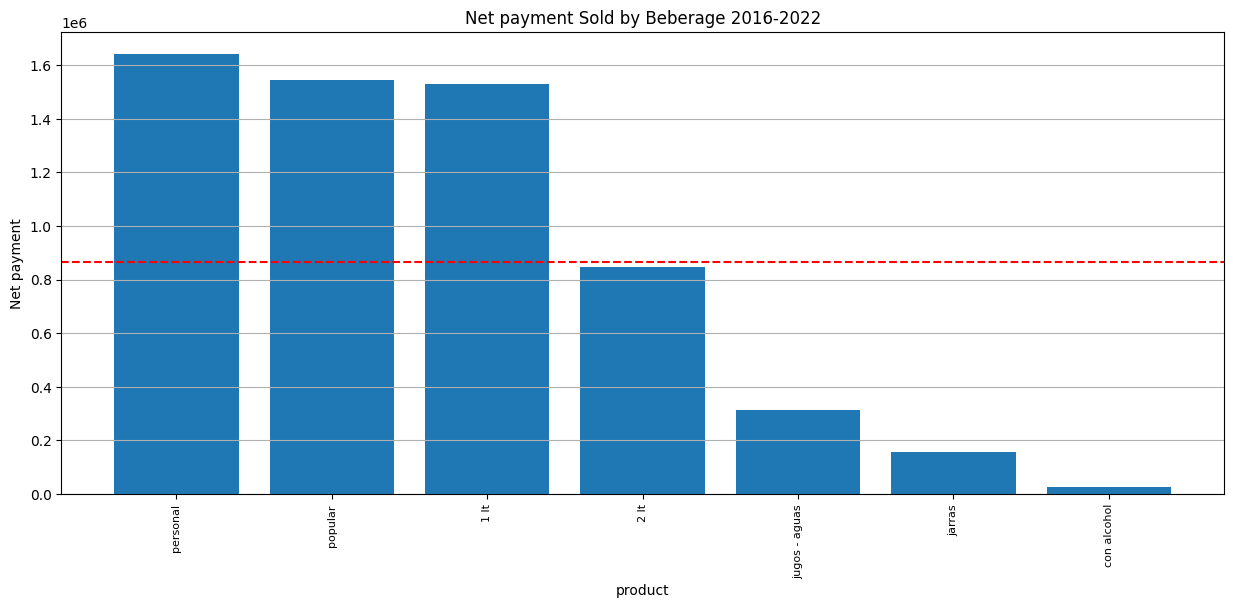

In [856]:
resta_df_m_bebi = resta_df_tot[resta_df_tot['group_classifier']=='bebidas'].groupby('classification')['net_payment'].sum().sort_values(ascending=False).reset_index()
mean_m_bebi = resta_df_m_bebi['net_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.bar(resta_df_m_bebi['classification'], resta_df_m_bebi['net_payment'])
# Plot the mean line
plt.axhline(mean_m_bebi, color='red', linestyle='--', label='Mean')

plt.title('Net payment Sold by Beberage 2016-2022')
plt.xlabel('product')
plt.ylabel('Net payment')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

In [857]:
resta_df_tot[(resta_df_tot['group_classifier']=='bebidas')].groupby(['product'])['net_payment'].sum().sort_values(ascending=False)

product
coca cola                2304517.5
fanta                    1480178.0
sprite                    594817.0
frutal                    585614.0
sinalco                   299973.0
aquarius 500              185866.0
del valle                  90146.0
coca cola 2 1/2            86944.5
jarra especial             68411.5
agua vital                 59033.5
simba                      56035.5
coca cola zero             47835.0
1 jarra lima-limon         40403.0
vaso jugo natural          32233.5
1/2 jarra lima- limon      28372.5
1/2 jarra especiales       20210.5
jarra de jugo nuevo        19253.0
frussion                   13504.5
guarana                    13444.0
bot vino                   12330.0
guarana 3 lt               11254.5
huari                       4995.5
pico plata /ice             4629.5
corona                      4539.0
Name: net_payment, dtype: float64

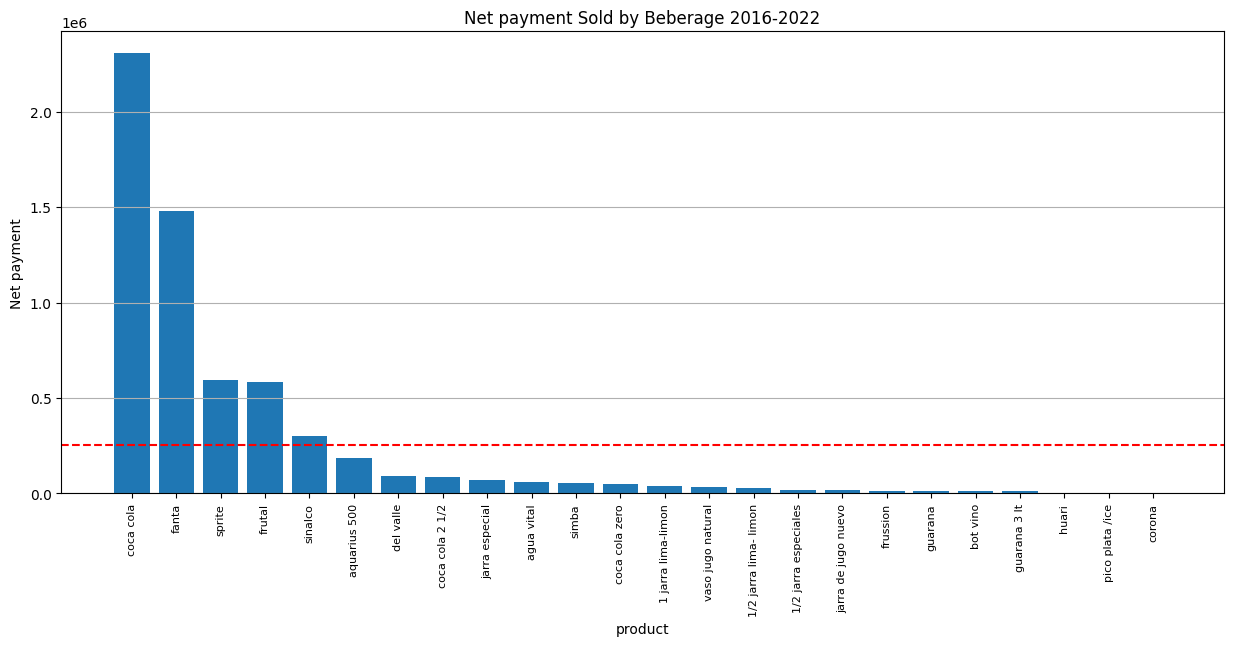

In [860]:


resta_df_m_bebi = resta_df_tot[(resta_df_tot['group_classifier']=='bebidas')].groupby(['product'])['net_payment'].sum().sort_values(ascending=False).reset_index()
mean_m_bebi = resta_df_m_bebi['net_payment'].mean()

plt.figure(figsize = (15,6))    #setting fig size to fit in all values
plt.bar(resta_df_m_bebi['product'], resta_df_m_bebi['net_payment'])
# Plot the mean line
plt.axhline(mean_m_bebi, color='red', linestyle='--', label='Mean')

plt.title('Net payment Sold by Beberage 2016-2022')
plt.xlabel('product')
plt.ylabel('Net payment')

plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis

plt.grid(axis='y')
plt.show()

### Products 'otros'

In [863]:
resta_df_tot[resta_df_tot['group_classifier']=='otros'].groupby(['classification','product'])['net_payment'].sum().sort_values(ascending=False)

classification  product           
salsa           salsa picante         441128.5
                salsa miel mostaza    189201.0
papas           papas adicionales     165278.0
salsa           salsa albahaca        159866.5
                salsa barbacoa        158053.0
                salsa queso            75700.5
                salsa jack             36882.0
                salsa picosa           36479.0
                salsa teriyaki         34757.5
                salsa toxica           29183.5
                coffe bbq               1958.0
Name: net_payment, dtype: float64

proof

In [864]:
# Group by year and month, and count the number of unique orders in each month
unique_orders_per_month_year = unique_orders_df.groupby(['year', 'month'])['order_id'].count().reset_index()

In [866]:
# Calculate the mean number of unique orders per month across the years
mean_unique_orders_per_month = unique_orders_per_month_year.groupby('month')['order_id'].mean()

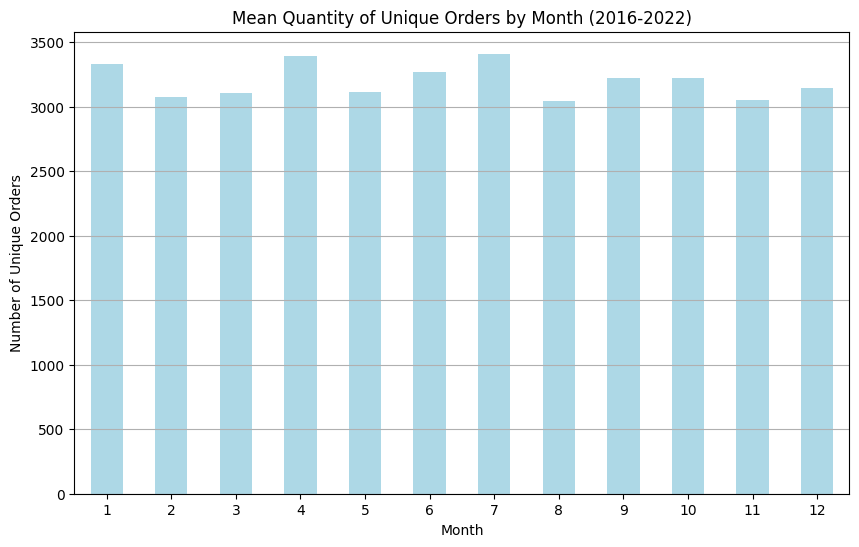

In [868]:
# Plot the mean quantity of unique orders by month
plt.figure(figsize=(10, 6))
mean_unique_orders_per_month.plot(kind='bar', color='lightblue')
plt.title('Mean Quantity of Unique Orders by Month (2016-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [870]:
# Create a DataFrame for pair analysis
order_pairs = resta_df_tot.merge(resta_df_tot, on='order_id')

In [872]:
order_pairs.columns

Index(['order_id', 'system_date_x', 'time_x', 'group_classifier_x',
       'classification_x', 'product_x', 'prod_state_x', 'price_x',
       'quantity_x', 'to_pay_xprod_x', 'tot_order_payment_x',
       'product_observations_x', 'amount_x', 'modification_date_x',
       'modification_reason_x', 'is_cancelled_x', 'is_courtesy_x',
       'order_type_x', 'delivery_name_new_x', 'delivery_cost_new_x', 'year_x',
       'month_x', 'day_x', 'hour_x', 'month_name_x', 'day_name_x',
       'time_category_x', 'month_year_x', 'week_x', 'net_payment_x',
       'system_date_y', 'time_y', 'group_classifier_y', 'classification_y',
       'product_y', 'prod_state_y', 'price_y', 'quantity_y', 'to_pay_xprod_y',
       'tot_order_payment_y', 'product_observations_y', 'amount_y',
       'modification_date_y', 'modification_reason_y', 'is_cancelled_y',
       'is_courtesy_y', 'order_type_y', 'delivery_name_new_y',
       'delivery_cost_new_y', 'year_y', 'month_y', 'day_y', 'hour_y',
       'month_name_y', '

In [873]:
order_pairs = order_pairs[order_pairs['product_x'] != order_pairs['product_y']]

In [878]:
# Filter only for beverage-food pairs
beverage_food_pairs = order_pairs[(order_pairs['group_classifier_x'] == 'bebidas') & (order_pairs['group_classifier_y'] == 'menu')]


In [880]:
# Count the frequency of each beverage-food pair
pair_counts = beverage_food_pairs.groupby(['product_x', 'product_y']).size().reset_index(name='count')

In [881]:
# Sort the pairs by frequency
pair_counts = pair_counts.sort_values(by='count', ascending=False)

In [885]:
# Display the top 10 most frequent beverage-food pairs
print(pair_counts.head(10))

     product_x            product_y  count
286  coca cola  alitas miel mostaza   8081
278  coca cola      alitas barbacoa   7640
288  coca cola      alitas picantes   6696
572      fanta  alitas miel mostaza   5333
564      fanta      alitas barbacoa   4574
574      fanta      alitas picantes   4201
350  coca cola           salchibeef   4128
629      fanta           salchibeef   3046
320  coca cola         fingers miel   2729
281  coca cola          alitas buff   2337


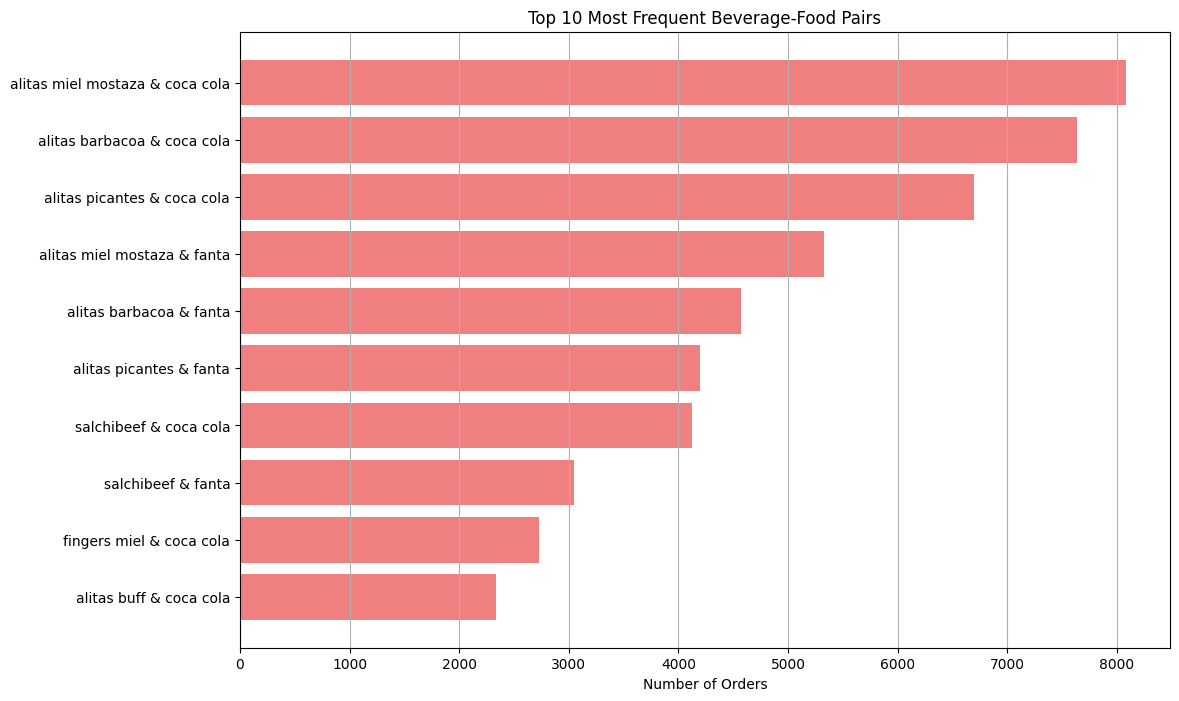

In [886]:
# Plot the top 10 most frequent beverage-food pairs
top_pairs = pair_counts.head(10)
plt.figure(figsize=(12, 8))
plt.barh(top_pairs['product_y'] + ' & ' + top_pairs['product_x'], top_pairs['count'], color='lightcoral')
plt.xlabel('Number of Orders')
plt.title('Top 10 Most Frequent Beverage-Food Pairs')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()


## How many deliveries there were

### Deliveries by company

In [907]:
unique_orders_df.columns


Index(['order_id', 'system_date', 'time', 'group_classifier', 'classification',
       'product', 'prod_state', 'price', 'quantity', 'to_pay_xprod',
       'tot_order_payment', 'product_observations', 'amount',
       'modification_date', 'modification_reason', 'is_cancelled',
       'is_courtesy', 'order_type', 'delivery_name_new', 'delivery_cost_new',
       'year', 'month', 'day', 'hour', 'month_name', 'day_name',
       'time_category', 'month_year', 'week', 'net_payment'],
      dtype='object')

In [910]:
unique_orders_del_df = unique_orders_df[unique_orders_df['order_type']=='delivery'].groupby(['delivery_name_new'])['order_id'].count().sort_values(ascending=False).reset_index()

In [916]:
unique_orders_del_df

,delivery_name_new,order_id
0,pedidos ya,14297
1,yaigo,1884
2,mr. delivery,1451
3,patio service,503
4,dinki,423
5,link,197
6,xpress,76
7,ego,53
8,fast driver,40


<Figure size 1000x600 with 0 Axes>

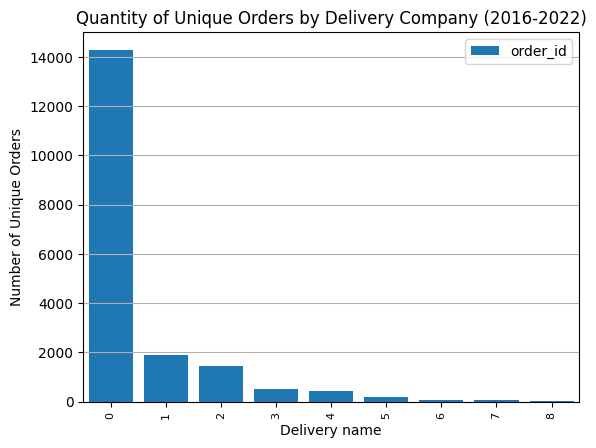

In [913]:
plt.figure(figsize=(10, 6))
unique_orders_del_df.plot(kind='bar')
plt.bar(unique_orders_del_df['delivery_name_new'],unique_orders_del_df['order_id'])
plt.title('Quantity of Unique Orders by Delivery Company (2016-2022)')
plt.xlabel('Delivery name')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation = 'vertical',size = 8)             #vertical labels in x axis
plt.grid(axis='y')
plt.show()



### Number of orders sold by deliveries

In [893]:
unique_delivery_orders_month_df = unique_orders_df[unique_orders_df['order_type']=='delivery'].groupby(['year','month'])['order_id'].count().reset_index()

In [895]:
mean_unique_delivery_orders_month_df = unique_delivery_orders_month_df.groupby('month')['order_id'].mean()


In [903]:
mean_unique_delivery_orders_month_df

month
1     681.000000
2     407.666667
3     407.000000
4     589.000000
5     518.666667
6     632.000000
7     664.000000
8     610.666667
9     581.333333
10    627.666667
11    443.000000
12    316.250000
Name: order_id, dtype: float64

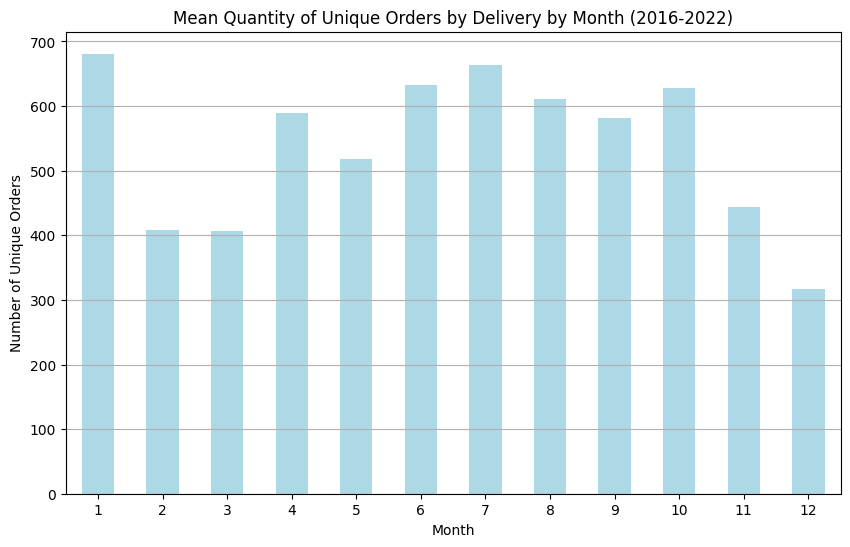

In [904]:
plt.figure(figsize=(10, 6))
mean_unique_delivery_orders_month_df.plot(kind='bar', color='lightblue')
plt.title('Mean Quantity of Unique Orders by Delivery by Month (2016-2022)')
plt.xlabel('Month')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()